<a id='задачи'></a>
## Задачи:

1. [Как взаимосвязаны коммуникации на покупки с кэшбэком?](#взаимосвязь-коммуникаций)
2. [Как взаимосвязаны обороты клиентов и выплаченный кэшбэк?](#взаимосвязь-оборота)
   - [2.1 Корреляционный анализ](#21-приведение-заголовков-к-удобному-Виду)
   - [2.2 Регрессионный анализ](#22-регрес)
   - [2.3 Сегментация](#23-сегмент)
3. [3 месяца назад произошло глобальное обновление приложения в т.ч. методики взаимодействия с пользователем. Необходимо оценить эффект обновления.](#обновление-3-мес)
   - [3.1 Просмотр данных](#31-просмотр-данных)
   - [3.2 Преобразование в нормальное распределение](#32-преорь-в-норм)
   - [3.3 Бутстрапирование](#33-бутстрап)
   - [3.4 t-тест](#34-проведение-ттеста)
4. [Выдвинете собственную гипотезу на основе имеющихся данных.](#своя-гипотеза)

<a id='взаимосвязь-коммуникаций'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">0. Исследуем данные. </h1>
</div>

[Вернуться к содержанию](#задачи)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats as st
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

In [2]:
df = pd.read_csv('tinkoff_chashback.csv')
df

client_id  cb_merch_last_3_month  cb_bank_last_3_month  \
0      162353149                  282.0                 141.0   
1      666605735                    0.0                   0.0   
2      558610079                    0.0                   0.0   
3      769974329                  174.0                   0.0   
4      350605405                    0.0                   0.0   
...          ...                    ...                   ...   
49995  377949465                    0.0                   0.0   
49996  299560244                  131.0                   0.0   
49997   66958117                  448.0                   0.0   
49998  549553108                    0.0                   0.0   
49999  151873511                 1448.0                 345.0   

       cb_merch_before  cb_bank_before  cnt_communication  cnt_activation  \
0                119.0           125.0                  6             229   
1                  0.0             0.0                  0               0   
2                  0.0             0.0                  0              51   
3                151.0           102.0                  3             137   
4                179.0           179.0                  4              18   
...                ...             ...                ...             ...   
49995           1275.0          1280.0                  3             136   
49996              2.0             3.0                  1              32   
49997              0.0             0.0                  1             209   
49998            244.0           244.0                  3              14   
49999            471.0           483.0                  2             123   

       cnt_view     Air  Beauty shop  ...  Fastfood_before  Fuel_before  \
0           606     0.0        109.0  ...            498.0        157.0   
1             0     0.0          0.0  ...              0.0          0.0   
2            77  2585.0          0.0  ...            527.0        398.0   
3           375     0.0          0.0  ...            227.0          0.0   
4            24     0.0        634.0  ...            452.0        372.0   
...         ...     ...          ...  ...              ...          ...   
49995       335     0.0          0.0  ...            215.0        584.0   
49996        65     0.0          0.0  ...              9.0        351.0   
49997       507    14.0          0.0  ...             80.0         26.0   
49998        21     0.0         66.0  ...            653.0         34.0   
49999       249     0.0          0.0  ...            229.0          0.0   

       House_before  Jewelry_before  Other_before  Pet shop_before  \
0            2621.0            31.0        6232.0              0.0   
1               0.0             0.0           0.0              0.0   
2             788.0             0.0        9797.0              0.0   
3               0.0             0.0         208.0              0.0   
4               0.0            76.0         486.0              0.0   
...             ...             ...           ...              ...   
49995          59.0             0.0         681.0              0.0   
49996           4.0            25.0         572.0             35.0   
49997           0.0             0.0         423.0              0.0   
49998           6.0             0.0        5476.0             15.0   
49999           0.0             0.0        1592.0              0.0   

       Pharmacies_before  Supermarkets_before  Taxi_before  Transport_before  
0                   91.0               5356.0          0.0             119.0  
1                    0.0                 12.0          0.0               2.0  
2                    1.0                371.0          0.0             458.0  
3                   14.0                338.0          0.0              10.0  
4                  499.0               2198.0          0.0              14.0  
...                  ...                  ...          ...               ...  
49995 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              50000 non-null  int64  
 1   cb_merch_last_3_month  50000 non-null  float64
 2   cb_bank_last_3_month   50000 non-null  float64
 3   cb_merch_before        50000 non-null  float64
 4   cb_bank_before         50000 non-null  float64
 5   cnt_communication      50000 non-null  int64  
 6   cnt_activation         50000 non-null  int64  
 7   cnt_view               50000 non-null  int64  
 8   Air                    50000 non-null  float64
 9   Beauty shop            50000 non-null  float64
 10  Book store             50000 non-null  float64
 11  Children               50000 non-null  float64
 12  Cinema                 50000 non-null  float64
 13  Clothes                50000 non-null  float64
 14  Electronics            50000 non-null  float64
 15  Fa

In [4]:
df.describe()

client_id  cb_merch_last_3_month  cb_bank_last_3_month  \
count  5.000000e+04           50000.000000          50000.000000   
mean   4.450470e+08             302.092180            137.422360   
std    2.379750e+08            1033.182617            435.794431   
min    1.009660e+05          -31499.000000          -4950.000000   
25%    2.545353e+08               0.000000              0.000000   
50%    3.950847e+08               0.000000              0.000000   
75%    6.469640e+08             191.000000             50.000000   
max    9.413153e+08           91968.000000          13731.000000   

       cb_merch_before  cb_bank_before  cnt_communication  cnt_activation  \
count     50000.000000    50000.000000       50000.000000    50000.000000   
mean        461.998100      298.724980           1.719560      112.001180   
std        1168.480323      766.625666           1.767466      104.646909   
min      -15965.000000    -4702.000000           0.000000        0.000000   
25%           0.000000        0.000000           0.000000       23.000000   
50%          92.000000       31.000000           1.000000       86.000000   
75%         358.000000      210.000000           3.000000      176.000000   
max       31796.000000    18656.000000          18.000000      713.000000   

           cnt_view            Air   Beauty shop  ...  Fastfood_before  \
count  50000.000000   50000.000000  50000.000000  ...     50000.000000   
mean     333.480180     249.180040     96.616780  ...       541.092460   
std      519.431044    1618.867772    494.299083  ...       862.922798   
min        0.000000       0.000000      0.000000  ...         0.000000   
25%       45.000000       0.000000      0.000000  ...        68.000000   
50%      193.000000       0.000000      0.000000  ...       267.000000   
75%      435.000000       0.000000     46.250000  ...       686.250000   
max    13462.000000  178604.000000  50237.000000  ...     55280.000000   

        Fuel_before  House_before  Jewelry_before  Other_before  \
count  50000.000000   50000.00000    50000.000000  5.000000e+04   
mean     282.980680     309.40572       53.426900  3.257744e+03   
std      639.386206    1484.67560      499.915471  9.545272e+03   
min        0.000000       0.00000        0.000000  0.000000e+00   
25%        0.000000       0.00000        0.000000  5.520000e+02   
50%       24.000000       8.00000        0.000000  1.614000e+03   
75%      350.250000     146.00000        0.000000  3.695000e+03   
max    40453.000000  174890.00000    72445.000000  1.158873e+06   

       Pet shop_before  Pharmacies_before  Supermarkets_before  Taxi_before  \
count     50000.000000       50000.000000         50000.000000      50000.0   
mean         42.281880         166.712220          1775.399180          0.0   
std         530.525278         968.359001          2005.510844          0.0   
min           0.000000           0.000000             0.000000          0.0   
25%           0.000000          15.000000           488.000000          0.0   
50%           0.000000          72.000000          1292.000000          0.0   
75%          10.000000         196.000000          2460.000000          0.0   
max      113618.000000      198595.000000        123265.000000          0.0   

       Transport_before  
count      50000.000000  
mean         236.119320  
std          546.726728  
min            0.000000  
25%            9.000000  
50%           82.000000  
75%          277.000000  
max        68766.000000  

[8 rows x 42 columns]

In [5]:
df.isna().sum()

client_id                0
cb_merch_last_3_month    0
cb_bank_last_3_month     0
cb_merch_before          0
cb_bank_before           0
cnt_communication        0
cnt_activation           0
cnt_view                 0
Air                      0
Beauty shop              0
Book store               0
Children                 0
Cinema                   0
Clothes                  0
Electronics              0
Fastfood                 0
Fuel                     0
House                    0
Jewelry                  0
Other                    0
Pet shop                 0
Pharmacies               0
Supermarkets             0
Taxi                     0
Transport                0
Air_before               0
Beauty shop_before       0
Book store_before        0
Children_before          0
Cinema_before            0
Clothes_before           0
Electronics_before       0
Fastfood_before          0
Fuel_before              0
House_before             0
Jewelry_before           0
Other_before             0
P

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

Пропусков нет - это радует, но не исключены случаи, когда ячейки заполненны значениями "не известно", "0", "-" и т.д. Мы проверили тип данных: абсолютно в каждом столбце числовой тип данных, поэтому если и возможны неявные пропуски, то это будет "0". Однако все столбцы предполагают возможность значения "0". <br><br>
Посмотрим на явные аномалии
</div>

In [6]:
# Странные столбцы Taxi и Taxi_before нас насторожили
df['Taxi'].unique()

array([0.])

In [7]:
df['Taxi_before'].unique()

array([0.])

In [8]:
# Удалим их, они ни на что влиять не будут
df = df.drop('Taxi', axis=1)
df = df.drop('Taxi_before', axis=1)

In [9]:
df.duplicated().sum()

0

In [10]:
df['client_id'].duplicated().sum()

0

### Дубликаты:
Ни явных, ни скрытых дупликатов нет, так как каждому клиенту присвоен уникальный id номер, ни один из которых не повторяется.

### Отрицательные значения:

In [11]:
# выбираем только числовые столбцы, для того чтобы узнать, есть ли у нас столбцы с отрицательным кешбеком
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols.size

40

In [12]:
# используем метод .any() - есть ли хотя бы один отрицательный (в нашем случае) элемент в итерируемом объекте
for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"В столбце '{col}' есть отрицательные значения.")

В столбце 'cb_merch_last_3_month' есть отрицательные значения.
В столбце 'cb_bank_last_3_month' есть отрицательные значения.
В столбце 'cb_merch_before' есть отрицательные значения.
В столбце 'cb_bank_before' есть отрицательные значения.


In [13]:
# считаем кол-во отрицательных значений в каждом из этих столбцов
columns_to_check = ['cb_merch_last_3_month', 'cb_bank_last_3_month', 'cb_merch_before', 'cb_bank_before']

negative_c = df[columns_to_check] < 0
negative_c = negative_c.sum()
negative_c

cb_merch_last_3_month    29
cb_bank_last_3_month     71
cb_merch_before          12
cb_bank_before           21
dtype: int64

In [14]:
df = df[~(df[columns_to_check] < 0).any(axis=1)]
df = df.reset_index(drop=True)
df.shape

(49886, 40)

In [15]:
print('Мы удалили', 50000-49886 ,'отрицательных значений')

Мы удалили 114 отрицательных значений


### Выбросы:

In [16]:
sns.set_theme(style='ticks')

In [17]:
# в созданном ранее списке numeric_cols есть все столбцы, однако столбец client_id для анализа не нужен, избавимся от него

numeric_cols = numeric_cols[1:]

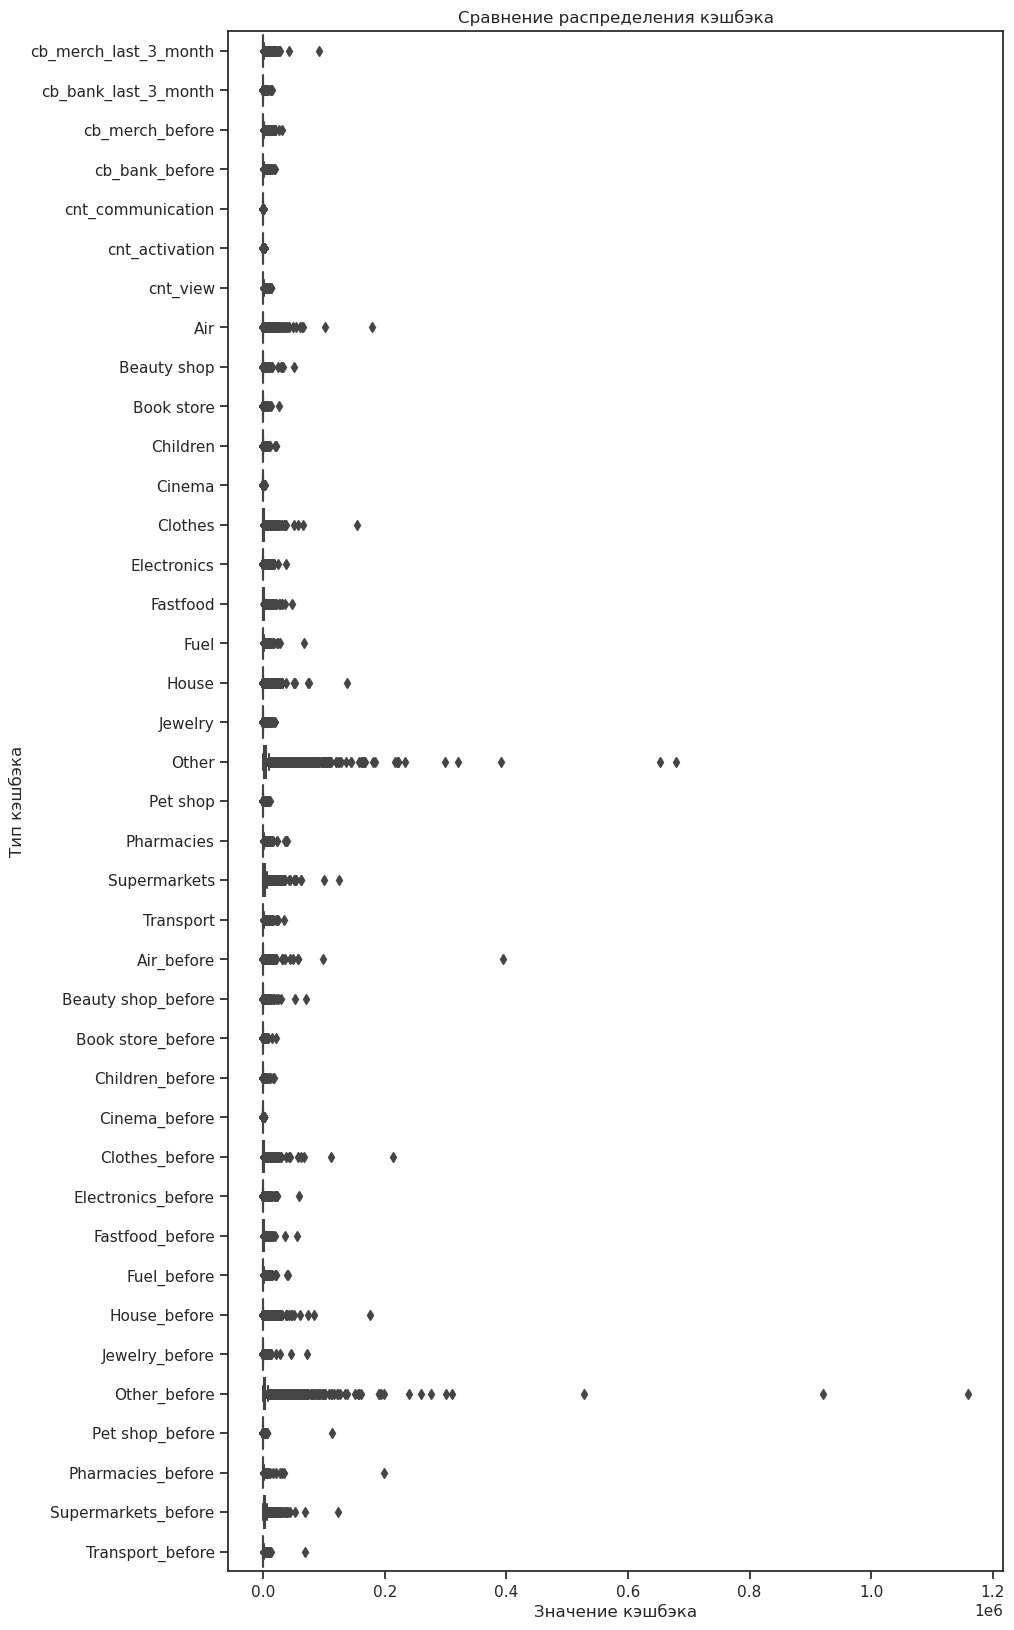

In [18]:
plt.figure(figsize=(10, 20))
sns.boxplot(data=df[numeric_cols], orient='h')

# Настраиваем график (по желанию)
plt.title('Сравнение распределения кэшбэка')
plt.xlabel('Значение кэшбэка')
plt.ylabel('Тип кэшбэка')
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
<h2>Почистим от больших выбросов, чтобы они не влияли на наши данные</h2><br>
Для этого воспользуемся правилом 3 сигма:
</div>

1. ранее мы создали массив numeric_cols , он потребуется для дальнейших расчетов
2. сделаем списки со средними значениями по столбцу, ско, нижними и верхними границами интервалов 3 sigma, количеством элементов;
3. затем сделаем вспомогательный датасет, столбцы которого будут состоять из созданных списков

In [19]:
df = df[df[numeric_cols[0]] < 20000]
df = df[df[numeric_cols[1]] < 6000]
df = df[df[numeric_cols[2]] < 15000]
df = df[df[numeric_cols[3]] < 6000]
df = df[df[numeric_cols[4]] < 8]
df = df[df[numeric_cols[5]] < 700]
df = df[df[numeric_cols[6]] < 8500]
df = df[df[numeric_cols[7]] < 50000]
df = df[df[numeric_cols[8]] < 10000]
df = df[df[numeric_cols[9]] < 5000]
df = df[df[numeric_cols[10]] < 6000]
df = df[df[numeric_cols[11]] < 750]
df = df[df[numeric_cols[12]] < 40000]
df = df[df[numeric_cols[13]] < 15000]
df = df[df[numeric_cols[14]] < 20000]
df = df[df[numeric_cols[15]] < 16000]
df = df[df[numeric_cols[16]] < 35000]
df = df[df[numeric_cols[17]] < 12000]
df = df[df[numeric_cols[18]] < 20000]
df = df[df[numeric_cols[19]] < 4000]
df = df[df[numeric_cols[20]] < 14000]
df = df[df[numeric_cols[21]] < 40000]
df = df[df[numeric_cols[22]] < 10000]
df = df[df[numeric_cols[23]] < 55000]
df = df[df[numeric_cols[24]] < 10000]
df = df[df[numeric_cols[25]] < 5000]
df = df[df[numeric_cols[26]] < 5000]
df = df[df[numeric_cols[27]] < 570]
df = df[df[numeric_cols[28]] < 50000]
df = df[df[numeric_cols[29]] < 15000]
df = df[df[numeric_cols[30]] < 16000]
df = df[df[numeric_cols[31]] < 15000]
df = df[df[numeric_cols[32]] < 30000]
df = df[df[numeric_cols[33]] < 10000]
df = df[df[numeric_cols[34]] < 75000]
df = df[df[numeric_cols[35]] < 20000]
df = df[df[numeric_cols[36]] < 6000]
df = df[df[numeric_cols[37]] < 36000]
df = df[df[numeric_cols[38]] < 6000]

In [20]:
df['client_id'].size

48355

Вручную было удалено 1551 элемента датасета (чуть больше 3%)

## Выводы: ##
Удалили отрицательные значения кешбека для 4 столбцов и 1551 выбросов вручную, так как используя метод 3 сигма придется удалить более 11 тыс. элементов, используя 99-й квантиль придется удалить более 9,5 тыс. элементов. Такое распределение, вероятно, вызвано тем, что есть камтегории кэшбека, по которым клиенты не получают кэшбек вообще, а также есть заметное числ клиентов в каждой категории, которые получают большой объем кэшбека, из-за этого средние значения низкие, но довольно много наблюдений с высоким значением

Помимо этого, мы не знаем, что могло войти в категории "Other" и "Other_before". Возможно:
- Услуги: Ремонт, страхование, абонентская плата, благотворительность
- Товары: Подарки, сувениры, расходные материалы.
- Онлайн-сервисы: Подписки на стриминговые сервисы, облачные хранилища, онлайн-курсы.
- Финансовые операции: Переводы, комиссии, платежи по кредитам и др.
Так некоторые из данных категорий подразумевают очень большие траты, то стоит оставить небольшие выбросы, а очень большие удалить.

<a id='взаимосвязь-коммуникаций'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">1. Взаимосвязь коммуникаций на покупку с кэшбеком. </h1>
</div>

[Вернуться к содержанию](#задачи)

Для этого сделаем доп датафрейм с кешбеком и количеством коммуникаций. Затем проверим корреляции между разными видами кешбека и числом коммуникаций. Попробуем построить матрицу корреляций, и еще чего-нибудь с последней практики. Возможно стоит группировать столбцы с кешбеком по группам типа 0-50, 50-100, 100-150 и т.д. но пока не решил

In [21]:
df1 = df[['cb_merch_last_3_month', 'cb_bank_last_3_month', 'cb_merch_before', 'cb_bank_before', 'cnt_communication']]
df1.sample(3)

cb_merch_last_3_month  cb_bank_last_3_month  cb_merch_before  \
24479                  112.0                 112.0              0.0   
9170                    13.0                   0.0              0.0   
23143                    0.0                   0.0            176.0   

       cb_bank_before  cnt_communication  
24479             0.0                  0  
9170              8.0                  3  
23143           179.0                  4

#### Посмотрим описательные характеристики для данных значений

<Axes: >

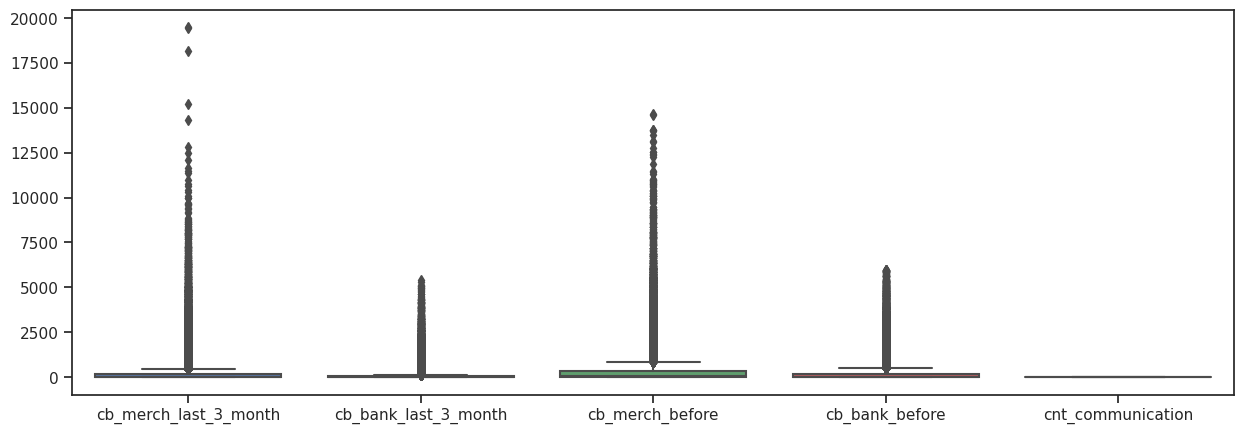

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(df1)

#### Приступим к рассмотрению связи между числом коммуникаций и кэшбеком

In [23]:
print('Связь между группой коммуникации и начисленным кэшбеком от партнеров за последние 3 месяца:',
      df1['cnt_communication'].corr(df1['cb_merch_last_3_month']).round(4))
print()
print('Связь между группой коммуникации и начисленным кэшбеком от банка за последние 3 месяца:',
      df1['cnt_communication'].corr(df1['cb_bank_last_3_month']).round(4))
print()
print('Связь между группой коммуникации и начисленным кэшбеком от партнеров с 2022-01-01 по 2022-08-01:',
      df1['cnt_communication'].corr(df1['cb_merch_before']).round(4))
print()
print('Связь между группой коммуникации и начисленным кэшбеком от банка с 2022-01-01 по 2022-08-01:',
      df1['cnt_communication'].corr(df1['cb_bank_before']).round(4))

Связь между группой коммуникации и начисленным кэшбеком от партнеров за последние 3 месяца: 0.0806

Связь между группой коммуникации и начисленным кэшбеком от банка за последние 3 месяца: 0.0874

Связь между группой коммуникации и начисленным кэшбеком от партнеров с 2022-01-01 по 2022-08-01: 0.035

Связь между группой коммуникации и начисленным кэшбеком от банка с 2022-01-01 по 2022-08-01: 0.0436


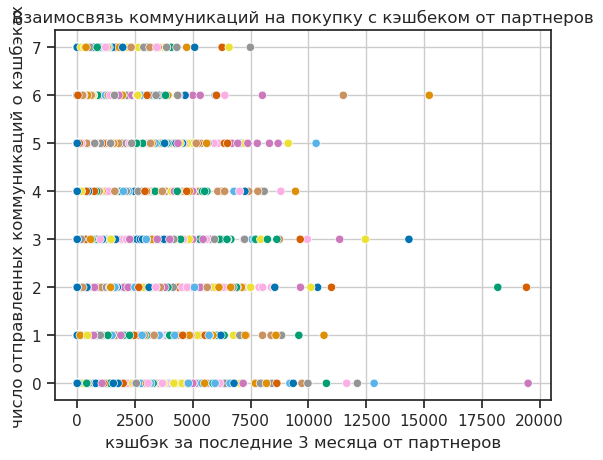

In [24]:
sns.scatterplot(data = df1, x = 'cb_merch_last_3_month', y = 'cnt_communication', hue = 'cb_merch_last_3_month', palette = 'colorblind', legend=False)
plt.xlabel('кэшбэк за последние 3 месяца от партнеров')
plt.ylabel('число отправленных коммуникаций о кэшбэках')
plt.title('Взаимосвязь коммуникаций на покупку с кэшбеком от партнеров')

sns.set_theme(style='darkgrid')
plt.grid(True)

plt.show()

/tmp/ipykernel_470/729003464.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = df1, x = 'cb_bank_last_3_month', y = 'cnt_communication', color = 'r', palette='coolwarm')


Text(0.5, 1.0, 'Взаимосвязь коммуникаций на покупку с кэшбеком от банка')

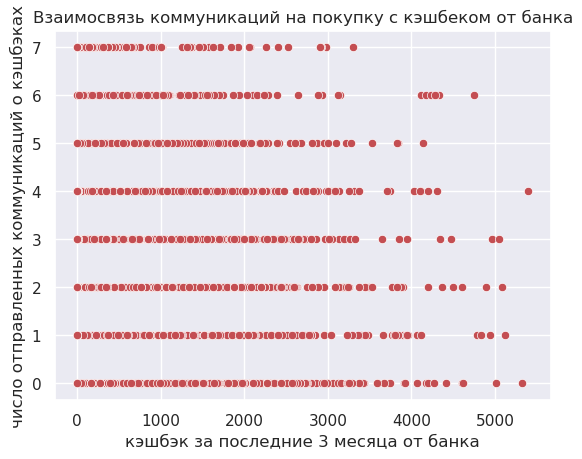

In [25]:
sns.scatterplot(data = df1, x = 'cb_bank_last_3_month', y = 'cnt_communication', color = 'r', palette='coolwarm')
plt.xlabel('кэшбэк за последние 3 месяца от банка') 
plt.ylabel('число отправленных коммуникаций о кэшбэках')
plt.title('Взаимосвязь коммуникаций на покупку с кэшбеком от банка')

Text(0.5, 1.0, 'Взаимосвязь коммуникаций на покупку с кэшбеком от партнеров')

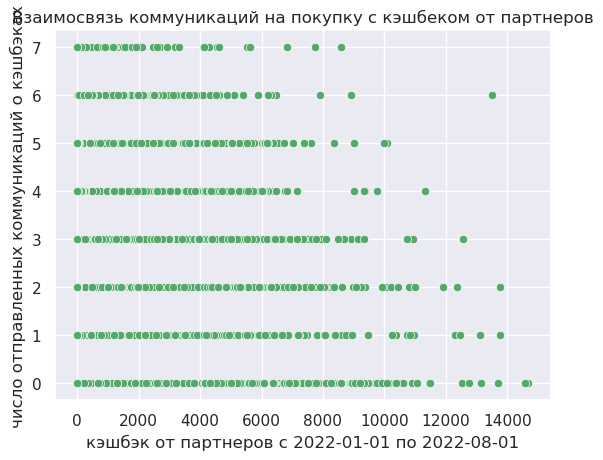

In [26]:
sns.scatterplot(data = df1, x = 'cb_merch_before', y = 'cnt_communication', color = 'g')
plt.xlabel('кэшбэк от партнеров с 2022-01-01 по 2022-08-01')
plt.ylabel('число отправленных коммуникаций о кэшбэках')
plt.title('Взаимосвязь коммуникаций на покупку с кэшбеком от партнеров')

Text(0.5, 1.0, 'Взаимосвязь коммуникаций на покупку с кэшбеком от банка')

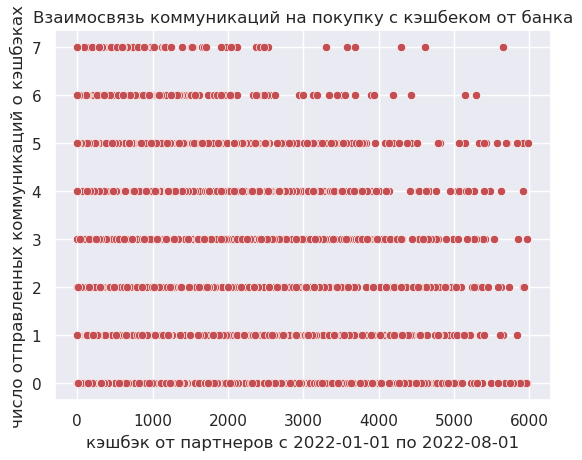

In [27]:
sns.scatterplot(data = df1, x = 'cb_bank_before', y = 'cnt_communication', color = 'r')
plt.xlabel('кэшбэк от партнеров с 2022-01-01 по 2022-08-01')
plt.ylabel('число отправленных коммуникаций о кэшбэках')
plt.title('Взаимосвязь коммуникаций на покупку с кэшбеком от банка')

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
#### Предварительный вывод:
Как показывают диаграммы рассеивания и коэффициент корреляции Пирсона - между кэшбеком и количеством коммуникаций нет никакой связи. Возможно стоит разбить всех клиентов по числу коммуникаций на несколько групп по степени активности. Для определения уровней активности воспользуемся значениями квартилей. Первый квартиль = 0, что видно на графике. Второй = медиане.
    
</div>

In [28]:
q3 = np.quantile(df1['cnt_communication'], 0.75)
q2 = df1['cnt_communication'].median()
print('Значение второго квартиля:', q2)
print('Значение третьего квартиля:', q3)

Значение второго квартиля: 1.0
Значение третьего квартиля: 3.0


In [29]:
def f1(x):
    if x < 1:
        return 1
    elif x >= 1 and x < 3:
        return 2
    elif x >= 3:
        return 3
df['communication_group'] = df['cnt_communication'].apply(f1)

In [30]:
df1 = df[['cb_merch_last_3_month', 'cb_bank_last_3_month', 'cb_merch_before', 'cb_bank_before', 'cnt_communication', 'communication_group']]

In [31]:
groups = df1.groupby('communication_group')[['cb_merch_last_3_month', 'cb_bank_last_3_month', 'cb_merch_before', 'cb_bank_before']].sum()
groups

cb_merch_last_3_month  cb_bank_last_3_month  \
communication_group                                                
1                                3398332.0             1501182.0   
2                                4833494.0             2235300.0   
3                                4931683.0             2333176.0   

                     cb_merch_before  cb_bank_before  
communication_group                                   
1                          6298053.0       3905051.0  
2                          7459890.0       4783030.0  
3                          6473813.0       4256509.0

<Axes: ylabel='communication_group'>

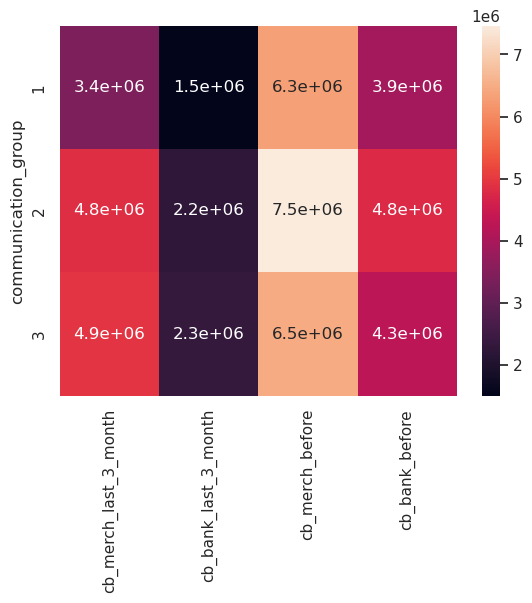

In [32]:
sns.heatmap(groups, annot = True, )

In [33]:
print('Связь между группой коммуникации и начисленным кэшбеком от партнеров за последние 3 месяца:',
      df1['communication_group'].corr(df1['cb_merch_last_3_month']).round(4))
print()
print('Связь между группой коммуникации и начисленным кэшбеком от банка за последние 3 месяца:',
      df1['communication_group'].corr(df1['cb_bank_last_3_month']).round(4))
print()
print('Связь между группой коммуникации и начисленным кэшбеком от партнеров с 2022-01-01 по 2022-08-01:',
      df1['communication_group'].corr(df1['cb_merch_before']).round(4))
print()
print('Связь между группой коммуникации и начисленным кэшбеком от банка с 2022-01-01 по 2022-08-01:',
      df1['communication_group'].corr(df1['cb_bank_before']).round(4))

Связь между группой коммуникации и начисленным кэшбеком от партнеров за последние 3 месяца: 0.0748

Связь между группой коммуникации и начисленным кэшбеком от банка за последние 3 месяца: 0.081

Связь между группой коммуникации и начисленным кэшбеком от партнеров с 2022-01-01 по 2022-08-01: 0.0345

Связь между группой коммуникации и начисленным кэшбеком от банка с 2022-01-01 по 2022-08-01: 0.0441


<Axes: xlabel='communication_group'>

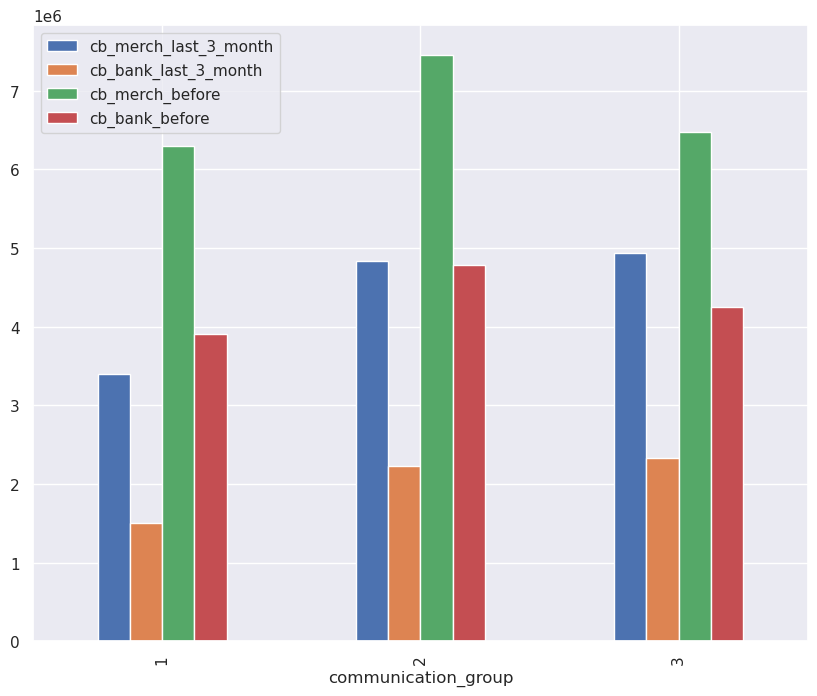

In [34]:
groups.plot(kind='bar', figsize = (10,8))

<div style="background-color: lavender; padding: 15px; border-radius: 5px;">

### Итоговый вывод пункта 1: между кэшбеком и числом коммуникаций нет связи.

* Коэффициенты корреляции, расчитанные для несгруппированных данных указывают на отсутствие связи по всем видам кэшбека;
* Диаграммы рассеивания, расчитанные для несгруппированных данных указывают на отсутствие связи по всем видам кэшбека;
* Коэффициенты корреляции, расчитанные для сгруппированных данных указывают на отсутствие связи по всем видам кэшбека;
* Диаграммы рассеивания, расчитанные для сгруппированных данных указывают на отсутствие связи по всем видам кэшбека;
* Столбчатая диаграмма, отражающая сумму кэшбека по видам и расчитанная для сгруппированных данных указывает на отсутствие зависимости количества коммуникаций и соответствующей группой

<a id='взаимосвязь-оборота'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">2. Как взаимосвязаны обороты клиентов и выплаченный кэшбэк? </h1>
</div>

[Вернуться к содержанию](#задачи)

Нам нужно изучить, как сумма покупок клиентов (оборот) связана с размером полученного кэшбэка.

### Этапы:

#### 1. Корреляционный анализ:

Рассчитать коэффициент корреляции : Покажет линейную зависимость между общим оборотом и общим кэшбэком.<br>
Визуализация: Построить диаграмму рассеяния для наглядного представления зависимости.<br>
Разделить на две группы: до и после обновления и посмотреть разницу the same<br>


#### 2. Регрессионный анализ:

Построить модель линейной регрессии: Оценить, насколько сильно оборот влияет на кэшбэк и получить уравнение регрессии для прогнозирования.<br>
Проверить значимость коэффициентов: Определить, насколько значимо влияние оборота на кэшбэк.


#### 3. Сегментация клиентов:

Разделить клиентов на группы: По обороту (низкий, средний, высокий), по уровню вовлеченности (активные, пассивные) и т.д.<br>
Сравнить средний кэшбэк: Проанализировать, как средний кэшбэк варьируется между группами.


#### 4. Анализ категорий:

Изучить вклад каждой категории: Определить, какие категории товаров вносят наибольший вклад в общий оборот и кэшбэк.<br>
Сегментация по категориям: Разделить клиентов по основным категориям покупок и сравнить их поведение.

<a id='21-приведение-заголовков-к-удобному-Виду'></a>

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

## 1. Корреляционный анализ:
</div>

[Вернуться к содержанию](#задачи)

### Корреляция между тратами (оборотом) в каждой отдельной категории и общим кэшбэком (суммой):

In [35]:
# Рассчитаем общий оборот для каждого клиента (общая сумма трат)
# выбираем все столбцы с расходами (уже не кешбек) по категориям (с 8-го)
df['total_spend'] = df.iloc[:, 8:].sum(axis=1)
df.sample(4)

client_id  cb_merch_last_3_month  cb_bank_last_3_month  \
6630   154577931                    0.0                   0.0   
6473   542701859                    0.0                   0.0   
37358  697568005                  235.0                 157.0   
35976  840514237                    0.0                   0.0   

       cb_merch_before  cb_bank_before  cnt_communication  cnt_activation  \
6630              10.0            17.0                  1              93   
6473             626.0             0.0                  3              11   
37358             13.0            26.0                  3             132   
35976            270.0           193.0                  6              56   

       cnt_view  Air  Beauty shop  ...  Fuel_before  House_before  \
6630        158  0.0          0.0  ...        146.0           0.0   
6473         21  0.0        136.0  ...         21.0         687.0   
37358       325  0.0          0.0  ...          0.0          27.0   
35976       123  0.0        104.0  ...          0.0           0.0   

       Jewelry_before  Other_before  Pet shop_before  Pharmacies_before  \
6630              0.0         434.0             49.0               92.0   
6473            263.0        2194.0              0.0               78.0   
37358             0.0         623.0              0.0               56.0   
35976           188.0          51.0              0.0                0.0   

       Supermarkets_before  Transport_before  communication_group  total_spend  
6630                 394.0               7.0                    2      18113.0  
6473                1058.0             700.0                    3      16563.0  
37358               1287.0             437.0                    3       5009.0  
35976                 74.0              85.0                    3       3538.0  

[4 rows x 42 columns]

In [36]:
# Создаем новый столбец с общим кэшбэком 
df['total_cashback'] = df['cb_merch_last_3_month'] + df['cb_bank_last_3_month'] + df['cb_merch_before'] + df['cb_bank_before']
df.sample(3)

client_id  cb_merch_last_3_month  cb_bank_last_3_month  \
27652  793735188                  118.0                   0.0   
14403  343857373                    0.0                   0.0   
21888  299956234                    0.0                   0.0   

       cb_merch_before  cb_bank_before  cnt_communication  cnt_activation  \
27652              0.0           129.0                  2              99   
14403              0.0           224.0                  3             207   
21888             23.0            56.0                  0             307   

       cnt_view     Air  Beauty shop  ...  House_before  Jewelry_before  \
27652       239     0.0        134.0  ...           0.0            17.0   
14403       481  5128.0          0.0  ...         716.0             0.0   
21888       828     0.0          0.0  ...         830.0             0.0   

       Other_before  Pet shop_before  Pharmacies_before  Supermarkets_before  \
27652         471.0             14.0              168.0                856.0   
14403       20345.0              0.0              199.0               6325.0   
21888        4208.0              0.0               58.0               2446.0   

       Transport_before  communication_group  total_spend  total_cashback  
27652             388.0                    2      10152.0           247.0  
14403            1726.0                    3      97826.0           224.0  
21888             910.0                    1      22930.0            79.0  

[3 rows x 43 columns]

In [37]:
# Вычисляем матрицу корреляций ДО обновления

corr_matrix_before = df[['Air_before', 'Beauty shop_before',
       'Book store_before', 'Children_before', 'Cinema_before',
       'Clothes_before', 'Electronics_before', 'Fastfood_before',
       'Fuel_before', 'House_before', 'Jewelry_before', 'Other_before',
       'Pet shop_before', 'Pharmacies_before', 'Supermarkets_before', 
       'Transport_before', 'total_cashback']].corr()

last_row_before = corr_matrix_before.iloc[-1]
last_row_before

Air_before             0.068260
Beauty shop_before     0.041671
Book store_before      0.039938
Children_before        0.062610
Cinema_before          0.069592
Clothes_before         0.105821
Electronics_before     0.166725
Fastfood_before        0.143051
Fuel_before            0.069737
House_before           0.106584
Jewelry_before         0.074048
Other_before           0.259638
Pet shop_before        0.061441
Pharmacies_before      0.115720
Supermarkets_before    0.161678
Transport_before       0.077963
total_cashback         1.000000
Name: total_cashback, dtype: float64

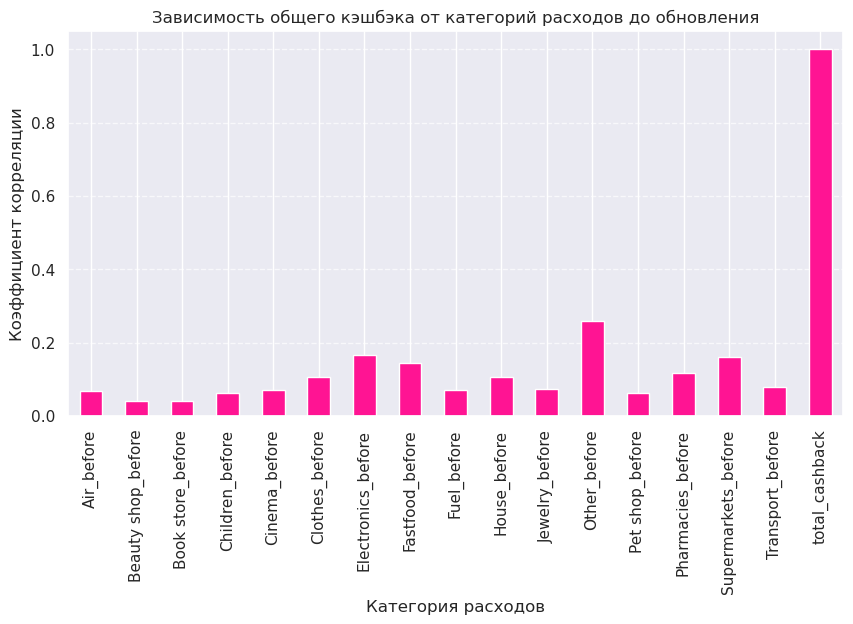

In [38]:
plt.figure(figsize=(10,5))
last_row_before.plot(kind='bar', color='deeppink')
plt.title('Зависимость общего кэшбэка от категорий расходов до обновления')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление сетки по оси Y
plt.ylabel('Коэффициент корреляции')
plt.xlabel('Категория расходов')
plt.show()

In [39]:
# Вычисляем матрицу корреляций ПОСЛЕ обновления

corr_matrix_after = df[['Air', 'Beauty shop', 'Book store',
       'Children', 'Cinema', 'Clothes', 'Electronics', 'Fastfood', 'Fuel',
       'House', 'Jewelry', 'Other', 'Pet shop', 'Pharmacies', 'Supermarkets',
       'Transport', 'total_cashback']].corr()

last_row_after = corr_matrix_after.iloc[-1]
last_row_after

Air               0.062675
Beauty shop       0.044340
Book store        0.025704
Children          0.054795
Cinema            0.036172
Clothes           0.094800
Electronics       0.399353
Fastfood          0.133334
Fuel              0.075941
House             0.069030
Jewelry           0.069668
Other             0.258970
Pet shop          0.046856
Pharmacies        0.102272
Supermarkets      0.173895
Transport         0.075624
total_cashback    1.000000
Name: total_cashback, dtype: float64

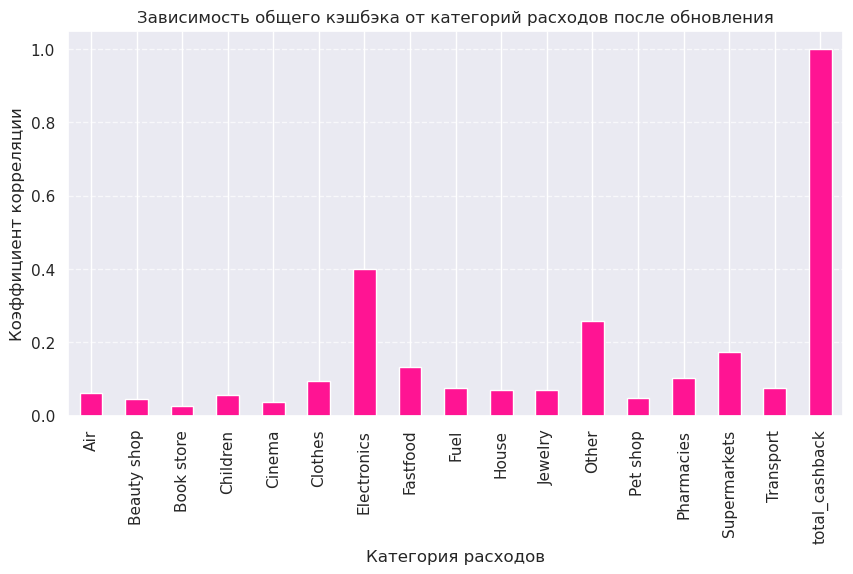

In [40]:
plt.figure(figsize=(10,5))
last_row_after.plot(kind='bar', color='deeppink')
plt.title('Зависимость общего кэшбэка от категорий расходов после обновления')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление сетки по оси Y
plt.ylabel('Коэффициент корреляции')
plt.xlabel('Категория расходов')
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">


### Выводы:
Если коэффициент корреляции положительный и близок к 1, это означает, что увеличение расходов в данной категории, как правило, приводит к увеличению общего кэшбэка. <br>
Например, высокая положительная корреляция с категорией "Electronics" и до и после обновления говорит о том, что чем больше клиент тратит на электронику, тем больше он получает кэшбэка.<br><br>
Популярные категории до:
- Другое
- Электроника
- Супермаркеты
- Фаст фуд<br><br>
Популярные категории после:
- Электроника
- Другое
- Супермаркеты
- Фаст-фуд<br>
Они немного поменялись местами и кешбек в категории электроника стал меньше, а в категории Другое - больше. По остальным категориям заметно чуть заметное уменьшение.
    
</div>

### Корреляция между общим оборотом и общим кэшбэком (суммой):

In [41]:
# Вычисляем матрицу корреляций
corr_matrix = df[['total_spend', 'total_cashback']].corr()
corr_matrix

total_spend  total_cashback
total_spend        1.000000        0.292703
total_cashback     0.292703        1.000000

<Axes: >

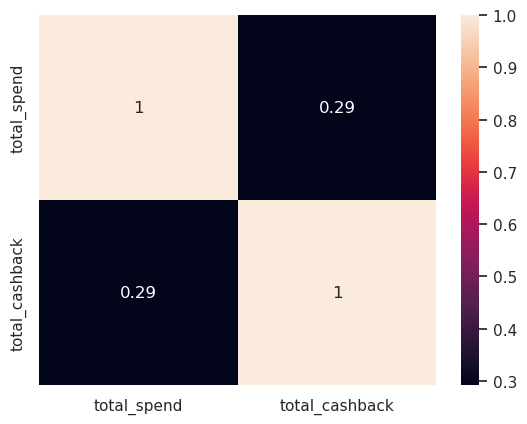

In [42]:
sns.heatmap(corr_matrix, annot=True)

In [43]:
# коэффициент корреляции между total_spend и total_cashback
corr = corr_matrix.loc['total_spend', 'total_cashback']

print('Корреляция между общим оборотом и общим кэшбэком:', corr)

Корреляция между общим оборотом и общим кэшбэком: 0.2927026505995442


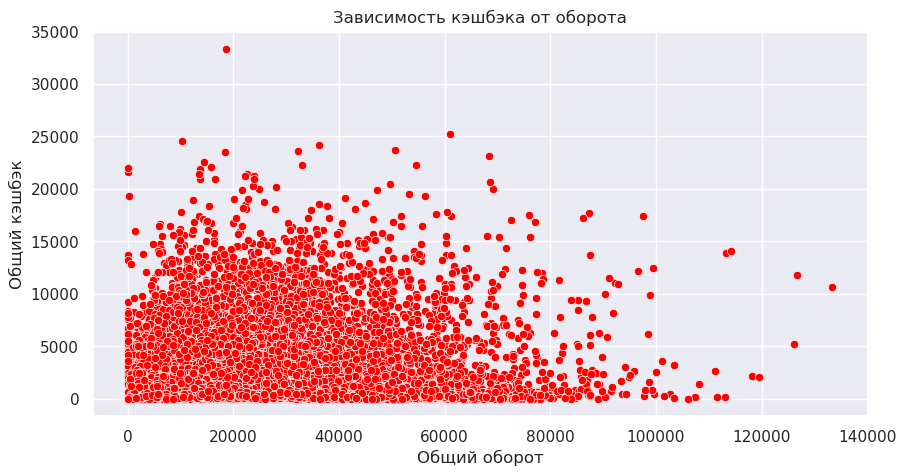

In [44]:
# постройте диаграмму рассеяния
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = 'total_spend', y = 'total_cashback', color = 'red')
plt.xlabel('Общий оборот')
plt.ylabel('Общий кэшбэк')
plt.title('Зависимость кэшбэка от оборота')
plt.grid(True)
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

#### Вывод: 
 • Слабая линейная корреляция: Существует некоторая положительная корреляция между общим оборотом и общим кэшбэком, однако она не является сильной. Это означает, что с увеличением оборота, в среднем, увеличивается и кэшбэк, но эта зависимость не является строгой и на нее могут влиять другие факторы.<br>
 • Большая дисперсия данных: Точки на графике сильно разбросаны, что говорит о высокой индивидуальной вариабельности. Это означает, что для разных клиентов с одинаковым оборотом кэшбэк может значительно отличаться.<br>
 • Наличие выбросов: На графике присутствуют отдельные точки, значительно отклоняющиеся от общей массы данных. Это могут быть как ошибки в данных, так и реальные случаи с аномально высоким или низким кэшбэком. Мы уже удалили 3% выбросов, эти считаем просто большими покупками.
</div>

### Поделим на 2 группы

In [45]:
# Разделим данные на две группы
df['spend_before'] = df[['Air_before', 'Beauty shop_before', 'Book store_before',
                         'Children_before', 'Cinema_before', 'Clothes_before',
                         'Electronics_before', 'Fastfood_before', 'Fuel_before',
                         'House_before', 'Jewelry_before', 'Other_before',
                         'Pet shop_before', 'Pharmacies_before',
                         'Supermarkets_before', 'Transport_before']].sum(axis=1)
df['spend_after'] = df[['Air', 'Beauty shop', 'Book store', 'Children', 'Cinema',
                        'Clothes', 'Electronics', 'Fastfood', 'Fuel', 'House',
                        'Jewelry', 'Other', 'Pet shop', 'Pharmacies',
                        'Supermarkets', 'Transport']].sum(axis=1)

df.sample(3)

client_id  cb_merch_last_3_month  cb_bank_last_3_month  \
6244   326426249                    0.0                   0.0   
32153  265661150                    0.0                   0.0   
7914   732786014                 1655.0                 963.0   

       cb_merch_before  cb_bank_before  cnt_communication  cnt_activation  \
6244               0.0            16.0                  4              94   
32153            312.0            40.0                  2             165   
7914             919.0           670.0                  1             233   

       cnt_view  Air  Beauty shop  ...  Other_before  Pet shop_before  \
6244        131  0.0        309.0  ...         850.0             57.0   
32153       360  0.0          0.0  ...        1081.0              0.0   
7914        688  0.0         19.0  ...        4282.0              0.0   

       Pharmacies_before  Supermarkets_before  Transport_before  \
6244                80.0               2862.0               0.0   
32153               52.0               2754.0             145.0   
7914               300.0               1623.0             178.0   

       communication_group  total_spend  total_cashback  spend_before  \
6244                     3      16771.0            16.0        5734.0   
32153                    2       9041.0           352.0        4529.0   
7914                     2      15149.0          4207.0        7512.0   

       spend_after  
6244       11034.0  
32153       4510.0  
7914        7635.0  

[3 rows x 45 columns]

In [46]:
# Корреляционный анализ
correlations = {
    'before': df[['spend_before', 'total_cashback']].corr().iloc[0, 1],
    'after': df[['spend_after', 'total_cashback']].corr().iloc[0, 1]
}

print(f"Корреляция до обновления: {correlations['before']:.3f}")
print(f"Корреляция после обновления: {correlations['after']:.3f}")

Корреляция до обновления: 0.260
Корреляция после обновления: 0.275


In [47]:
# Вычисляем матрицу корреляций
corr_matrix_before = df[['spend_before', 'total_cashback']].corr()
corr_matrix_before

spend_before  total_cashback
spend_before        1.000000        0.260216
total_cashback      0.260216        1.000000

<Axes: >

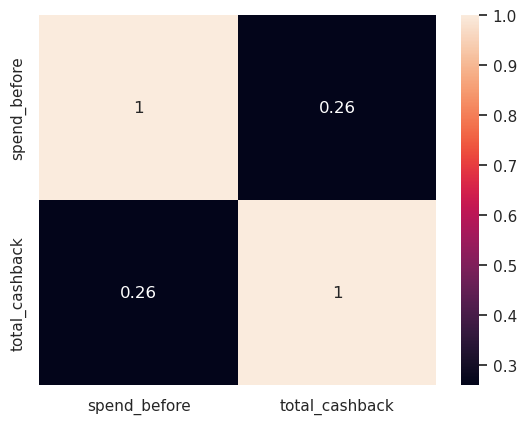

In [48]:
sns.heatmap(corr_matrix_before, annot=True)

In [49]:
# Вычисляем матрицу корреляций
corr_matrix_after = df[['spend_after', 'total_cashback']].corr()
corr_matrix_after

spend_after  total_cashback
spend_after        1.000000        0.275323
total_cashback     0.275323        1.000000

<Axes: >

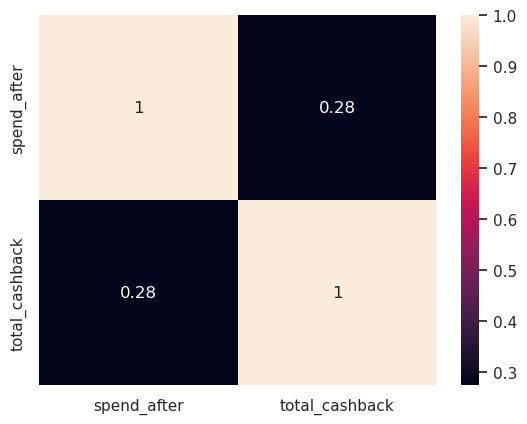

In [50]:
sns.heatmap(corr_matrix_after, annot=True)

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

    
### Вывод:
    
    Коэффициент корреляции 0.26 (до обновления) и 0,28 (после обновления) указывает на слабую положительную связь между общим оборотом и общим кэшбэком. Это означает, что по мере увеличения общего оборота, общий кэшбэк также, как правило, увеличивается, но эта зависимость не является очень сильной.

- Общее направление зависимости: Существует положительная корреляция между общим оборотом и общим кэшбэком. То есть, чем больше клиент тратит, тем больше кэшбэка он получает.

- Разброс данных: Точки на графике достаточно сильно разбросаны вокруг предполагаемой линии тренда. Это говорит о том, что хотя общая тенденция к положительной корреляции есть, на размер кэшбэка влияют и другие факторы, помимо общего оборота.

- Выбросы: На графике присутствуют несколько точек, которые значительно отклоняются от основной массы данных. Это могут быть выбросы, вызванные ошибками в данных или особенностями поведения отдельных клиентов.

#### Возможные выводы:

Программа лояльности работает: Система кэшбэка стимулирует клиентов совершать больше покупок.
Существуют дополнительные факторы: На размер кэшбэка влияют не только общие расходы, но и другие факторы, такие как:
- Участие в специальных акциях
- Тип приобретаемых товаров
- Длительность сотрудничества с банком
- Сегментация клиента (VIP, обычный и т.д.)

Необходимо более детальный анализ: Для более глубокого понимания взаимосвязи между оборотом и кэшбэком требуется дополнительный анализ данных, например, анализ по группам клиентов (сегментация)

</div>

<a id='22-регрес'></a>
<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

## 2. Регрессионный анализ
</div>

[Вернуться к содержанию](#задачи)

### До обновления

In [51]:
x = df[['Air_before', 'Beauty shop_before',
       'Book store_before', 'Children_before', 'Cinema_before',
       'Clothes_before', 'Electronics_before', 'Fastfood_before',
       'Fuel_before', 'House_before', 'Jewelry_before', 'Other_before',
       'Pet shop_before', 'Pharmacies_before', 'Supermarkets_before', 
       'Transport_before']]
y = df['total_cashback']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)# создадим модель линейной регрессии
print('Уравнение регрессии: y = {:.2f}x + {:.2f}'.format(model.coef_[0], model.intercept_))

[-29.81783093 -57.27154436   6.53073488  -3.14053319  12.95641192
   9.24385496 243.8905524   42.02895837 -62.31441293  61.25180507
  65.65814417 453.18805584  21.26670099  54.97046961  91.74909463
 -77.14771923] 1080.6722417536967
Уравнение регрессии: y = -29.82x + 1080.67


In [53]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [54]:
# Прогнозы
from sklearn.metrics import r2_score

x_test_st = scaler.transform(x_test)

y_pred = model.predict(x_test_st)

# Оценка точности
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

R^2: 0.09163751273063225


### После обновления

In [55]:
x = df[['Air', 'Beauty shop', 'Book store',
       'Children', 'Cinema', 'Clothes', 'Electronics', 'Fastfood', 'Fuel',
       'House', 'Jewelry', 'Other', 'Pet shop', 'Pharmacies', 'Supermarkets',
       'Transport']]
y = df['total_cashback']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)# создадим модель линейной регрессии
print('Уравнение регрессии: y = {:.2f}x + {:.2f}'.format(model.coef_[0], model.intercept_))

[ 23.28622729 -14.74579714 -15.95939318  -6.18953229 -15.72130518
 -21.45556669 767.63290781   7.49600651 -60.85474166   9.95719659
  70.68123098 413.07068905  -4.76621375  26.66649895 112.71599037
 -64.76764525] 1080.6722417536967
Уравнение регрессии: y = 23.29x + 1080.67


In [57]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [58]:
# Прогнозы
from sklearn.metrics import r2_score

x_test_st = scaler.transform(x_test)

y_pred = model.predict(x_test_st)

# Оценка точности
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

R^2: 0.20398381696240953


<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

### Анализ данных, полученных при регрессионном анализе

#### **До обновления**:
1. **Коэффициенты регрессии:**
   - Коэффициент наклона (-29.82) показывает отрицательную зависимость между \(x\) и \(y\). Это означает, что при увеличении \(x\) ожидается снижение значения \(y\), хотя связь слабая.

2. **Качество модели:**
   - Значение \(R^2 = 0.0916\) указывает на очень слабое качество модели. Только 9.16% вариации в \(y\) объясняется изменениями в \(x\), что говорит о том, что зависимость между переменными практически отсутствует или модель плохо описывает данные.

3. **Проблемы:**
   - Низкое \(R^2\) может быть следствием несоответствия линейной модели природе данных, наличия шумов или выбросов.
   - Коэффициенты показывают значительный разброс, что может указывать на гетерогенность данных.

---

#### **После обновления**:
1. **Коэффициенты регрессии:**
   - Коэффициент наклона 23.29 изменился на положительное значение, указывая на положительную зависимость между \(x\) и \(y\). Это означает, что при увеличении \(x\) ожидается рост значения \(y\), но связь остаётся незначительной.

2. **Качество модели:**
   - Значение \(R^2 = 0.204\) существенно увеличилось по сравнению с предыдущим результатом, но остаётся низким. Это означает, что модель теперь объясняет около 20.4% вариации в \(y\), что всё ещё указывает на слабую связь.

3. **Проблемы и улучшения:**
   - Увеличение \(R^2\) свидетельствует о том, что обновление данных или методов улучшило качество модели.
   - Коэффициенты демонстрируют меньший разброс по сравнению с данными до обновления, что говорит о снижении уровня шума или выбросов в данных.
   - Тем не менее, \(R^2\) остаётся низким, что может указывать на необходимость использования нелинейных методов анализа или добавления новых предикторов.

---

### Сравнение и выводы:
1. **Зависимость:**
   - До обновления зависимость была отрицательной (\(-29.82\)), но слабо выраженной. После обновления она стала положительной (\(23.29\)) с небольшим улучшением качества модели.

2. **Качество модели:**
   - После обновления коэффициент детерминации (\(R^2\)) увеличился с \(0.0916\) до \(0.204\), что указывает на улучшение описательной способности модели. Однако оба значения всё ещё свидетельствуют о слабой объясняющей силе модели.



**Общий вывод:**  
Обновление данных улучшило модель, о чём свидетельствует увеличение \(R^2\), но зависимость между переменными остаётся слабой.
    
</div>

<a id='23-сегмент'></a>
<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

## 3. Сегментация клиентов
</div>

[Вернуться к содержанию](#задачи)

In [59]:
# Создаем новый столбец для указания периода
df['period'] = 'before'
df.loc[df['spend_after'] > 0, 'period'] = 'after'

# Сегментация клиентов
# По обороту: низкий, средний, высокий
spend_labels = ['низкий', 'средний', 'высокий']
df['spend_segment'] = pd.qcut(df['total_spend'], q=3, labels=spend_labels)

# По вовлеченности: активные и пассивные (на основе количества просмотров)
engagement_labels = ['пассивные', 'активные']
df['engagement_segment'] = pd.qcut(df['cnt_view'], q=2, labels=engagement_labels)

In [60]:
# Средний кэшбэк по сегментам оборота и периодам
avg_cashback_by_spend_period = df.groupby(['spend_segment', 'period'])['total_cashback'].mean()

print("Средний кэшбэк по сегментам оборота и периодам:")
avg_cashback_by_spend_period

Средний кэшбэк по сегментам оборота и периодам:


spend_segment  period
низкий         after      564.345190
               before     329.468868
средний        after      927.423560
               before     839.741627
высокий        after     1805.239648
               before    1430.134146
Name: total_cashback, dtype: float64

In [61]:
# Средний кэшбэк по сегментам вовлеченности и периодам
avg_cashback_by_engagement_period = df.groupby(['engagement_segment', 'period'])['total_cashback'].mean()

print("\nСредний кэшбэк по сегментам вовлеченности и периодам:")
avg_cashback_by_engagement_period


Средний кэшбэк по сегментам вовлеченности и периодам:


engagement_segment  period
пассивные           after      667.161503
                    before     290.901736
активные            after     1550.115239
                    before    1297.943396
Name: total_cashback, dtype: float64

<Figure size 1200x600 with 0 Axes>

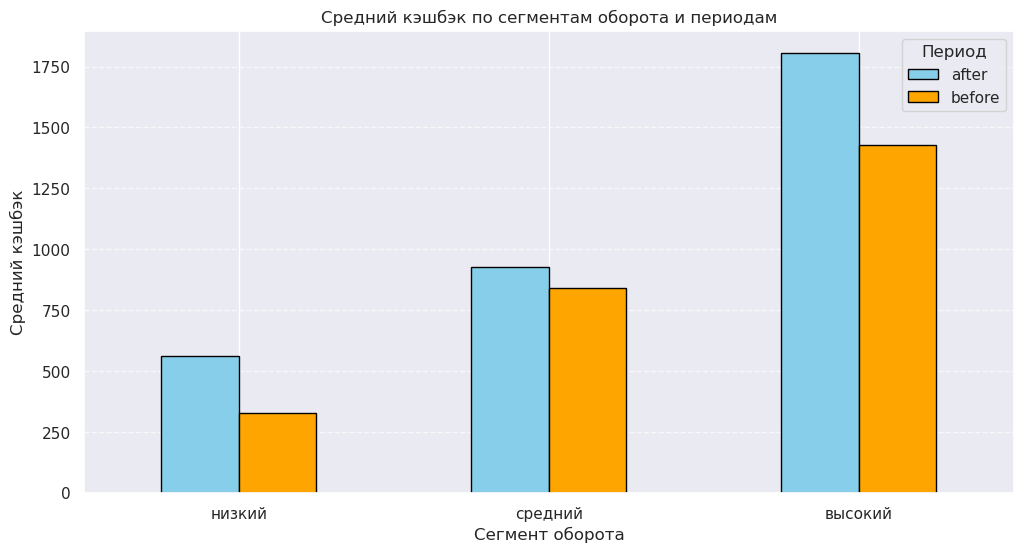

In [62]:
# Визуализация
# Распределение по сегментам оборота и периодам
plt.figure(figsize=(12, 6))
avg_cashback_by_spend_period.unstack().plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'], edgecolor='black')
plt.title('Средний кэшбэк по сегментам оборота и периодам')
plt.ylabel('Средний кэшбэк')
plt.xlabel('Сегмент оборота')
plt.xticks(rotation=0)
plt.legend(title='Период')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

#### Анализ графика "Средний кэшбэк по сегментам оборота и периодам"
<br>
 • Влияние сегмента оборота: Средний кэшбэк существенно зависит от сегмента оборота клиента. Клиенты с высоким оборотом получают значительно больший кэшбэк по сравнению с клиентами с низким и средним оборотом. Это говорит о том, что программа лояльности более выгодна для крупных клиентов.<br><br>
 • Влияние периода: В целом, средний кэшбэк в период "after" выше, чем в период "before" для всех сегментов оборота. Это может свидетельствовать о том, что введенные изменения в программе лояльности или другие маркетинговые активности привели к увеличению среднего кэшбэка для всех категорий клиентов.<br><br>
 • Взаимодействие сегментов и периодов: Наиболее заметное увеличение среднего кэшбэка в период "after" наблюдается у клиентов с высоким оборотом. Это может указывать на то, что изменения в программе лояльности были более эффективны для этой группы клиентов.<br><br>

#### Выводы: <br>
 1 Программа лояльности успешно стимулирует клиентов с высоким оборотом: Высокий средний кэшбэк для этой группы клиентов свидетельствует о том, что программа лояльности достигает своей цели - удержания и стимулирования крупных клиентов.<br><br>
 2 Изменения в программе лояльности привели к положительным результатам: Увеличение среднего кэшбэка для всех сегментов оборота в период "after" говорит о том, что внесенные изменения были эффективными.
</div>

<Figure size 1200x600 with 0 Axes>

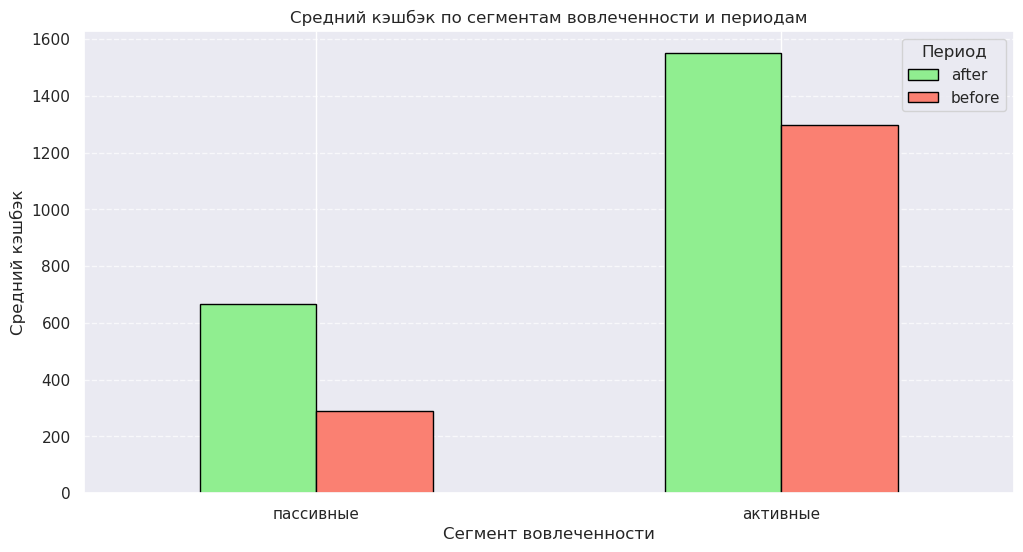

In [63]:
# Распределение по сегментам вовлеченности и периодам
plt.figure(figsize=(12, 6))
avg_cashback_by_engagement_period.unstack().plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'salmon'], edgecolor='black')
plt.title('Средний кэшбэк по сегментам вовлеченности и периодам')
plt.ylabel('Средний кэшбэк')
plt.xlabel('Сегмент вовлеченности')
plt.xticks(rotation=0)
plt.legend(title='Период')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

### Анализ графика "Средний кэшбэк по сегментам вовлеченности и периодам"
 
График демонстрирует, что средний кэшбэк существенно зависит от двух факторов: сегмента вовлеченностиклиента и периода.<br><br>
Ключевые выводы: <br><br>
 #### • Влияние сегмента вовлеченности:<br>
 ◦ Активные клиенты получают значительно больший средний кэшбэк по сравнению с пассивными. Это говорит о том, что программа лояльности эффективно стимулирует более активных пользователей.<br>
 ◦ Такой результат свидетельствует о том, что компания успешно сегментирует своих клиентов и предлагает более выгодные условия для тех, кто активно взаимодействует с брендом.<br><br>
 #### • Влияние периода:<br>
 ◦ Во всех сегментах вовлеченности наблюдается рост среднего кэшбэка в период "after" по сравнению с периодом "before".<br>
 ◦ Это может указывать на то, что компания внедрила какие-то изменения в программу лояльности, которые привели к увеличению размера возвращаемых средств.<br><br>
 #### • Взаимодействие сегментов и периодов:<br>
 ◦ Рост среднего кэшбэка в период "after" более выражен у активных клиентов. Это может свидетельствовать о том, что изменения в программе лояльности были направлены именно на эту группу пользователей, и они оказались наиболее эффективными.<br><br>
#### Возможные причины изменений:<br><br>
 • Изменение условий программы лояльности: Возможно, были изменены правила начисления кэшбэка, расширен список партнеров.<br>
 • Маркетинговые акции: В период "after" могли проводиться дополнительные маркетинговые акции, направленные на стимулирование активности клиентов.<br>
 • Сезонность: Если данные собирались за разные периоды года, то на результаты могли повлиять сезонные факторы, такие как праздники или сезонные распродажи.
    
</div>

<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
 
### Выводы по заданию 2:


<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
    
Проведенный анализ данных по среднему кэшбэку, разделенных по сегментам вовлеченности и оборота, а также по периодам, позволил выявить следующие ключевые тенденции:<br><br>
 #### • Сегментация по вовлеченности эффективна: <br>
 Активные клиенты получают значительно больший кэшбэк, что свидетельствует об успешности программы лояльности в стимулировании этой группы пользователей.<br>
 ####  • Сегментация по обороту также значима:<br>
 Клиенты с высоким оборотом имеют более высокий средний кэшбэк, что подчеркивает важность удержания и стимулирования крупных клиентов.
 ####  • Изменения в программе лояльности привели к положительным результатам:<br>
 Введение изменений в программу лояльности привело к увеличению среднего кэшбэка во всех сегментах, что говорит об эффективности принятых мер.
 ####  • Взаимодействие сегментов и периодов: <br> 
 Наиболее значительный рост среднего кэшбэка наблюдается у активных клиентов с высоким оборотом в период после внесения изменений. Это указывает на то, что программа лояльности наиболее эффективно работает для этой целевой аудитории.
#### Общие выводы и рекомендации<br>
 1 Программа лояльности эффективна: Она успешно стимулирует активность клиентов и повышает их лояльность.<br>
 2 Персонализация предложений: Следует продолжать развивать систему персонализации предложений, предлагая каждому сегменту клиентов индивидуальные условия и бонусы.<br>
 3 Фокус на активных клиентах: Необходимо уделять особое внимание удержанию и стимулированию активных клиентов. Это может быть достигнуто через персонализированные предложения, эксклюзивные акции и программы лояльности.<br>
 4 Тестирование новых гипотез: Проводить A/B-тестирование различных вариантов программы лояльности для оценки их эффективности.
<br><br>
Заключение Полученные результаты свидетельствуют о том, что программа лояльности компании является эффективным инструментом для увеличения продаж и укрепления лояльности клиентов. 


<a id='обновление-3-мес'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">3. 3 месяца назад произошло глобальное обновление приложения в т.ч. методики взаимодействия с пользователем. Необходимо оценить эффект обновления. </h1>
</div>

[Вернуться к содержанию](#задачи)

<a id='31-просмотр-данных'></a>
<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
### **3.1 Просмотр данных**
</div>

[Вернуться к содержанию](#задачи)

In [64]:
df.sample(3)

client_id  cb_merch_last_3_month  cb_bank_last_3_month  \
2467   755976753                   99.0                   6.0   
21367  168281172                  590.0                 280.0   
3765   131303325                   88.0                   0.0   

       cb_merch_before  cb_bank_before  cnt_communication  cnt_activation  \
2467              72.0             3.0                  2              45   
21367           5401.0          5347.0                  1             119   
3765              12.0            24.0                  1              48   

       cnt_view     Air  Beauty shop  ...  Supermarkets_before  \
2467         92     0.0          0.0  ...               1079.0   
21367       379  1565.0       1084.0  ...               3820.0   
3765         98     0.0          0.0  ...               1320.0   

       Transport_before  communication_group  total_spend  total_cashback  \
2467              415.0                    2       3919.0           180.0   
21367            2234.0                    2      65954.0         11618.0   
3765                4.0                    2      16655.0           124.0   

       spend_before  spend_after  period  spend_segment  engagement_segment  
2467         2537.0       1380.0   after         низкий           пассивные  
21367       44546.0      21406.0   after        высокий            активные  
3765         8247.0       8406.0   after        высокий           пассивные  

[3 rows x 48 columns]

##### **Для первичного исследования сравним средние значения до и после обновления кешбэка и посмотрим на реакцию клиентов клиентов**

In [65]:
avg_cb_merch_before = df['cb_merch_before'].mean()
avg_cb_merch_after = df['cb_merch_last_3_month'].mean()
avg_cb_bank_before = df['cb_bank_before'].mean()
avg_cb_bank_after = df['cb_bank_last_3_month'].mean()

In [66]:
print(f'Средний кешбэк по партнерам до обновления: {avg_cb_merch_before:.2f}')
print(f'Средний кешбэк по партнерам после обновления: {avg_cb_merch_after:.2f}')
print(f'Средний кешбэк по банку до обновления: {avg_cb_bank_before:.2f}')
print(f'Средний кешбэк по банку после обновления: {avg_cb_bank_after:.2f}')

Средний кешбэк по партнерам до обновления: 418.40
Средний кешбэк по партнерам после обновления: 272.23
Средний кешбэк по банку до обновления: 267.70
Средний кешбэк по банку после обновления: 125.52


<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

***ВЫВОД:*** **Увидим, что средний кешбек по партнерам и банку снизился, что указывает на снижение желания клиентов банка активно пользоваться кешбэуом. Дальше проведем более подробный анализ по категориям, чтобы понять какие категория кэшбека больше "пострадали" и где требуется улучшение**
    
</div>

In [67]:
df

client_id  cb_merch_last_3_month  cb_bank_last_3_month  \
0      162353149                  282.0                 141.0   
1      666605735                    0.0                   0.0   
2      558610079                    0.0                   0.0   
3      769974329                  174.0                   0.0   
4      350605405                    0.0                   0.0   
...          ...                    ...                   ...   
49881  377949465                    0.0                   0.0   
49882  299560244                  131.0                   0.0   
49883   66958117                  448.0                   0.0   
49884  549553108                    0.0                   0.0   
49885  151873511                 1448.0                 345.0   

       cb_merch_before  cb_bank_before  cnt_communication  cnt_activation  \
0                119.0           125.0                  6             229   
1                  0.0             0.0                  0               0   
2                  0.0             0.0                  0              51   
3                151.0           102.0                  3             137   
4                179.0           179.0                  4              18   
...                ...             ...                ...             ...   
49881           1275.0          1280.0                  3             136   
49882              2.0             3.0                  1              32   
49883              0.0             0.0                  1             209   
49884            244.0           244.0                  3              14   
49885            471.0           483.0                  2             123   

       cnt_view     Air  Beauty shop  ...  Supermarkets_before  \
0           606     0.0        109.0  ...               5356.0   
1             0     0.0          0.0  ...                 12.0   
2            77  2585.0          0.0  ...                371.0   
3           375     0.0          0.0  ...                338.0   
4            24     0.0        634.0  ...               2198.0   
...         ...     ...          ...  ...                  ...   
49881       335     0.0          0.0  ...               1034.0   
49882        65     0.0          0.0  ...                949.0   
49883       507    14.0          0.0  ...               1006.0   
49884        21     0.0         66.0  ...               3715.0   
49885       249     0.0          0.0  ...               2628.0   

       Transport_before  communication_group  total_spend  total_cashback  \
0                 119.0                    3      29635.0           667.0   
1                   2.0                    1         15.0             0.0   
2                 458.0                    1      22250.0             0.0   
3                  10.0                    3       2071.0           427.0   
4                  14.0                    3      12199.0           358.0   
...                 ...                  ...          ...             ...   
49881               0.0                    3      23387.0          2555.0   
49882               0.0                    2       5619.0           136.0   
49883             112.0                    2       5648.0           448.0   
49884             155.0                    3      30212.0           488.0   
49885             279.0                    2      14139.0          2747.0   

       spend_before  spend_after  period  spend_segment  engagement_segment  
0           16800.0      12832.0   after        высокий            активные  
1              14.0          0.0  before         низкий           пассивные  
2           12474.0       9775.0   after        высокий           пассивные  
3             904.0       1164.0   after         низкий            активные  
4            4489.0       7707.0   after        средний           пассивные  
...             ...          ...     ...            ...                 ...  
49881        4196.0      19188.0   af

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48355 entries, 0 to 49885
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   client_id              48355 non-null  int64   
 1   cb_merch_last_3_month  48355 non-null  float64 
 2   cb_bank_last_3_month   48355 non-null  float64 
 3   cb_merch_before        48355 non-null  float64 
 4   cb_bank_before         48355 non-null  float64 
 5   cnt_communication      48355 non-null  int64   
 6   cnt_activation         48355 non-null  int64   
 7   cnt_view               48355 non-null  int64   
 8   Air                    48355 non-null  float64 
 9   Beauty shop            48355 non-null  float64 
 10  Book store             48355 non-null  float64 
 11  Children               48355 non-null  float64 
 12  Cinema                 48355 non-null  float64 
 13  Clothes                48355 non-null  float64 
 14  Electronics            48355 non-null  floa

In [69]:
#определяем категории, используя корректные суффиксы
categories = [col.split('_before') [0] for col in df.columns[8:40] if '_before' in col]

In [70]:
#создаем словари для средних значений кэшбека по категориям
avg_cashback_before = {}
avg_cashback_after = {}

In [71]:
#рассчитываем средние значения кешбэка до и после обновления для каждой категории
for category in categories:
    avg_cashback_before[category] = df[f'{category}_before'].mean()
    avg_cashback_after[category] = df[category].mean()

In [72]:
cashback_comparison = pd.DataFrame({
    'Category': categories,
    'Avg Cashback Before': [avg_cashback_before[cat] for cat in categories],
    'Avg Cashback After': [avg_cashback_after[cat] for cat in categories]
})

#вычислим разницу и добавим её в DataFrame для наглядности
cashback_comparison['Difference'] = cashback_comparison['Avg Cashback After'] - cashback_comparison['Avg Cashback Before']
cashback_comparison

Category  Avg Cashback Before  Avg Cashback After  Difference
0            Air           157.546148          206.097239   48.551091
1    Beauty shop            82.849654           86.905222    4.055568
2     Book store            15.431434           19.899473    4.468038
3       Children            51.568979           67.417454   15.848475
4         Cinema             9.635508            7.819791   -1.815717
5        Clothes           450.590735          503.114942   52.524206
6    Electronics            66.548857          132.559963   66.011105
7       Fastfood           508.347947          617.263468  108.915521
8           Fuel           267.436811          314.831207   47.394396
9          House           266.284852          207.842622  -58.442229
10       Jewelry            45.087064           48.543088    3.456023
11         Other          2770.621342         2781.005005   10.383662
12      Pet shop            37.841361           41.327887    3.486527
13    Pharmacies           153.038548          176.465123   23.426574
14  Supermarkets          1706.040926         2026.288347  320.247420
15     Transport           219.531052          264.628684   45.097632

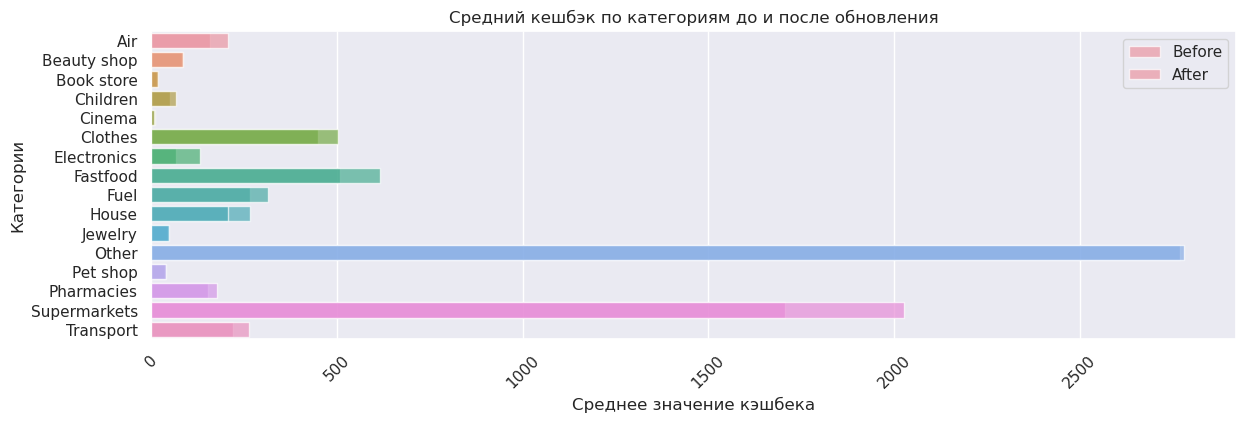

In [73]:
categories = cashback_comparison['Category']
plt.figure(figsize=(14, 4))
sns.barplot(y=categories, x=cashback_comparison['Avg Cashback Before'], label="Before", alpha=0.7, orient='h')
sns.barplot(y=categories, x=cashback_comparison['Avg Cashback After'], label="After", alpha=0.7, orient='h')
plt.xticks(rotation=45)
plt.ylabel("Категории")
plt.title("Средний кешбэк по категориям до и после обновления")
plt.xlabel("Среднее значение кэшбека")
plt.legend()
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
**При более детальном исследовании заметим, что на самом деле в среднем кешбек вырос на большую часть категорий (особенно супермаркеты. фастфуд и другое). Кешбек потерял аудиторию по следующим категориям: кино, дом. Можно сделать вывод, что остальные кешбэки куда предпочтительные и актуальнее этих двух, поэтосу клиенты делают выбор в пользу других категорий**
    
</div>

##### **Распределение**

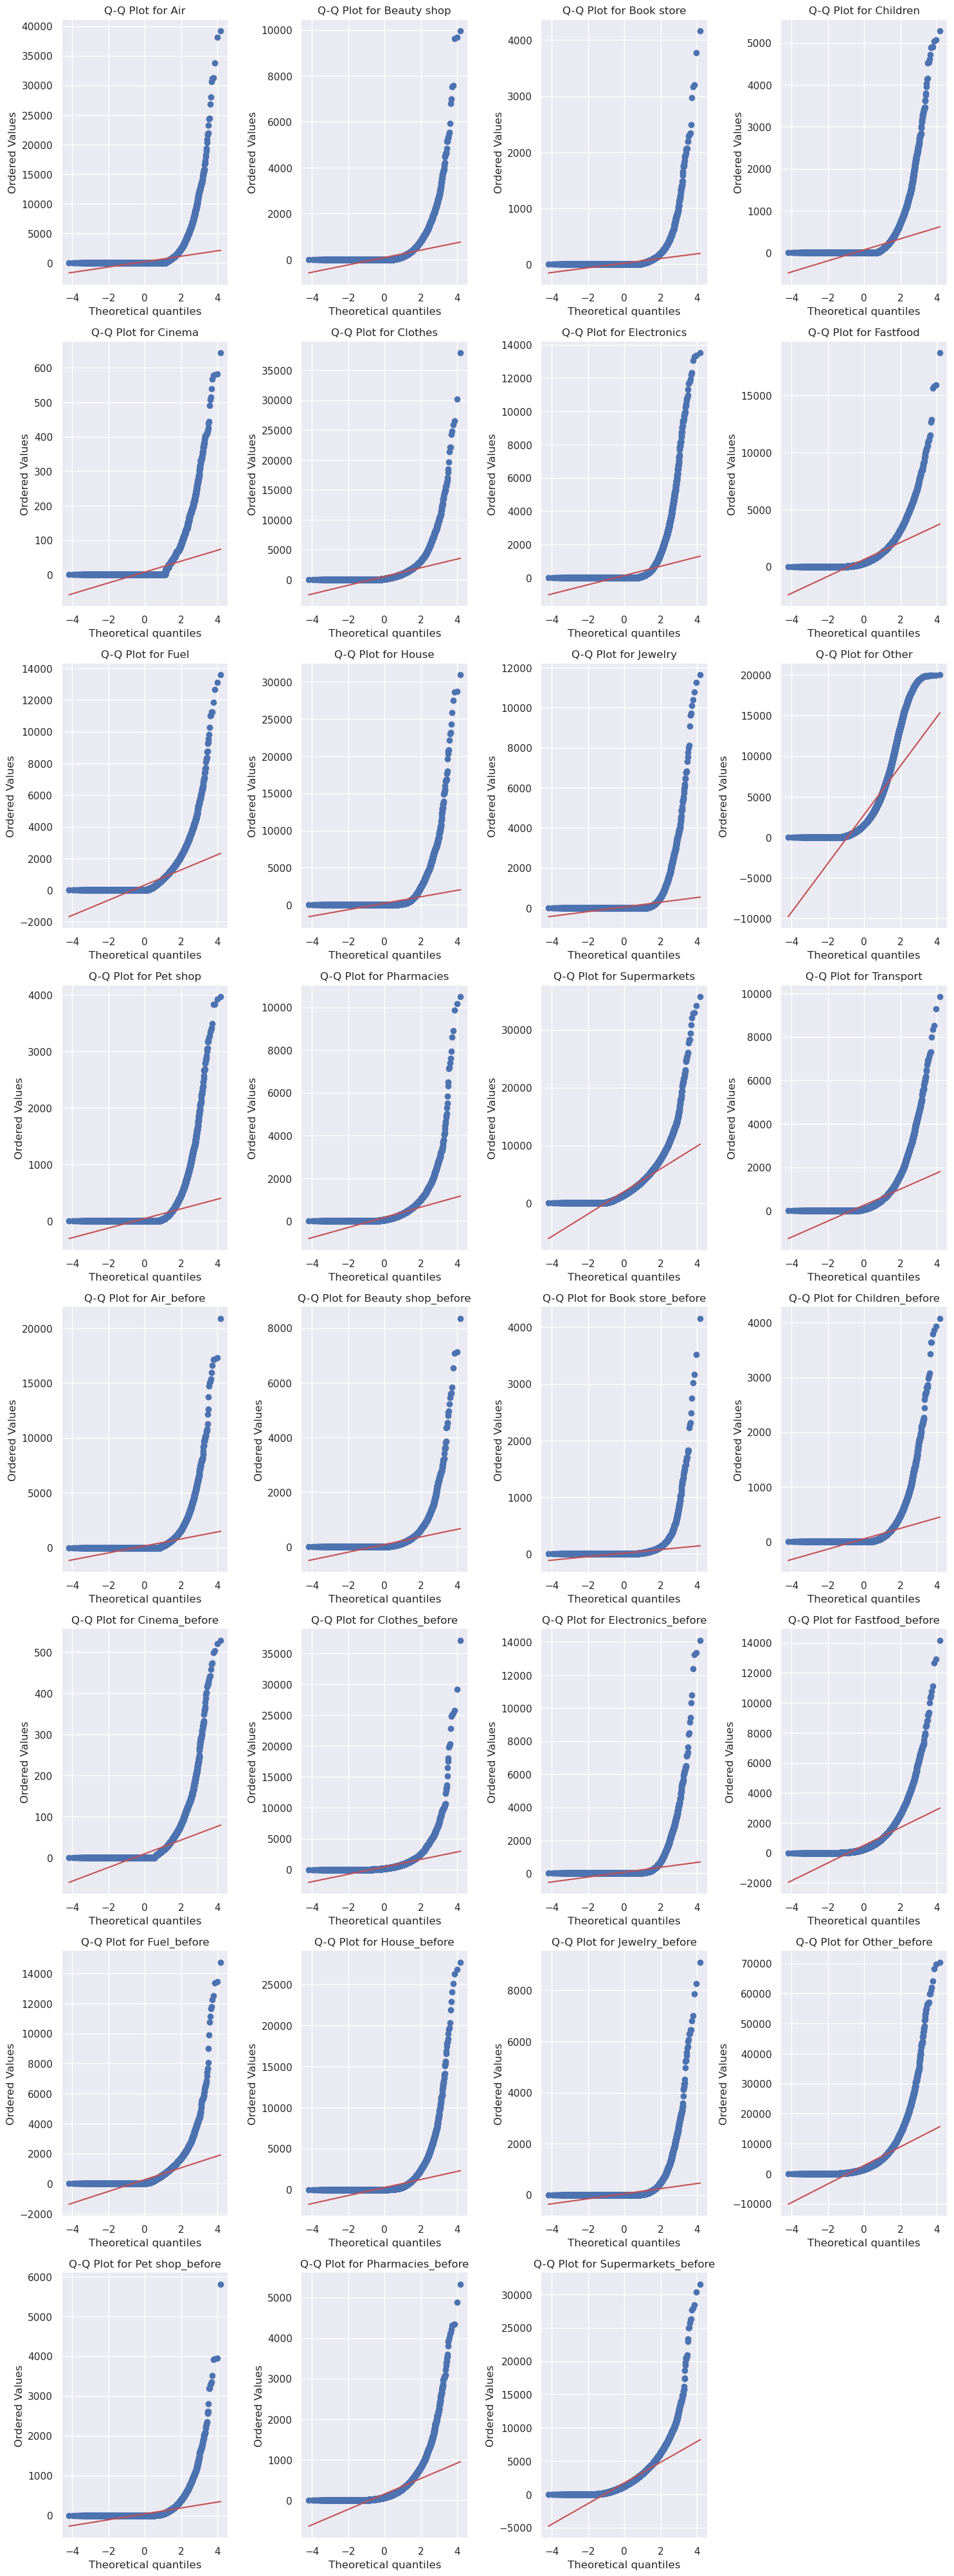

In [74]:
import scipy.stats as stats
cashback_columns = [col for col in df.columns[8:39]]

plt.figure(figsize=(15, 5*32))
for i, column in enumerate(cashback_columns, 1):
    plt.subplot(32, 4, i)
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')

plt.tight_layout()
plt.show()

Заметим, что нулевых значений довольно много в каждой категории. Скорее всего так происходит из-за того, что покупатель выбирает кэшбек, но не пользуется им. Таким образом самые "непопулярные" категории это магазины с товарами для животных, билеты на самолеты, лекарства до изменений. Можно сделать вывод, что, возможно, после обновления по этим категориям кэшбек стал выгоднее и клиенты стали чаще им пользоваться.

По Q-Q plots видно, что распределение не является нормальным и отклонение значений довольно серьезное. Тогда, для определения значимости изменений, по идее, мы должны взять соответствующий тест.

Тест Манна-Уитни мы взять не можем, т.к. для того, чтобы он дал достаточную точность нужно иметь не более 5000 значений, а у нас их 50к :)) Тогда придется подумать как привести наше распределение к нормальному или близко к нормальному.

Преобразовать данные можно разными способами. Посмоторим Логарифмическое преобразование, преобразования вида корня.

<a id='32-преорь-в-норм'></a>
<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
### **3.2 Преобразование в нормальное распределение**
</div>

[Вернуться к содержанию](#задачи)

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

##### ***ЛОГАРИФМИЧЕСКОЕ ПРЕОБРАЗОВАНИЕ***

**Т.к. отрицательных значений нет мы спокойно можем попробовать этот способ. Логарифимическое преобразование имеет место быть, т.к. наши данный в основном имеют сильно положительное скошенное распределение. Поппробуем таким образом уменьшить влияние больших значений на среднее**

In [75]:
#создадим новый датафрейм для логарифмированных значений, чтобы не превратить исходный в кашу
df_log = pd.DataFrame() 

#ищем все столбцы, относящиеся к кешбэку до и после обновления
before_columns = [col for col in df.columns[24:40]]
after_columns = [col for col in df.columns[8:24]]

for before, after in zip(before_columns, after_columns):
    #логарифмическое преобразование с защитой от нулей или отрицательных значений
    df_log[f'log_{before}'] = np.log(df[before].clip(lower=1))
    df_log[f'log_{after}'] = np.log(df[after].clip(lower=1))

df_log.sample(3)

log_Air_before  log_Air  log_Beauty shop_before  log_Beauty shop  \
33288        6.593045      0.0                0.000000         2.833213   
35199        0.000000      0.0                2.079442         0.000000   
40105        0.000000      0.0                0.000000         0.000000   

       log_Book store_before  log_Book store  log_Children_before  \
33288                    0.0        0.000000             0.000000   
35199                    0.0        0.000000             4.442651   
40105                    0.0        2.397895             0.000000   

       log_Children  log_Cinema_before  log_Cinema  ...  log_Other_before  \
33288      0.000000           0.000000    0.000000  ...          7.724888   
35199      5.758902           2.397895    3.465736  ...          8.428143   
40105      0.000000           0.000000    0.000000  ...          5.153292   

       log_Other  log_Pet shop_before  log_Pet shop  log_Pharmacies_before  \
33288   7.396949                  0.0       0.00000               4.418841   
35199   7.103322                  0.0       1.94591               4.934474   
40105   6.643790                  0.0       0.00000               1.386294   

       log_Pharmacies  log_Supermarkets_before  log_Supermarkets  \
33288        5.209486                 7.626083          7.987524   
35199        5.572154                 8.231376          8.086718   
40105        2.708050                 5.777652          6.285998   

       log_Transport_before  log_Transport  
33288              5.857933       6.652863  
35199              5.342334       5.117994  
40105              3.784190       5.262690  

[3 rows x 32 columns]

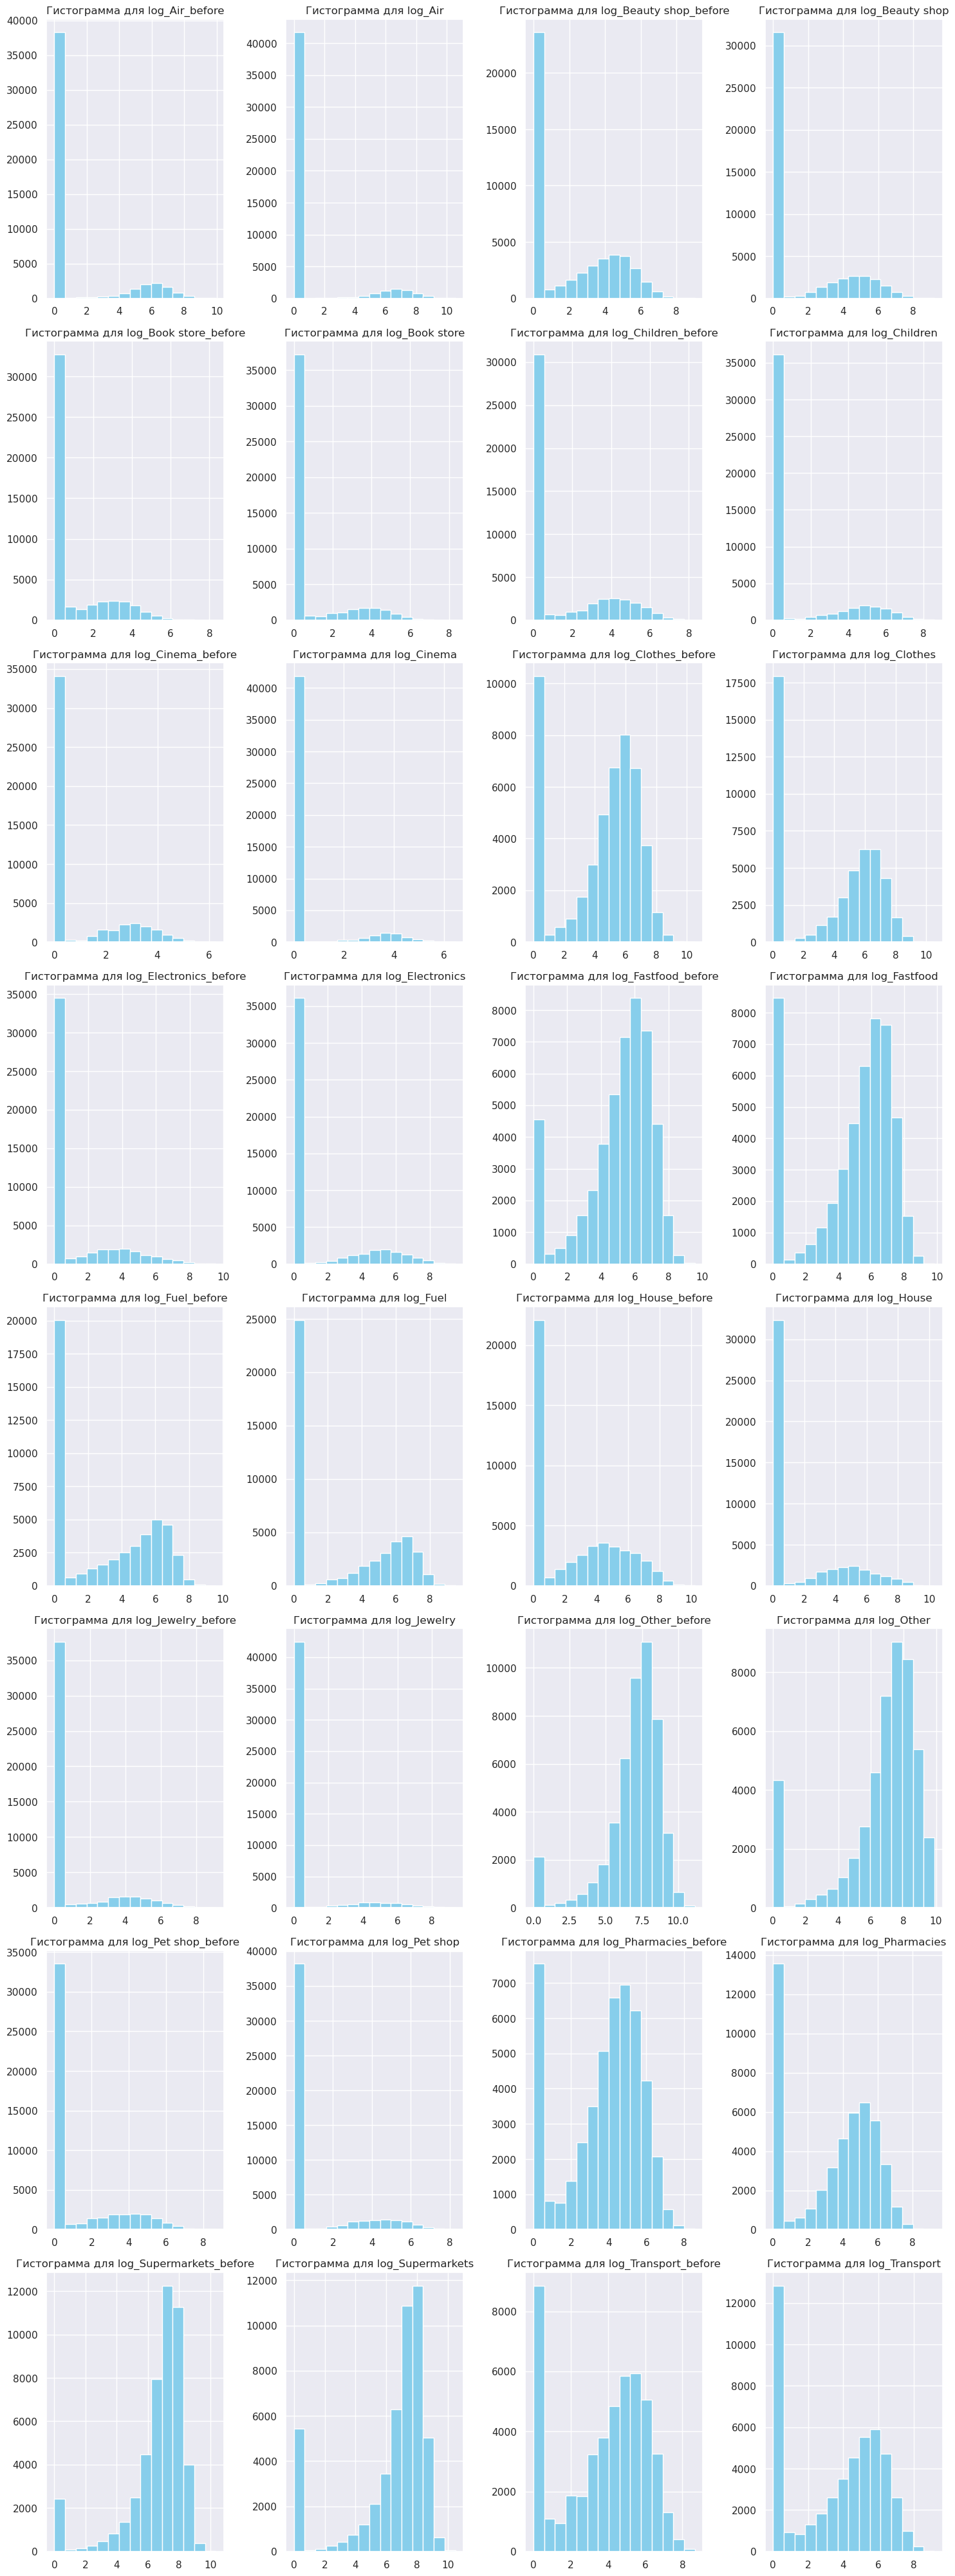

In [76]:
plt.figure(figsize=(15, 5*32))
for i, column_log in enumerate(df_log, 1):
    plt.subplot(32, 4, i)
    plt.hist(df_log[column_log], bins=15, color='skyblue')
    plt.title(f'Гистограмма для {column_log}')

plt.tight_layout()
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
##### ***КОРНЕВОЕ ПРЕОБРАЗОВАНИЕ***

**Корневое преобразование заключается в извлечении корня из данных, что может помочь уменьшить скошенность распределения и уменьшить влияние больших значений. Также используется если данные имеют высокую положительную скошенность и помогает привести данные к более нормальному виду**

In [77]:
#создадим новый датафрейм для преобразованных значений, чтобы не превратить исходный в кашу
df_sqrt = pd.DataFrame() 

#ищем все столбцы, относящиеся к кешбэку до и после обновления
before_columns = [col for col in df.columns[24:40:]]
after_columns = [col for col in df.columns[8:24:]]

for before, after in zip(before_columns, after_columns):
    #корневое преобразование с защитой от нулей или отрицательных значений
    df_sqrt[f'sqrt_{before}'] = np.sqrt(df[before].clip(lower=1))
    df_sqrt[f'sqrt_{after}'] = np.sqrt(df[after].clip(lower=1))

df_sqrt.sample(3)

sqrt_Air_before  sqrt_Air  sqrt_Beauty shop_before  sqrt_Beauty shop  \
11735              1.0       1.0                 1.000000         11.532563   
11866              1.0       1.0                16.093477         22.338308   
12931              1.0       1.0                 4.582576          1.000000   

       sqrt_Book store_before  sqrt_Book store  sqrt_Children_before  \
11735                1.732051         3.000000              1.000000   
11866                1.000000         4.358899              1.000000   
12931                1.000000         1.000000              6.164414   

       sqrt_Children  sqrt_Cinema_before  sqrt_Cinema  ...  sqrt_Other_before  \
11735            1.0            1.000000          1.0  ...          31.575307   
11866            1.0            1.000000          1.0  ...          42.836900   
12931            1.0            4.123106          1.0  ...          22.847319   

       sqrt_Other  sqrt_Pet shop_before  sqrt_Pet shop  \
11735   41.737274              1.000000            1.0   
11866   45.902070              1.000000            1.0   
12931   14.933185              4.582576            1.0   

       sqrt_Pharmacies_before  sqrt_Pharmacies  sqrt_Supermarkets_before  \
11735                7.681146        12.649111                 34.452866   
11866               17.175564         7.141428                 56.542020   
12931               12.922848         3.162278                 18.493242   

       sqrt_Supermarkets  sqrt_Transport_before  sqrt_Transport  
11735          41.916584              26.400758       36.606010  
11866          62.785349               5.477226        7.615773  
12931          16.643317              25.059928       19.287302  

[3 rows x 32 columns]

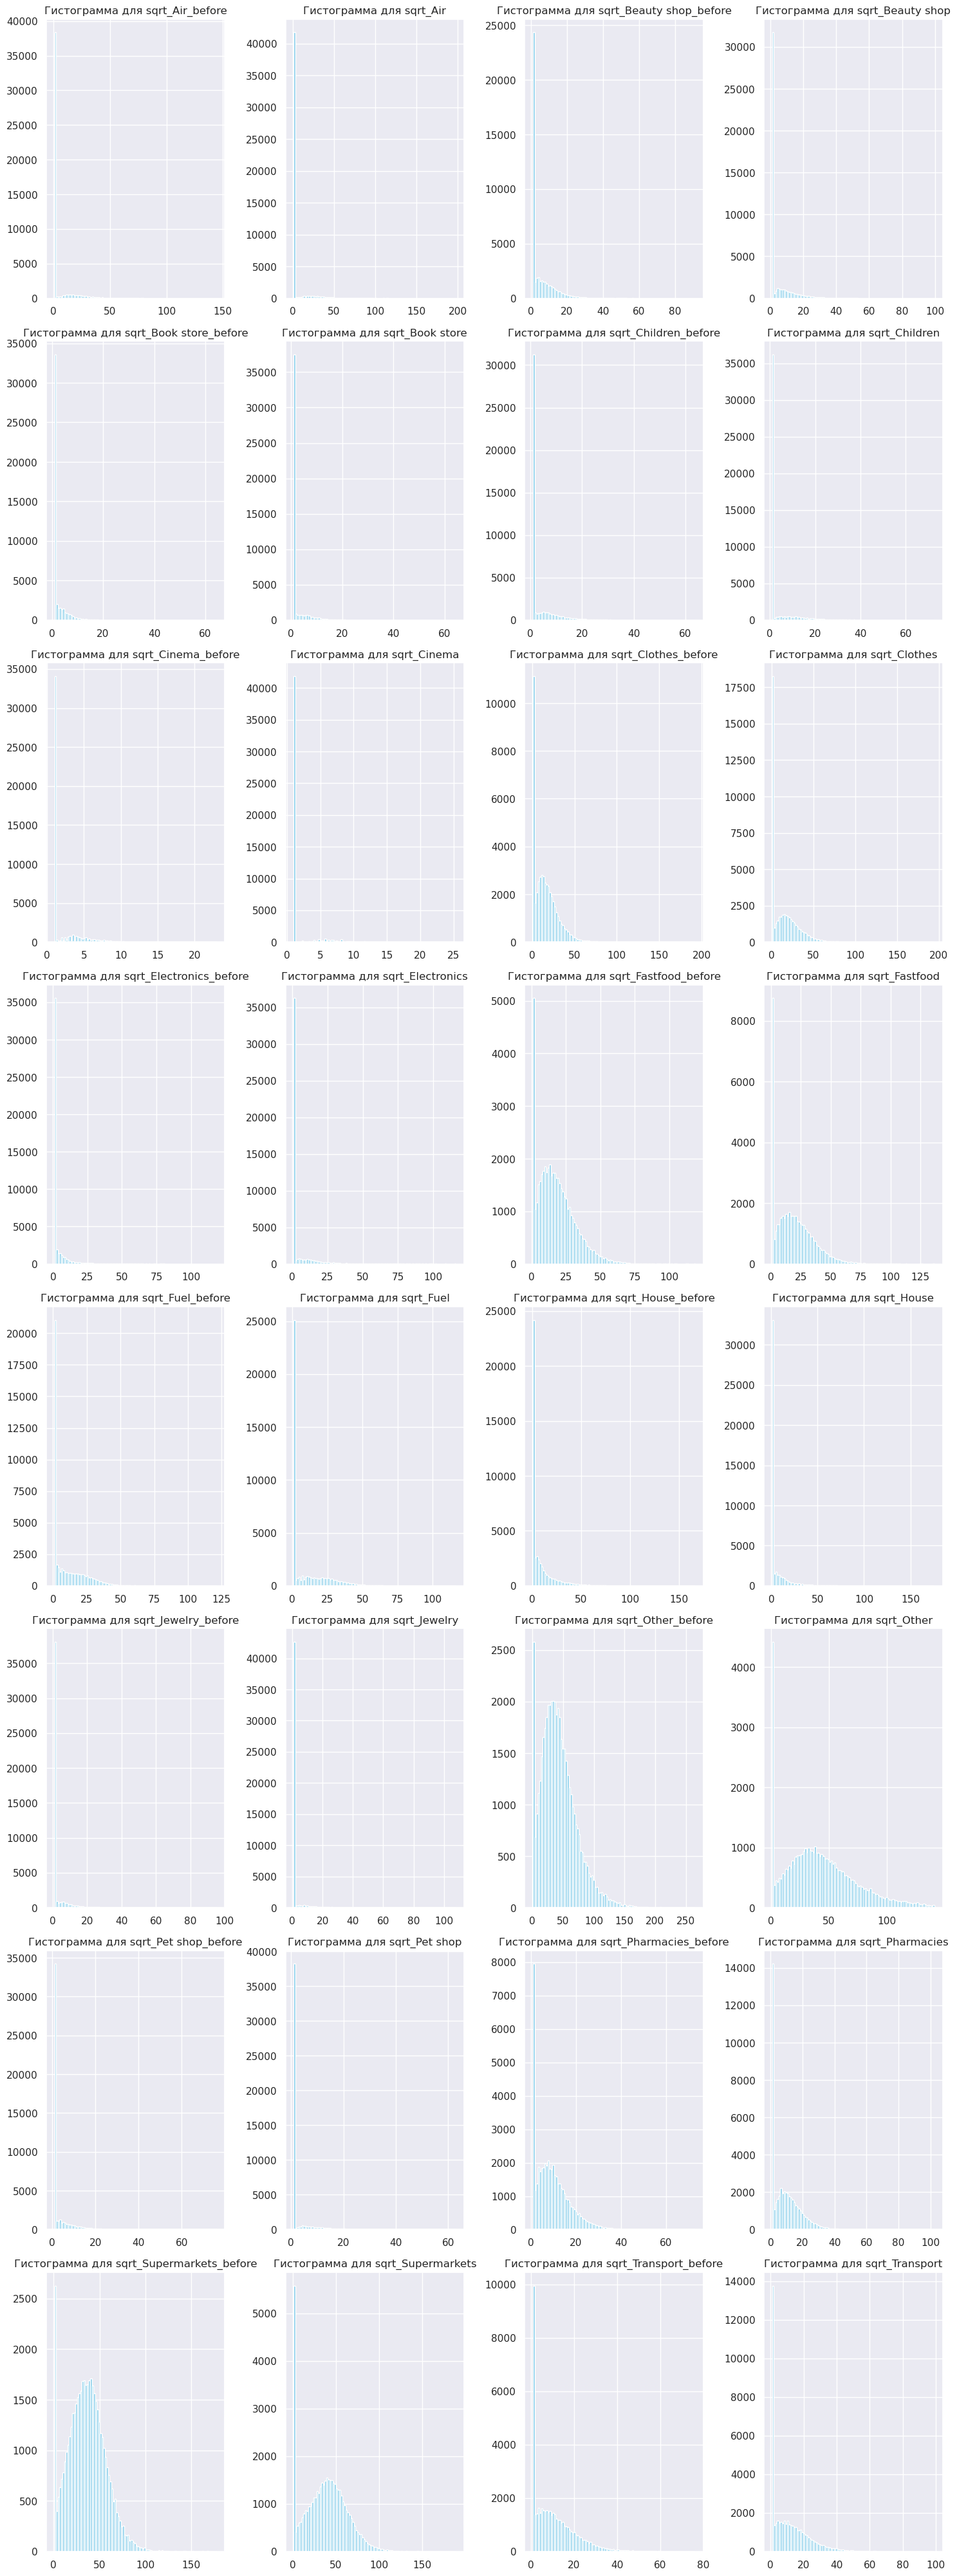

In [78]:
plt.figure(figsize=(15, 5*32))
for i, column_sqrt in enumerate(df_sqrt, 1):
    plt.subplot(32, 4, i)
    plt.hist(df_sqrt[column_sqrt], bins=100, color='skyblue')
    plt.title(f'Гистограмма для {column_sqrt}')

plt.tight_layout()
plt.show()

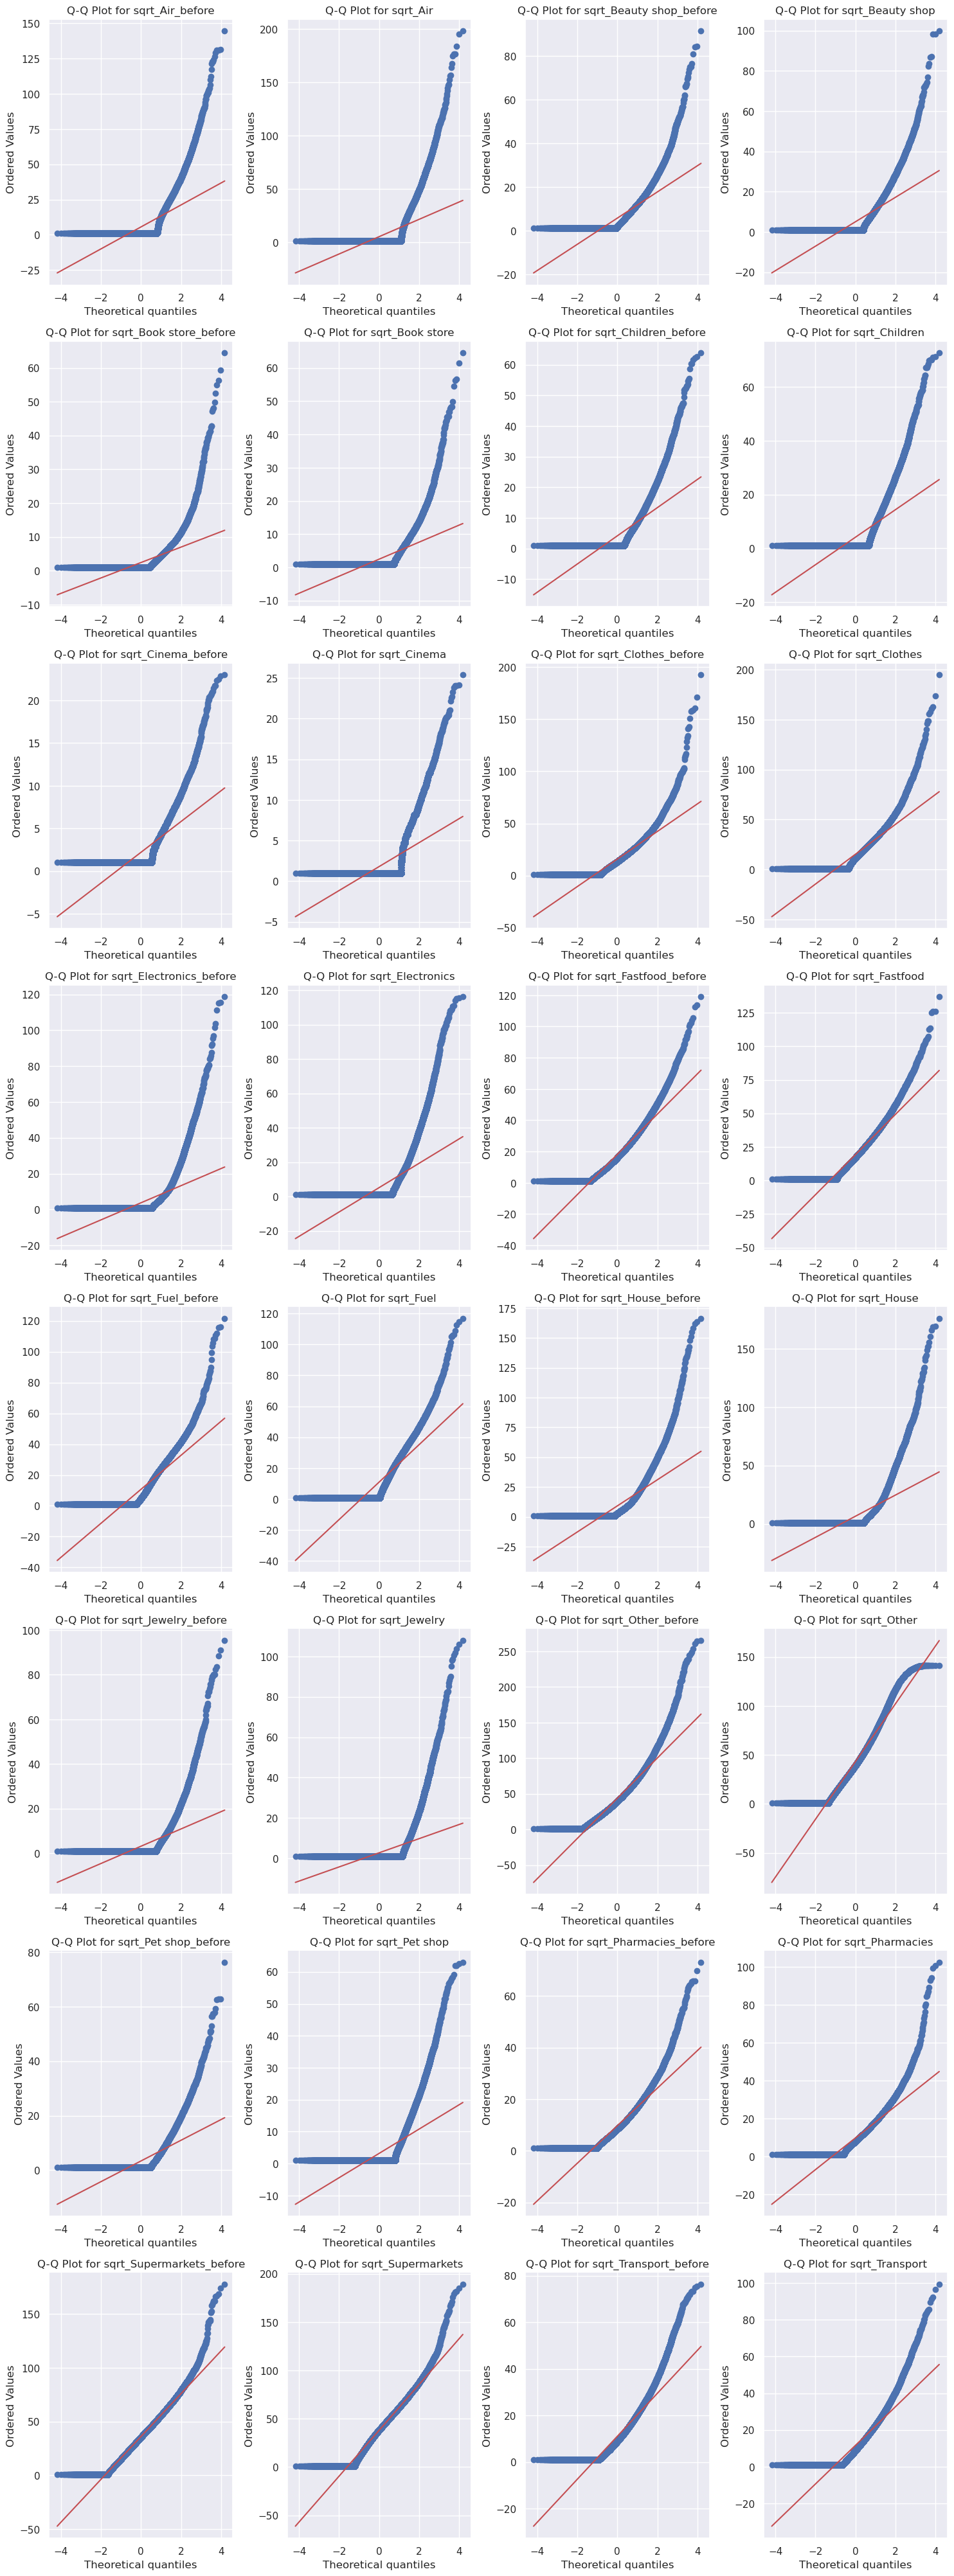

In [79]:
cashback_columns = [col for col in df_sqrt.columns]

plt.figure(figsize=(15, 5*32))
for i, column_sqrt in enumerate(cashback_columns, 1):
    plt.subplot(32, 4, i)
    stats.probplot(df_sqrt[column_sqrt].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column_sqrt}')

plt.tight_layout()
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
***ПРЕДВАРИТЕЛЬНЫЙ ВЫВОД ПО ПРЕОБРАЗОВАНИЮ***

**Логарифмическое преобразование сразу не не дало желаемых результатов. В прочем, как и корневное преобразование, что видно после построения гистограмм и Q-Q плота, можно смело откидывать эти способы**

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
##### **Поискав иные способы преобразования нашелся метод Yeo-Johnson.**

**Данный метод работает с любыми значениями (как положительными, так и отрицательными). Этот метод является расширением Box-Cox преобразования (В целом, можно было взять и Бокс-Кокса преобразование, т.к. у нас удалены отрицательные значения) Yeo-Johnson преобразование использует параметр, называемый λ (лямбда), для управления степенью изменения формы распределения. Значение λ подбирается так, чтобы трансформированные данные были как можно ближе к нормальному распределению. Самый его главный плюс - устойчивость к выбросам и автоматическая оптимизация.**

**НО данный метод плохо работает с данными с множеством нулей, но мы все равно его попробуем**

In [80]:
from sklearn.preprocessing import PowerTransformer

#создание экземпляра PowerTransformer для Yeo-Johnson
transformer_yj = PowerTransformer(method='yeo-johnson')

df_yj = pd.DataFrame()

before_columns = [col for col in df.columns[24:40]]
after_columns = [col for col in df.columns[8:24]]

for before, after in zip(before_columns, after_columns):
    transformed_column = transformer_yj.fit_transform((df[[before]])+1)  #преобразуем текущий столбец
    df_yj[f'yj_{before}'] = transformed_column.flatten()            #добавляем результат в новый датафрейм 
    transformed_column = transformer_yj.fit_transform((df[[after]])+1)  
    df_yj[f'yj_{after}'] = transformed_column.flatten()

df_yj.sample(5)

yj_Air_before    yj_Air  yj_Beauty shop_before  yj_Beauty shop  \
7991       -0.512612 -0.399222               1.228906        1.510399   
24842      -0.512612 -0.399222              -0.956922       -0.718793   
40516       1.928802 -0.399222               1.354825        1.334649   
40116       2.002718 -0.399222              -0.956922        1.568203   
48172      -0.512612 -0.399222              -0.956922       -0.718793   

       yj_Book store_before  yj_Book store  yj_Children_before  yj_Children  \
7991               1.260757       1.926375            1.336310    -0.578864   
24842              0.756002      -0.547405           -0.737722    -0.578864   
40516             -0.699366      -0.547405           -0.737722    -0.578864   
40116              1.556368      -0.547405           -0.737722    -0.578864   
48172             -0.699366      -0.547405           -0.737722    -0.578864   

       yj_Cinema_before  yj_Cinema  ...  yj_Other_before  yj_Other  \
7991           1.547564   2.548081  ...         0.556203  0.154067   
24842         -0.643533  -0.394107  ...        -0.908943 -0.076866   
40516         -0.643533  -0.394107  ...        -0.450823  0.273691   
40116         -0.643533  -0.394107  ...         0.630080  0.207946   
48172         -0.643533  -0.394107  ...        -0.244231 -1.449710   

       yj_Pet shop_before  yj_Pet shop  yj_Pharmacies_before  yj_Pharmacies  \
7991             1.736110     2.016071              1.201867       0.050491   
24842           -0.656530     1.858149              0.048459      -0.609491   
40516           -0.656530    -0.514985              2.819526       1.267861   
40116            1.758742     2.020805              0.720238       0.424541   
48172           -0.656530    -0.514985             -0.521036      -1.326180   

       yj_Supermarkets_before  yj_Supermarkets  yj_Transport_before  \
7991                 0.529031         0.249429             1.143669   
24842                0.040773        -0.190960             0.362448   
40516                0.109703        -0.642915            -0.264768   
40116                0.267842         0.607243             1.310736   
48172               -1.117897        -1.177677            -1.503922   

       yj_Transport  
7991       0.882842  
24842      0.057672  
40516     -0.808439  
40116      1.294404  
48172     -1.329767  

[5 rows x 32 columns]

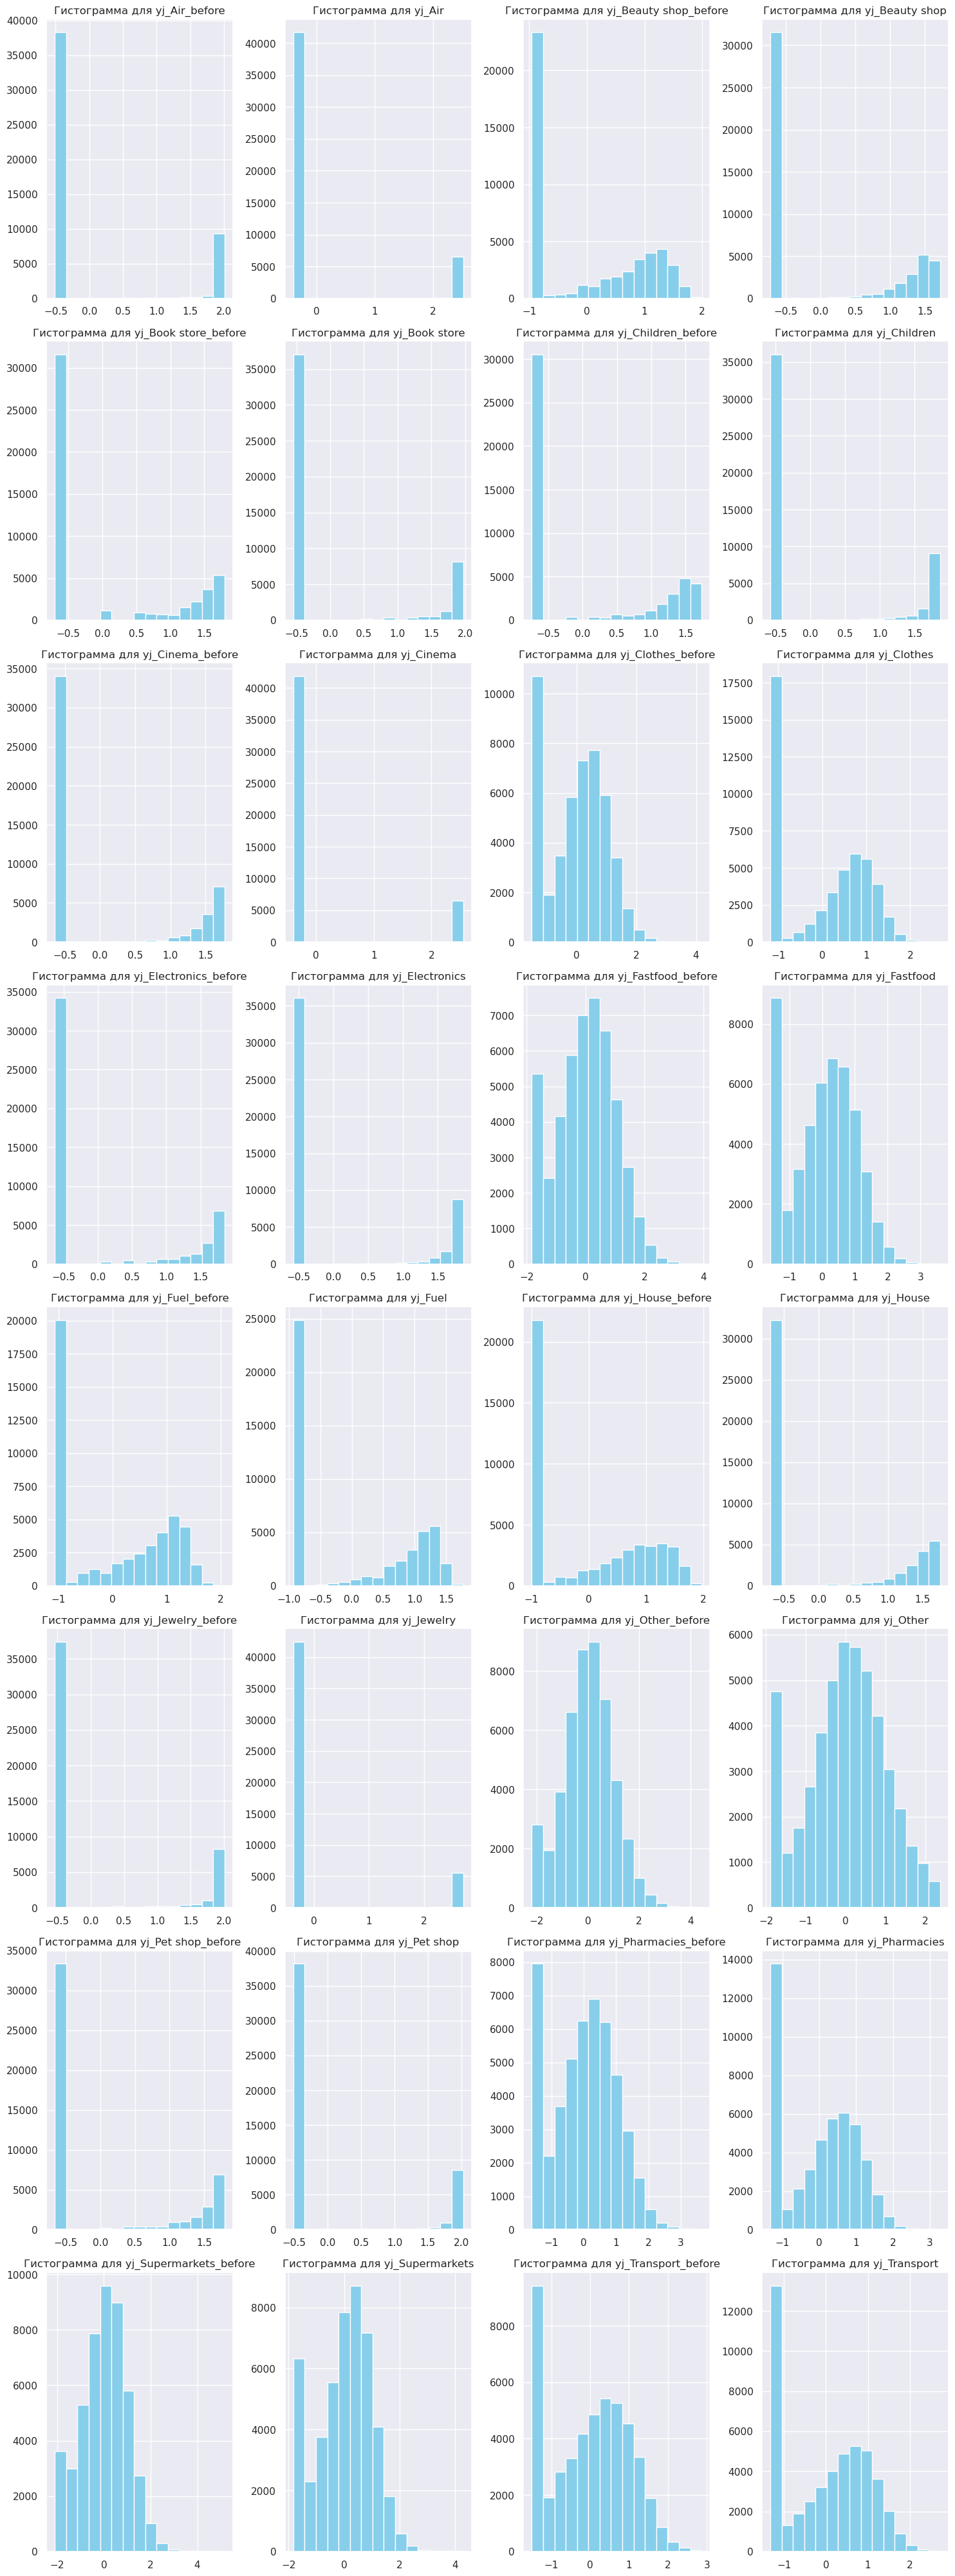

In [81]:
plt.figure(figsize=(15, 5*32))
for i, column_yj in enumerate(df_yj, 1):
    plt.subplot(32, 4, i)
    plt.hist(df_yj[column_yj], bins=15, color='skyblue')
    plt.title(f'Гистограмма для {column_yj}')

plt.tight_layout()
plt.show()

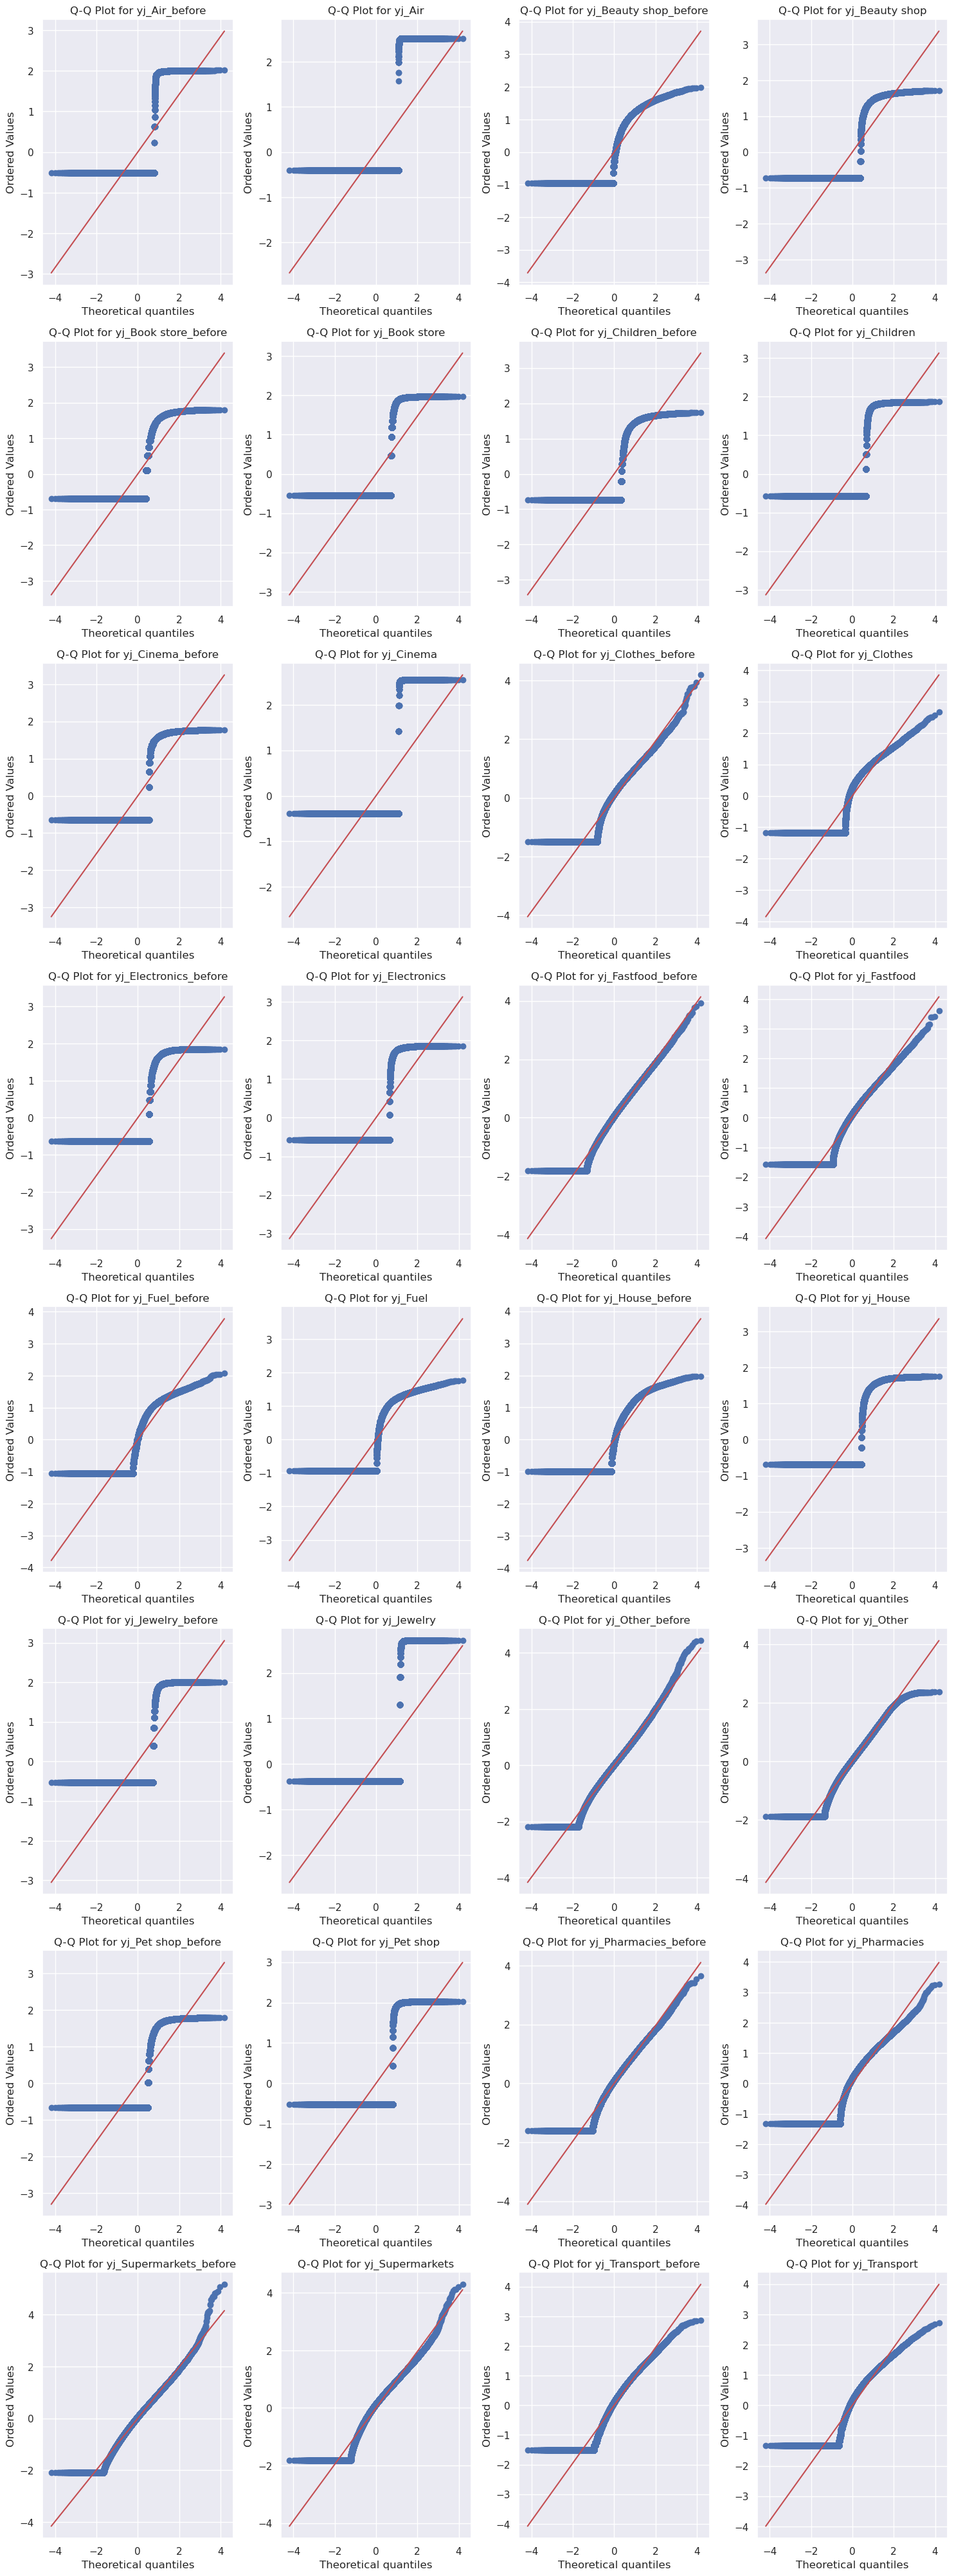

In [82]:
plt.figure(figsize=(15, 5*32))
for i, column_yj in enumerate(df_yj.columns, 1):
    plt.subplot(32, 4, i)
    stats.probplot(df_yj[column_yj].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column_yj}')

plt.tight_layout()
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
##### ***ВЫВОД ПО ПРЕОБРАЗОВАНИЯМ***

**Метод Yeo-Johnson также не привел к нужному состоянию, но выглядит немного лучше логарифмирования и взятия корня. Некоторые ку-ку плоты выглядят очень неплохо, но значения, которые изначально равны 0, как и ожидалось, подпортили нам распределение.**

**Нулевые значения удалять и преобразовывать будет нелогичным. Скорее всего нулевые значения возникают при выборе категории пользователем, когда она остается неиспользованной (например, был выбран кэшбек на авиабилеты (тут могла быть реклама Aviasales, но нам не заплатили), но клиент банка в этом месяце никуда не летал и билет не покупал, соответственно получил 0 за эту категорию). Тогда будем искать другой способ, который наконец-то даcт нам возможность провести t-тест.**

<a id='33-бутстрап'></a>
<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
### **3.3 Бутстрапирование**
</div>

[Вернуться к содержанию](#задачи)

**В данном методе можно использовать выборочное среднее и построить доверительный интервал для среднего на основе распределения выборочных средних. Он подходит для данных любого распределения, в том числе с нулями. То что нам нужно!**

План на построение следующий:
 - Создаем выборку с возвращением, т.е. выбираем подмножество данных из исходного датафрейма случайным образом. Сделаем 1000 повторений
 - Рассчитаем среднее для бутстрап-выборок
 - Построим распределение выборочных средних
 - Определим доверительный интвервал с заданной уверенностью (берем 95%)
 - Сравнить доверительный интервалы категорий до и после обновления, если они не перекрываются (диапазоны не имеют общих значений), это указывает на статистически значимое изменение. Если перекрываются, изменения могут быть незначительными.
 - Поставим гипотезы:
   
   Н0: Различие кэшбека по категориям до и после обновления незначительно;
   Н1: Различие кэшбека по категориям до и после обновления значительно 

In [83]:
n_iterations = 1000  #количество повторений
sample_size = len(df)

categories = [col.split('_before')[0] for col in df.columns[8:40] if '_before' in col]

results = []

#собираем нужные вещи по каждой категории
for category in categories:
    #получаем данные для текущей категории
    before_df = df[f'{category}_before'].dropna()
    after_df = df[f'{category}'].dropna()

    #делаем бутстрап-выборки и расчет средних
    boot_means_before = [np.mean(np.random.choice(before_df, size=sample_size, replace=True)) for _ in range(n_iterations)]
    boot_means_after = [np.mean(np.random.choice(after_df, size=sample_size, replace=True)) for _ in range(n_iterations)]

    #вычисляем доверительные интервалы (95%)
    ci_before = (np.percentile(boot_means_before, 2.5), np.percentile(boot_means_before, 97.5))
    ci_after = (np.percentile(boot_means_after, 2.5), np.percentile(boot_means_after, 97.5))

    #делаем столбцы, содержащие все выбранные средние значения по каждой категории, они понадобятся для построения графиков    
    before_means = [np.mean(np.random.choice(before_df, size=len(before_df), replace=True)) for _ in range(n_iterations)]
    after_means = [np.mean(np.random.choice(after_df, size=len(after_df), replace=True)) for _ in range(n_iterations)]

    #добавляем результаты в список
    results.append({
        'Категория': category,
        'Ср. знач. до': np.mean(before_df),
        'Ср. знач. после': np.mean(after_df),
        '95% дов.интервал до': ci_before,         #доверительные интервалы
        '95% дов.интервал после': ci_after,
        'Буст ср.знач. до': np.mean(boot_means_before),
        'Буст ср.знач. после': np.mean(boot_means_after),
        'Выбранные значения до': before_means,
        'Выбранные значения после': after_means
    })

#cоздаем датафрейм из результатов и смотрим что мы тут наколдовали
bootstrap_df = pd.DataFrame(results)
bootstrap_df['Разница'] = bootstrap_df['Буст ср.знач. после']-bootstrap_df['Буст ср.знач. до']
bootstrap_df


Категория  Ср. знач. до  Ср. знач. после  \
0            Air    157.546148       206.097239   
1    Beauty shop     82.849654        86.905222   
2     Book store     15.431434        19.899473   
3       Children     51.568979        67.417454   
4         Cinema      9.635508         7.819791   
5        Clothes    450.590735       503.114942   
6    Electronics     66.548857       132.559963   
7       Fastfood    508.347947       617.263468   
8           Fuel    267.436811       314.831207   
9          House    266.284852       207.842622   
10       Jewelry     45.087064        48.543088   
11         Other   2770.621342      2781.005005   
12      Pet shop     37.841361        41.327887   
13    Pharmacies    153.038548       176.465123   
14  Supermarkets   1706.040926      2026.288347   
15     Transport    219.531052       264.628684   

                         95% дов.интервал до  \
0     (151.7878507910247, 163.3914455588874)   
1     (80.89045290042395, 84.78618033295419)   
2    (14.765895460655567, 16.07132768069486)   
3      (50.08574087478027, 52.9941319408541)   
4       (9.4112878709544, 9.892916451245993)   
5      (442.97522800124085, 458.33680591459)   
6     (63.53646365422397, 69.55055061524145)   
7    (502.05353117567984, 515.4327809947265)   
8     (262.5399467480095, 272.1101814703753)   
9   (258.54523058628894, 274.40150139592595)   
10   (43.18121083652156, 47.242696205149414)   
11   (2735.541207734464, 2803.4448805707784)   
12     (36.63823596318891, 39.1773896184469)   
13   (150.75850584220868, 155.1869279288595)   
14  (1690.9918307310516, 1721.5060562506462)   
15   (216.23126408851203, 223.1509755971461)   

                      95% дов.интервал после  Буст ср.знач. до  \
0    (196.26114414228104, 215.2641097094406)        157.497313   
1     (84.58561834350118, 89.42064264295315)         82.805550   
2       (19.1000599731155, 20.6817045807052)         15.417717   
3     (65.14629562609865, 69.57723399855237)         51.565215   
4     (7.571549477820287, 8.097553510495295)          9.644108   
5    (493.81460448764346, 512.4708561679247)        450.634282   
6    (127.4885415158722, 137.65048857408746)         66.498561   
7      (608.912734463861, 625.1382933512564)        508.474775   
8     (309.2001773342984, 320.6563225105987)        267.383305   
9     (199.77504549684625, 216.080801881915)        266.254638   
10    (45.65053510495295, 51.48821424878503)         45.130179   
11   (2749.817451659601, 2812.6264021300794)       2770.156168   
12    (39.79630700031021, 42.77989556405749)         37.887208   
13  (173.69857098542033, 179.27784768896703)        153.017490   
14  (2007.0836128631993, 2046.6586790404301)       1706.173098   
15   (260.40550822045293, 269.1582395822562)        219.601605   

    Буст ср.знач. после                              Выбранные значения до  \
0            205.980097  [157.95679867645538, 157.00854099886257, 153.7...   
1             86.891958  [83.4810257470789, 82.82897321890187, 83.04111...   
2             19.885868  [15.530120980250233, 14.93657326026264, 16.100...   
3             67.371603  [51.28549271016441, 50.95663323337814, 51.6528...   
4              7.828593  [9.529603970633854, 9.681873642849757, 9.57334...   
5            503.220448  [444.579733223038, 445.0485575431703, 454.8609...   
6            132.614399  [65.67271223244752, 66.68075690207837, 68.1830...   
7            617.323128  [504.6301106400579, 504.5002791851928, 507.908...   
8            314.970897  [266.35566125529937, 269.7804570365009, 264.14...   
9            207.917837  [266.5435425498914, 269.2500878916348, 264.338...   
10            48.603525  [43.63395719160376, 45.60512873539448, 42.5176...   
11          2780.926691  [2772.081315272464, 2780.6309792162133, 2755.9...   
12            41.300075  [37.05771895357254, 37.691903629407506, 39.398...   
13           176.445181  [150.89529521249096, 152.7213731775411, 153.75...   
14          2026.762527  [170

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
***ВЫВОД ПО БУТСТРАПИРОВАНИЮ***

- Разница между буст средними значениями более точная метрика для оценки эффекта обновления, так как эти значения учитывают изменчивость данных. Но они не сильно отличаются от изначальных средних. Вывод о разнице средних значий до и после обновления был сделан выше. В целом, обновление дало положительный эффект
- Изучив доверительные интервалы заметим, что они перекрываются по категориям: кино, бьюти сфера, товары для дома, магазин для питомцев. Для них мы принимем нулевую гипотезу о незначимости обновления. Для остальных категорий - отвергаем

**С помощью графиков посмотрим на нормальность распределения. Построим графики до и после обновления по категориям параллельно для наглядности**

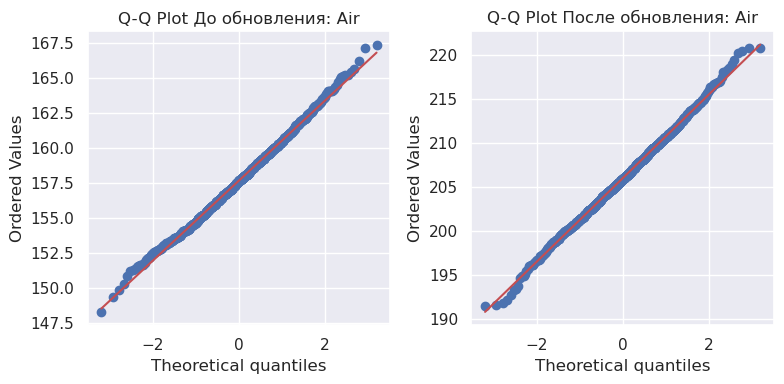

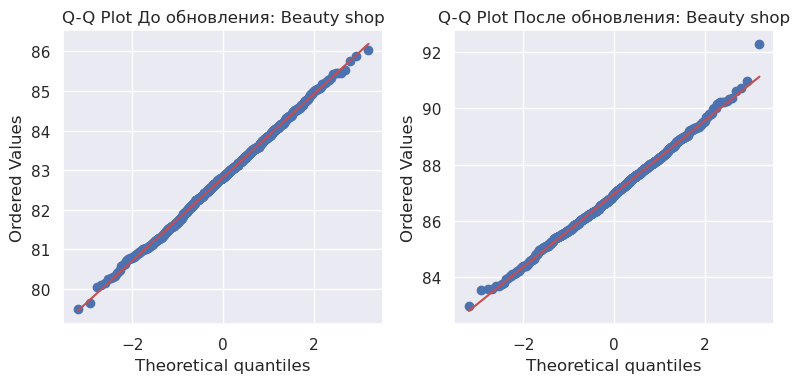

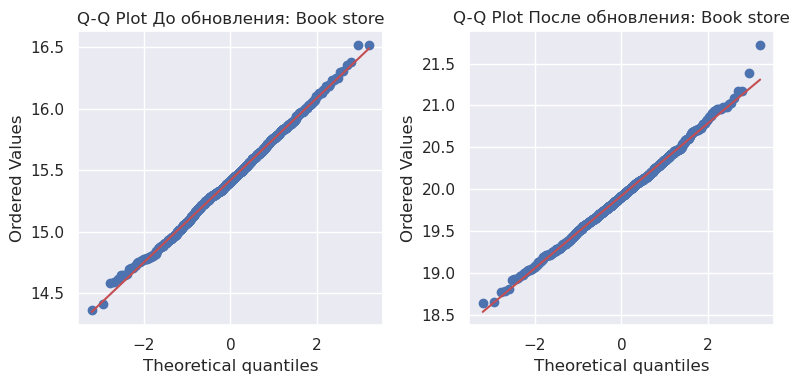

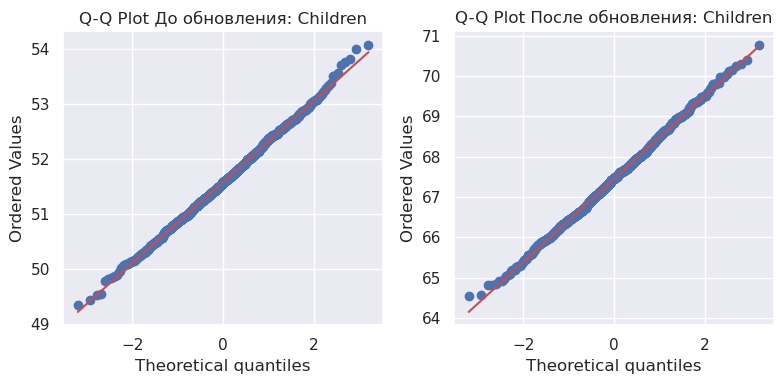

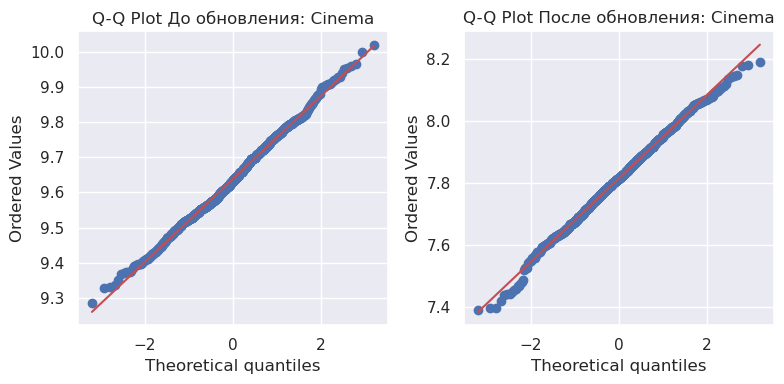

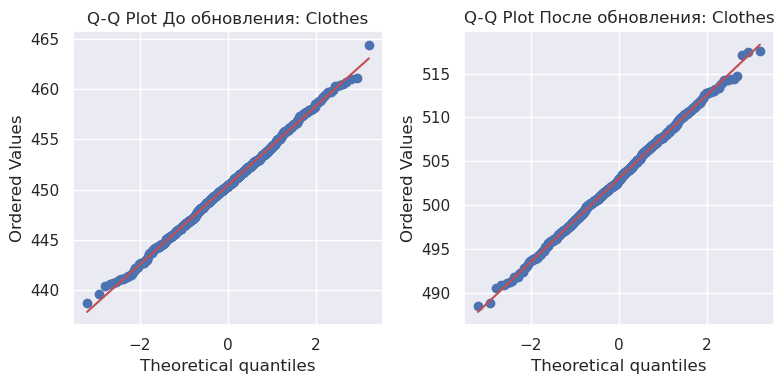

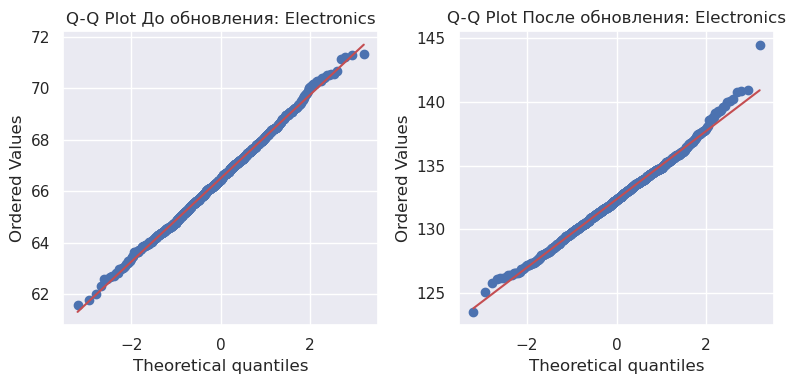

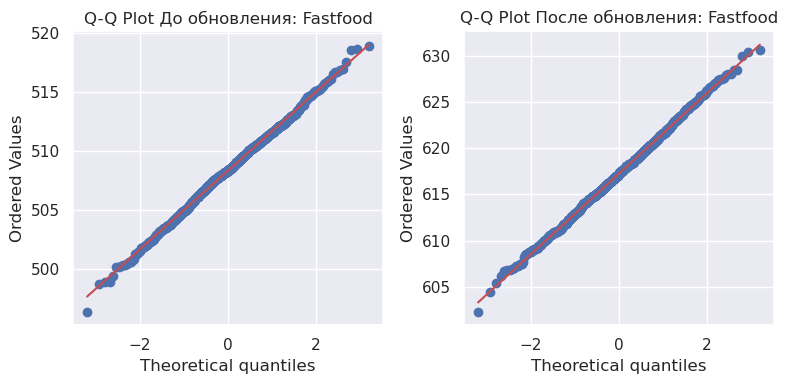

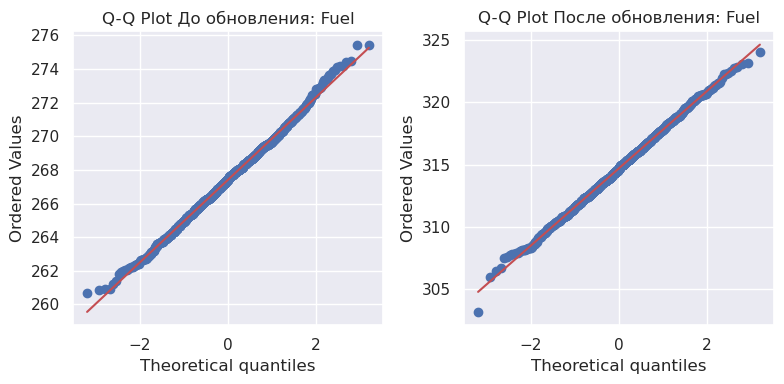

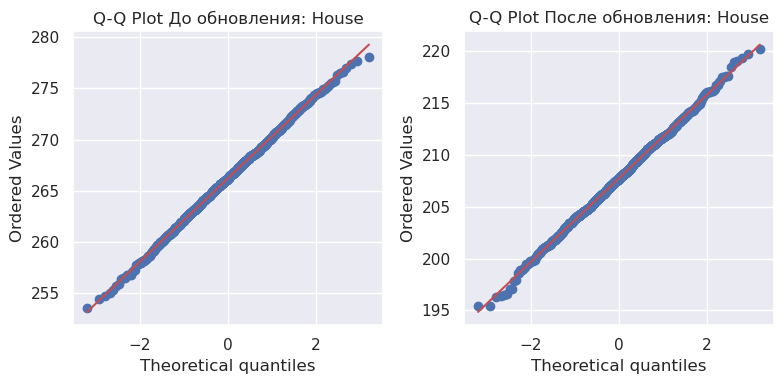

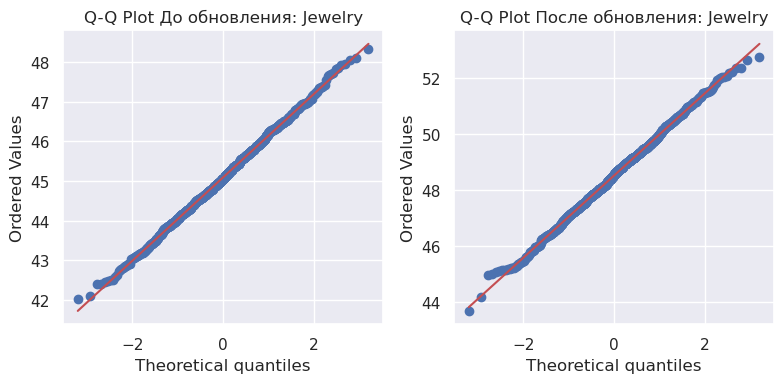

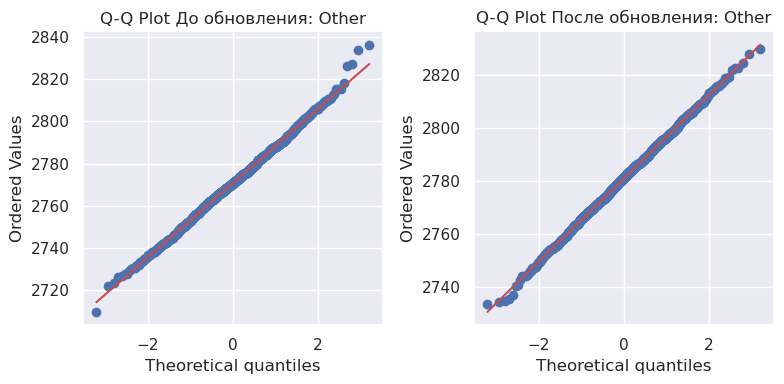

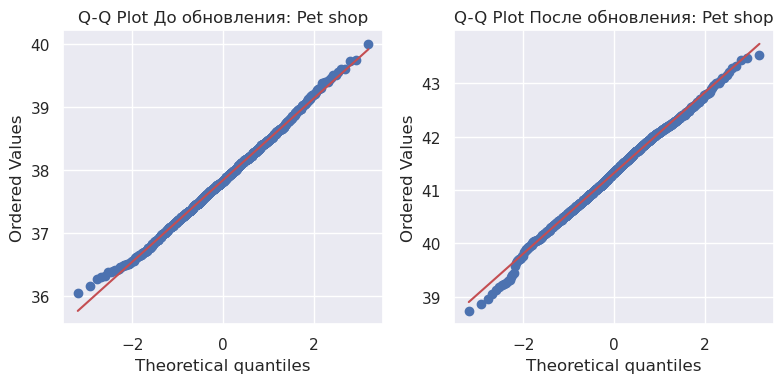

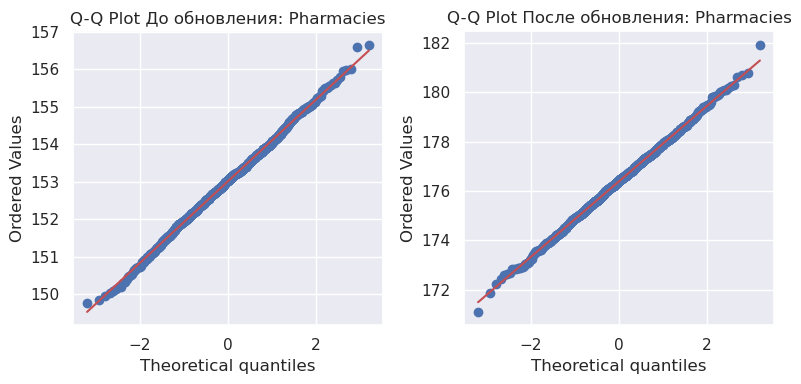

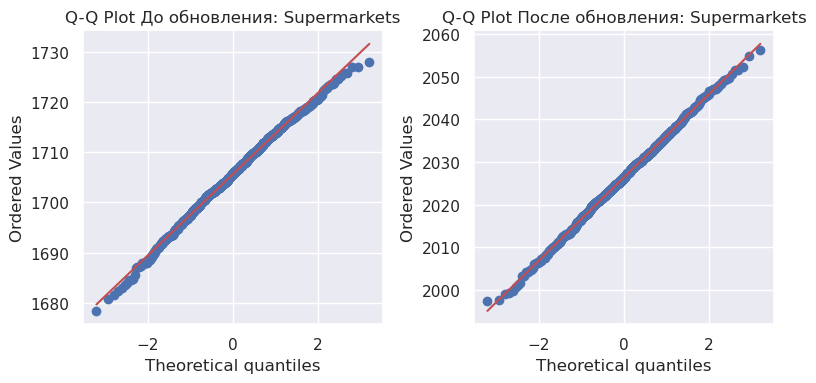

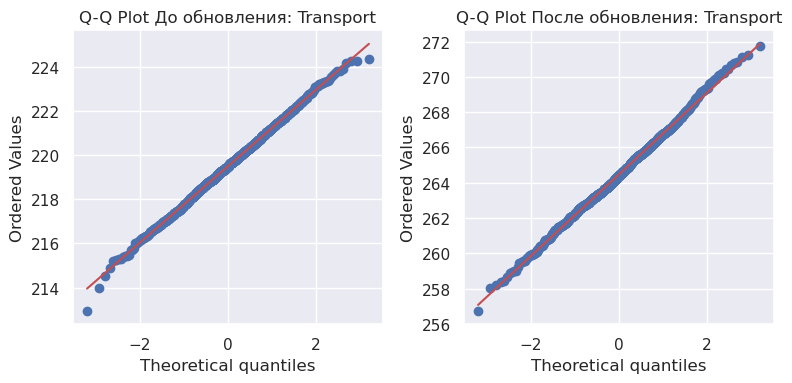

In [84]:
for i, column_boot in bootstrap_df.iterrows():
    category = column_boot['Категория']
    before_means = column_boot['Выбранные значения до']
    after_means = column_boot['Выбранные значения после']

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    stats.probplot(before_means, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot До обновления: {category}")

    plt.subplot(1, 2, 2)
    stats.probplot(after_means, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot После обновления: {category}")

    plt.tight_layout()
    plt.show()


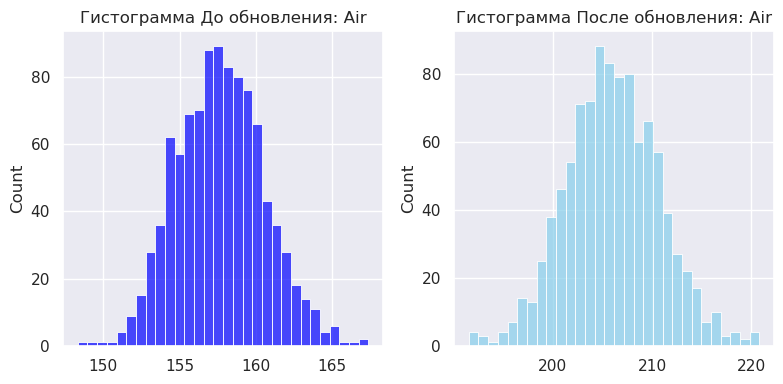

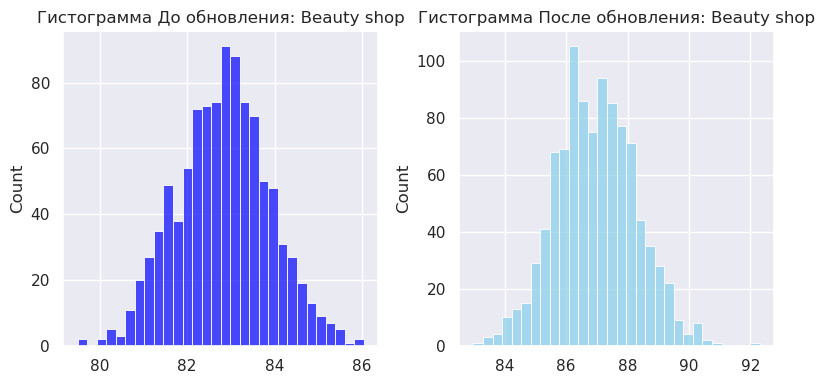

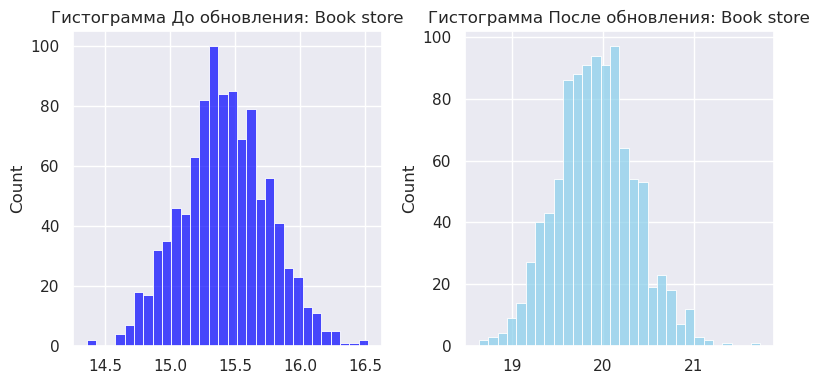

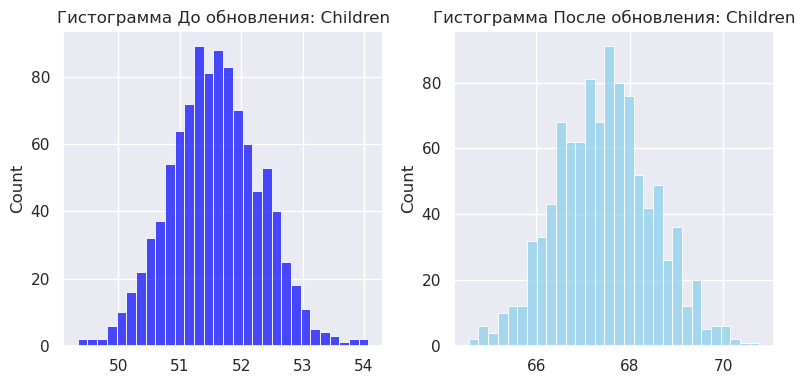

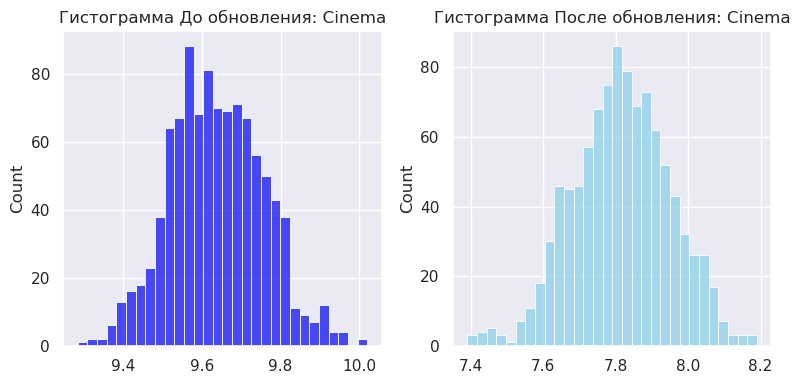

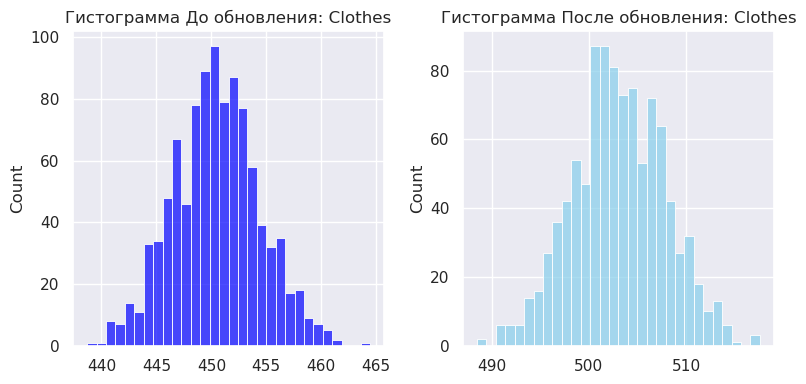

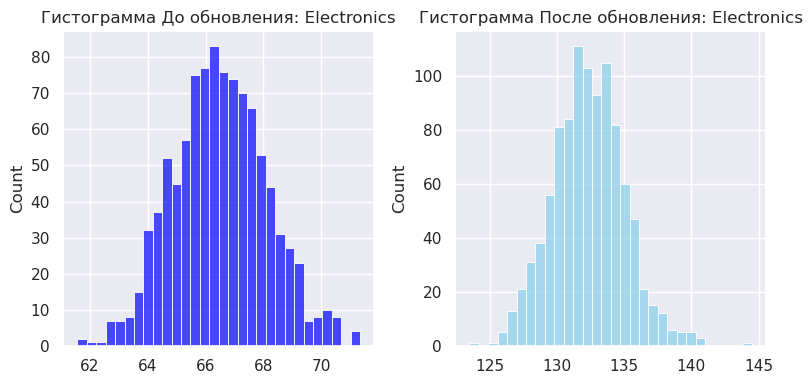

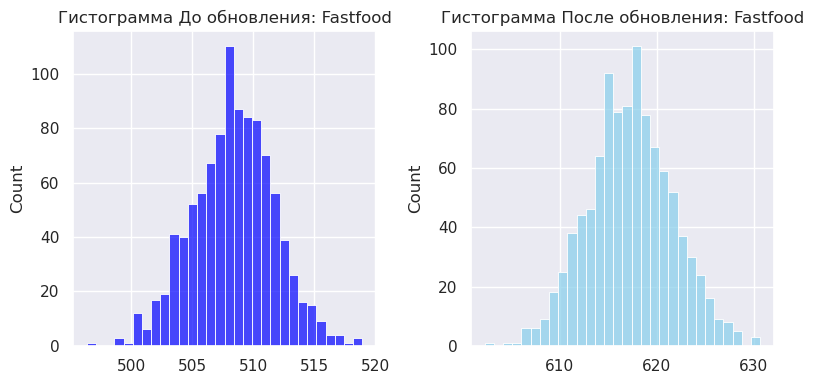

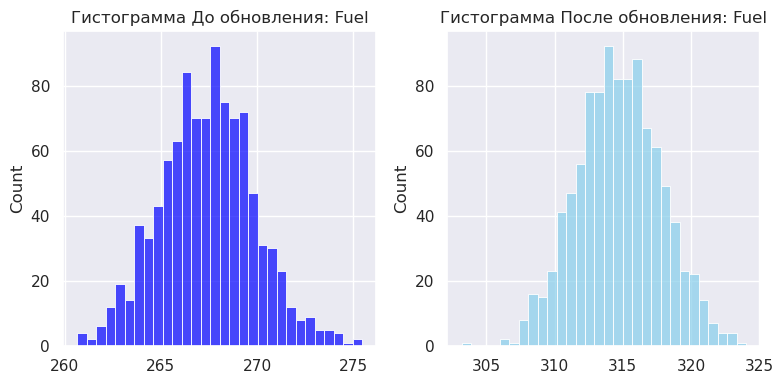

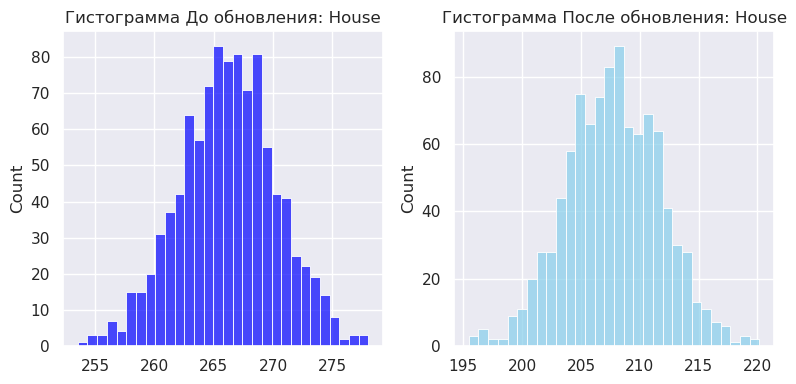

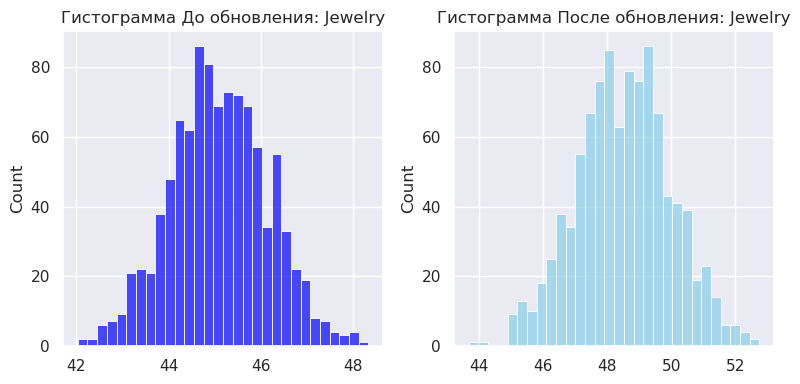

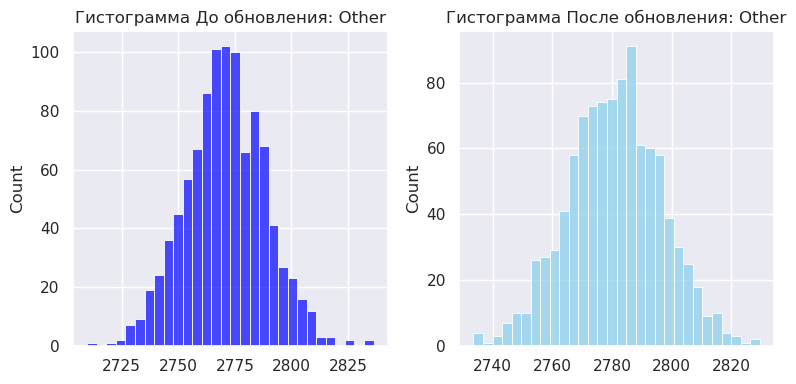

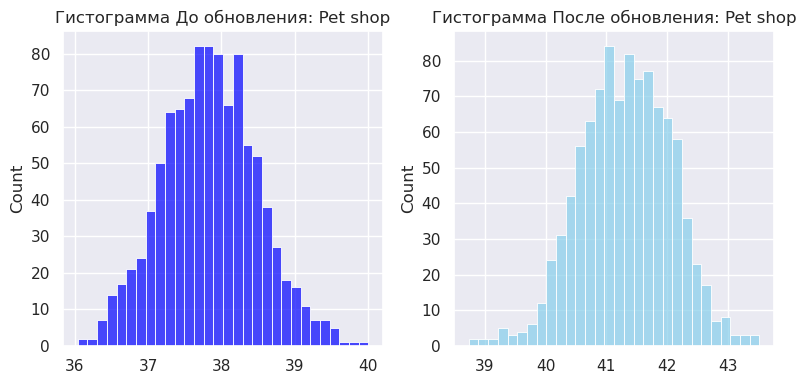

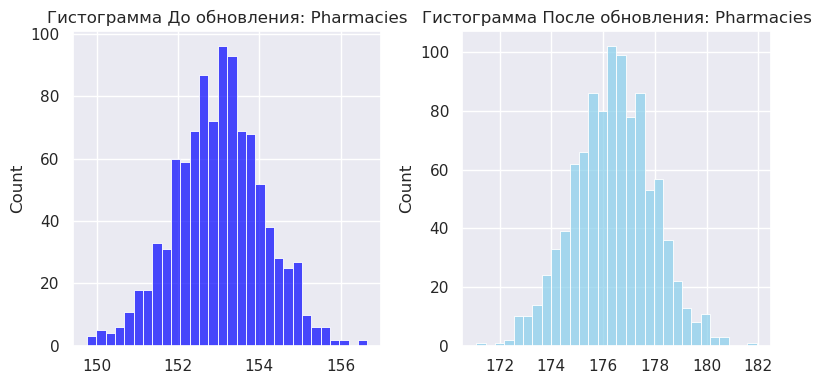

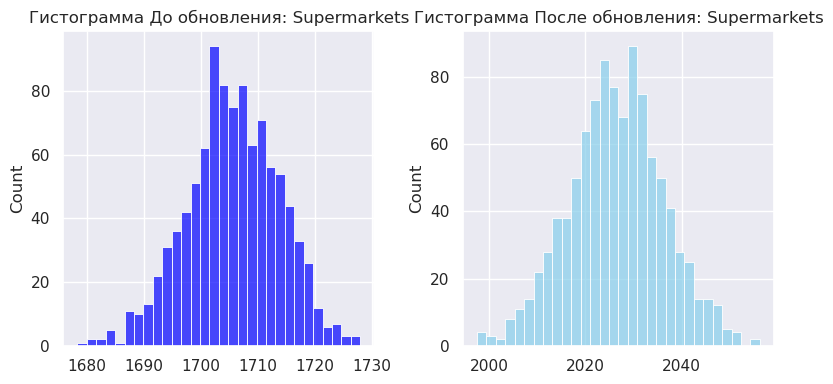

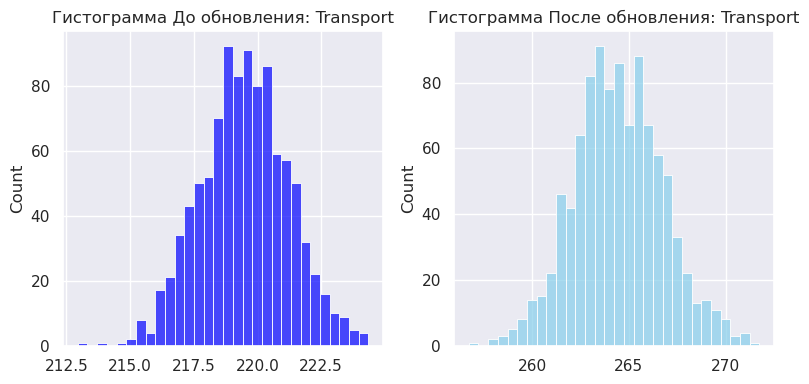

In [85]:
for i, column_boot in bootstrap_df.iterrows():
    category = column_boot['Категория']
    before_means = column_boot['Выбранные значения до']
    after_means = column_boot['Выбранные значения после']

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(before_means, bins=30, alpha=0.7, color='blue')
    plt.title(f"Гистограмма До обновления: {category}")

    plt.subplot(1, 2, 2)
    sns.histplot(after_means, bins=30, alpha=0.7, color='skyblue')
    plt.title(f"Гистограмма После обновления: {category}")

    plt.tight_layout()
    plt.show()

**Распределение выглядит очень и очень хорошо. Мы уже подвердили с помощью доверятельных интервалов, что эффективность обновления значима. Но t-тест все же проведем, мы долго и упорно пытались сделать распределение нормальным, чтобы провести его**

<a id='34-проведение-ттеста'></a>
<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
### **3.4 Проведение t-теста**
</div>

[Вернуться к содержанию](#задачи)

 - Н0: Различие кэшбека по категориям до и после обновления незначительно;
 - Н1: Различие кэшбека по категориям до и после обновления значительно

In [86]:
bootstrap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Категория                 16 non-null     object 
 1   Ср. знач. до              16 non-null     float64
 2   Ср. знач. после           16 non-null     float64
 3   95% дов.интервал до       16 non-null     object 
 4   95% дов.интервал после    16 non-null     object 
 5   Буст ср.знач. до          16 non-null     float64
 6   Буст ср.знач. после       16 non-null     float64
 7   Выбранные значения до     16 non-null     object 
 8   Выбранные значения после  16 non-null     object 
 9   Разница                   16 non-null     float64
dtypes: float64(5), object(5)
memory usage: 1.4+ KB


In [87]:
alpha = 0.05
for _, column_t in bootstrap_df.iterrows():

    before_column = column_t['Выбранные значения до']
    after_column = column_t['Выбранные значения после']
    
    
    results = st.ttest_rel(before_column, after_column)
    
    print(f"Категория: {column_t['Категория']} p-value: {results.pvalue}")
    if results.pvalue < alpha:
        print('Различия между значениями до и после обновлений в данной категории статистически значимы. Отвергаем нулевую гипотезу')
    else:
        print('Различия между значениями до и после обновлений в данной категории статистически незначимы. Принимаем нулевую гипотезу')
    print()


Категория: Air p-value: 0.0
Различия между значениями до и после обновлений в данной категории статистически значимы. Отвергаем нулевую гипотезу

Категория: Beauty shop p-value: 0.0
Различия между значениями до и после обновлений в данной категории статистически значимы. Отвергаем нулевую гипотезу

Категория: Book store p-value: 0.0
Различия между значениями до и после обновлений в данной категории статистически значимы. Отвергаем нулевую гипотезу

Категория: Children p-value: 0.0
Различия между значениями до и после обновлений в данной категории статистически значимы. Отвергаем нулевую гипотезу

Категория: Cinema p-value: 0.0
Различия между значениями до и после обновлений в данной категории статистически значимы. Отвергаем нулевую гипотезу

Категория: Clothes p-value: 0.0
Различия между значениями до и после обновлений в данной категории статистически значимы. Отвергаем нулевую гипотезу

Категория: Electronics p-value: 0.0
Различия между значениями до и после обновлений в данной кате

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

***ВЫВОД ПО T-ТЕСТУ***

**Нулевевая гипотеза отвергается по всем категориям. Почти везде p-значение равно 0, что говорит о том, что статистическая разница между выборками до и после обновления очень сильная и тест дает очень высокую уверенность в том, что между выборками есть различия. По оставшимся 3 категориям p-значение тоже минимально**

<div style="background-color: lavender; padding: 15px; border-radius: 5px;">

### ***3.5 ВЫВОД ПО 3 ПУНКТУ***
</div>

<div style="background-color: lavender; padding: 15px; border-radius: 5px;">

**Мы тщательно изучили эффективность обновления кэшбека по категориям. В самом начале работы мы выяснили, что обновление оказало положительное влияние и кэшбек вырос почти по всем категориям, кроме кино и магазинов, с товарами для животных, что говорит об отсутсвтии интереса или желания клиентов выбирать данные категории, есть куда более предпочтительные.**

**Далее предстояло выяснить значительно ли повлияло обновление на кэшбэк по категориям. Распределение оказалось не нормальным, а тесты, которые работают с не нормальным распределением, не имеют достаточной мощности, чтобы работать с такой большой совокупностью (50к) и дать нам точный результат**

**Методом проб и ошибок мы пытались привести распределение к нормальному. Преобразования не сработали(логарифмирование, корневое, Yeo-Johnson) , т.к. им сложно справиться с большим количеством нулевых значений. Тогда было пременено бутстрапирование. Которое использует выборочное среднее и построить доверительный интервал для среднего на основе распределения выборочных средних. Была проведена выборка с 1000 повторений по каждой категории. После построения и изучения доверительных интервалов, мы уже увидели, что обновление значительно повлияло на кэшбек и нулевая гипотеза о незначимости обновления была отвержена. С помошью ку-ку плотов и гистограмм мы убедились, что выборка дала нормальное распределение и позволила нам провести парный t-тест (т.к. мы сравнием средние значения двух связанных выборок). Тест подвердил, что обновление было значимо, даже очень, т.к. p-значение по всем категориям нулевое или почти нулевое**

<a id='своя-гипотеза'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">4. Выдвинете собственную гипотезу на основе имеющихся данных. </h1>
</div>

[Вернуться к содержанию](#задачи)

In [88]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [89]:
pd.set_option('display.max_columns', None)

In [90]:
#создаю копию df и удаляю из нее все ранее добавленные столбцы, которых не было в изначальном датасете
df_4 = df.copy()
#df_4 = df_4.drop(['communication_group', 'total_spend', 'total_cashback', 'spend_before', 'spend_after', \
#           'spend_segment', 'engagement_segment', 'period'], axis = 1)
df_4.head()

client_id  cb_merch_last_3_month  cb_bank_last_3_month  cb_merch_before  \
0  162353149                  282.0                 141.0            119.0   
1  666605735                    0.0                   0.0              0.0   
2  558610079                    0.0                   0.0              0.0   
3  769974329                  174.0                   0.0            151.0   
4  350605405                    0.0                   0.0            179.0   

   cb_bank_before  cnt_communication  cnt_activation  cnt_view     air  \
0           125.0                  6             229       606     0.0   
1             0.0                  0               0         0     0.0   
2             0.0                  0              51        77  2585.0   
3           102.0                  3             137       375     0.0   
4           179.0                  4              18        24     0.0   

   beauty_shop  book_store  children  cinema  clothes  electronics  fastfood  \
0        109.0         8.0      13.0     0.0   1285.0          0.0     815.0   
1          0.0         0.0       0.0     0.0      0.0          0.0       0.0   
2          0.0         0.0       0.0     0.0    152.0         22.0     265.0   
3          0.0         0.0       0.0     0.0      0.0          0.0     278.0   
4        634.0         0.0       0.0     0.0    166.0          0.0     660.0   

    fuel  house  jewelry   other  pet_shop  pharmacies  supermarkets  \
0  335.0   23.0      0.0  5265.0       0.0       388.0        4492.0   
1    0.0    0.0      0.0     0.0       0.0         0.0           0.0   
2  857.0    0.0      0.0  4217.0       0.0         7.0         864.0   
3    0.0  217.0      0.0   240.0       0.0         2.0         427.0   
4  488.0   89.0      0.0  2794.0       0.0       361.0        2515.0   

   transport  air_before  beauty_shop_before  book_store_before  \
0       99.0         0.0               138.0              202.0   
1        0.0         0.0                 0.0                0.0   
2      806.0         0.0                 0.0                0.0   
3        0.0         0.0                 0.0                0.0   
4        0.0       371.0                 0.0                7.0   

   children_before  cinema_before  clothes_before  electronics_before  \
0             66.0            0.0          1263.0                26.0   
1              0.0            0.0             0.0                 0.0   
2              0.0            0.0            69.0                65.0   
3              0.0            0.0             0.0               107.0   
4              0.0            0.0            14.0                 0.0   

   fastfood_before  fuel_before  house_before  jewelry_before  other_before  \
0            498.0        157.0        2621.0            31.0        6232.0   
1              0.0          0.0           0.0             0.0           0.0   
2            527.0        398.0         788.0             0.0        9797.0   
3            227.0          0.0           0.0             0.0         208.0   
4            452.0        372.0           0.0            76.0         486.0   

   pet_shop_before  pharmacies_before  supermarkets_before  transport_before  \
0              0.0               91.0               5356.0             119.0   
1              0.0                0.0                 12.0               2.0   
2              0.0                1.0                371.0             458.0   
3              0.0               14.0                338.0              10.0   
4              0.0              499.0               2198.0              14.0   

   communication_group  total_spend  total_cashback  spend_before  \
0                    3      29635.0           667.0       16800.0   
1                    1         15.0             0.0          14.0   
2                    1      22250.0             0.0       12474.0   
3                    3       2071.0           427.0         904.0   
4                    3      1219

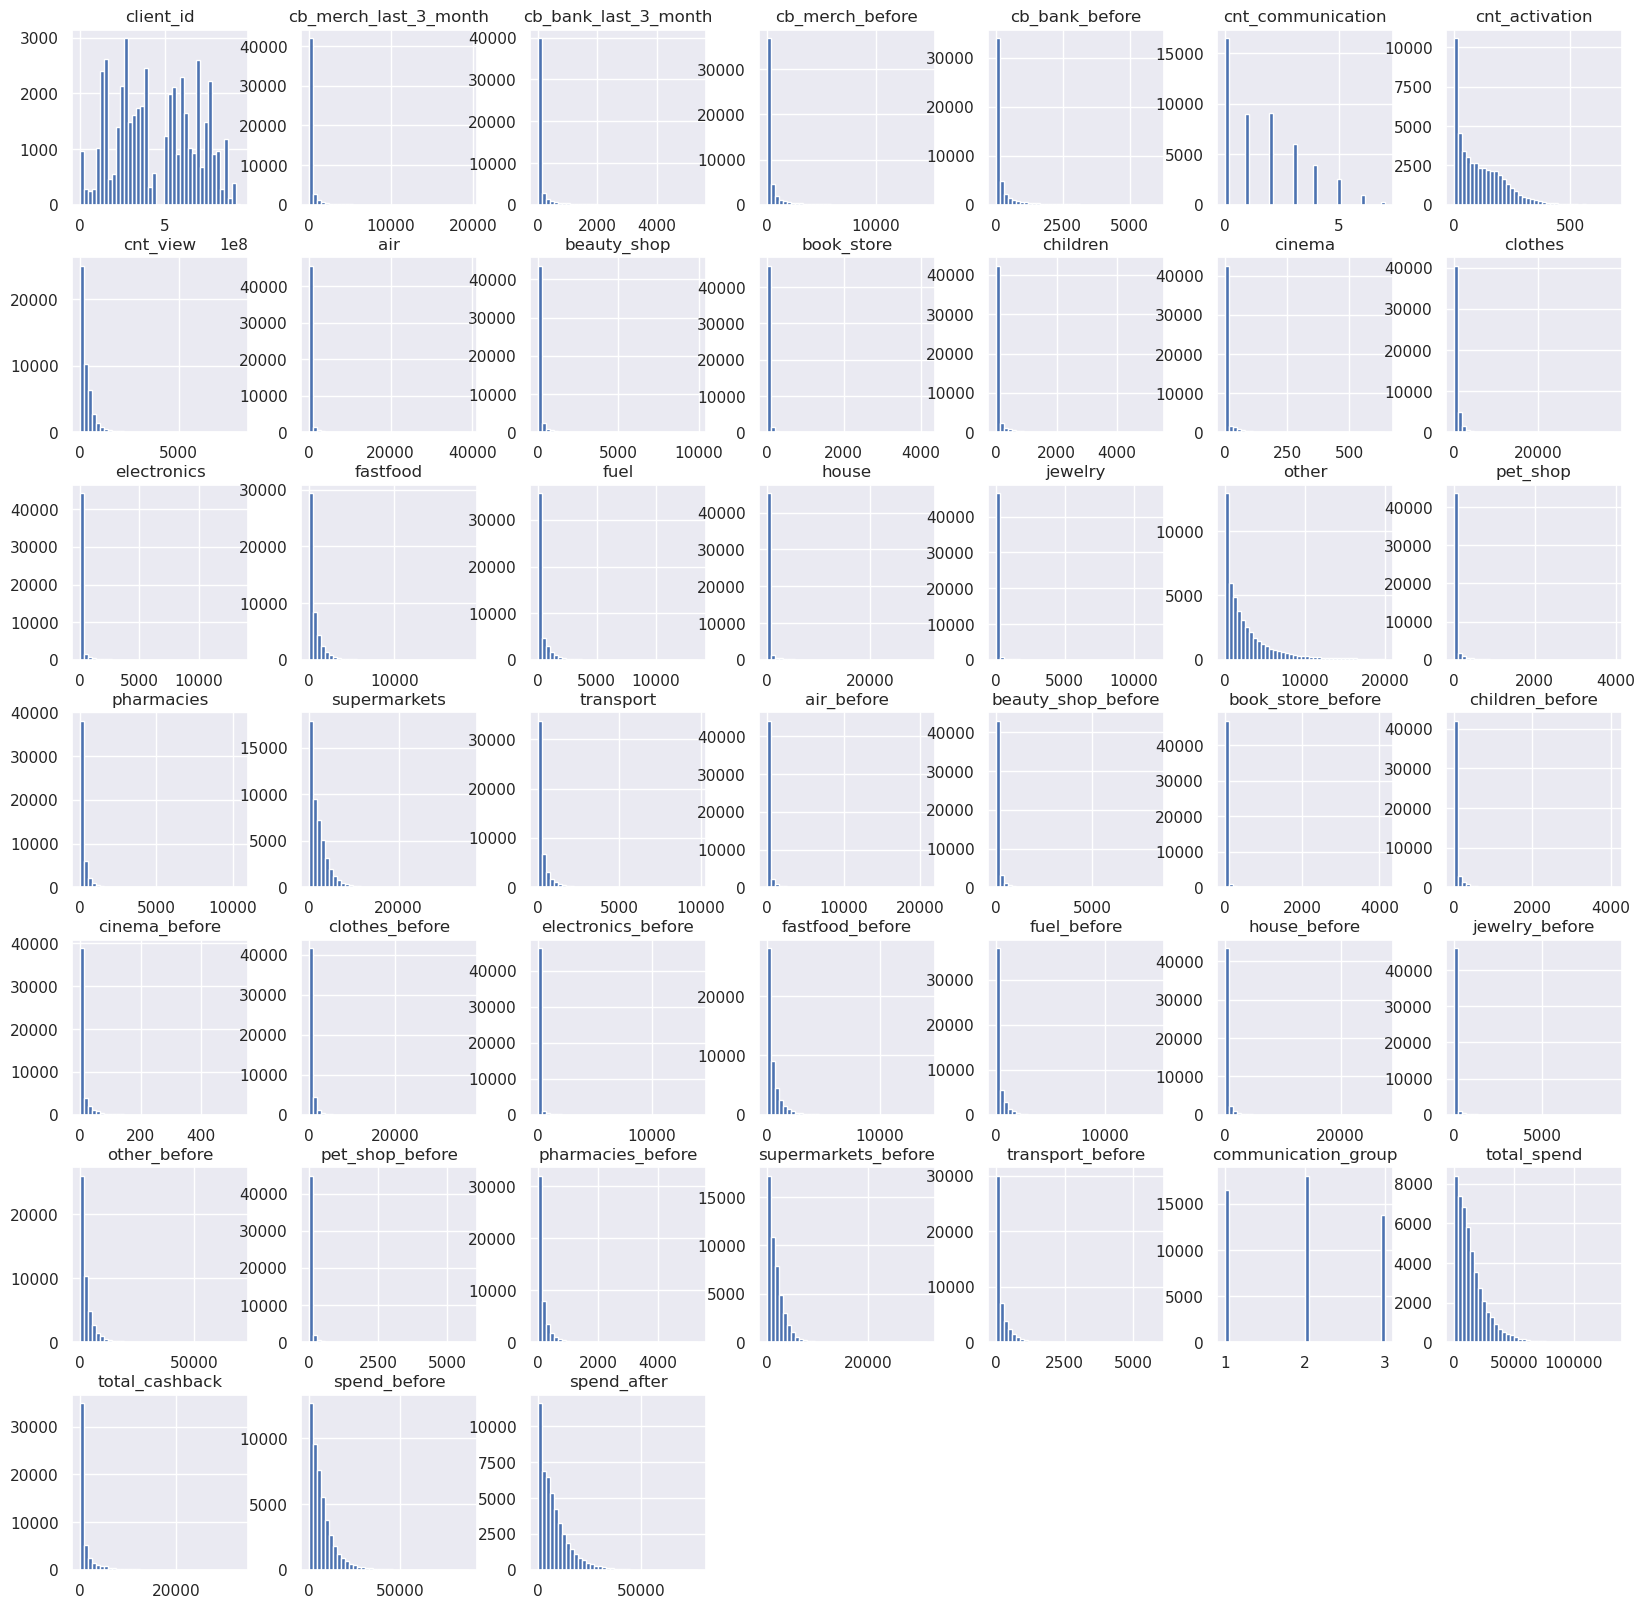

In [91]:
sns.set_style('darkgrid')
df_4.hist(figsize = (20, 20), bins = 40)
plt.show()

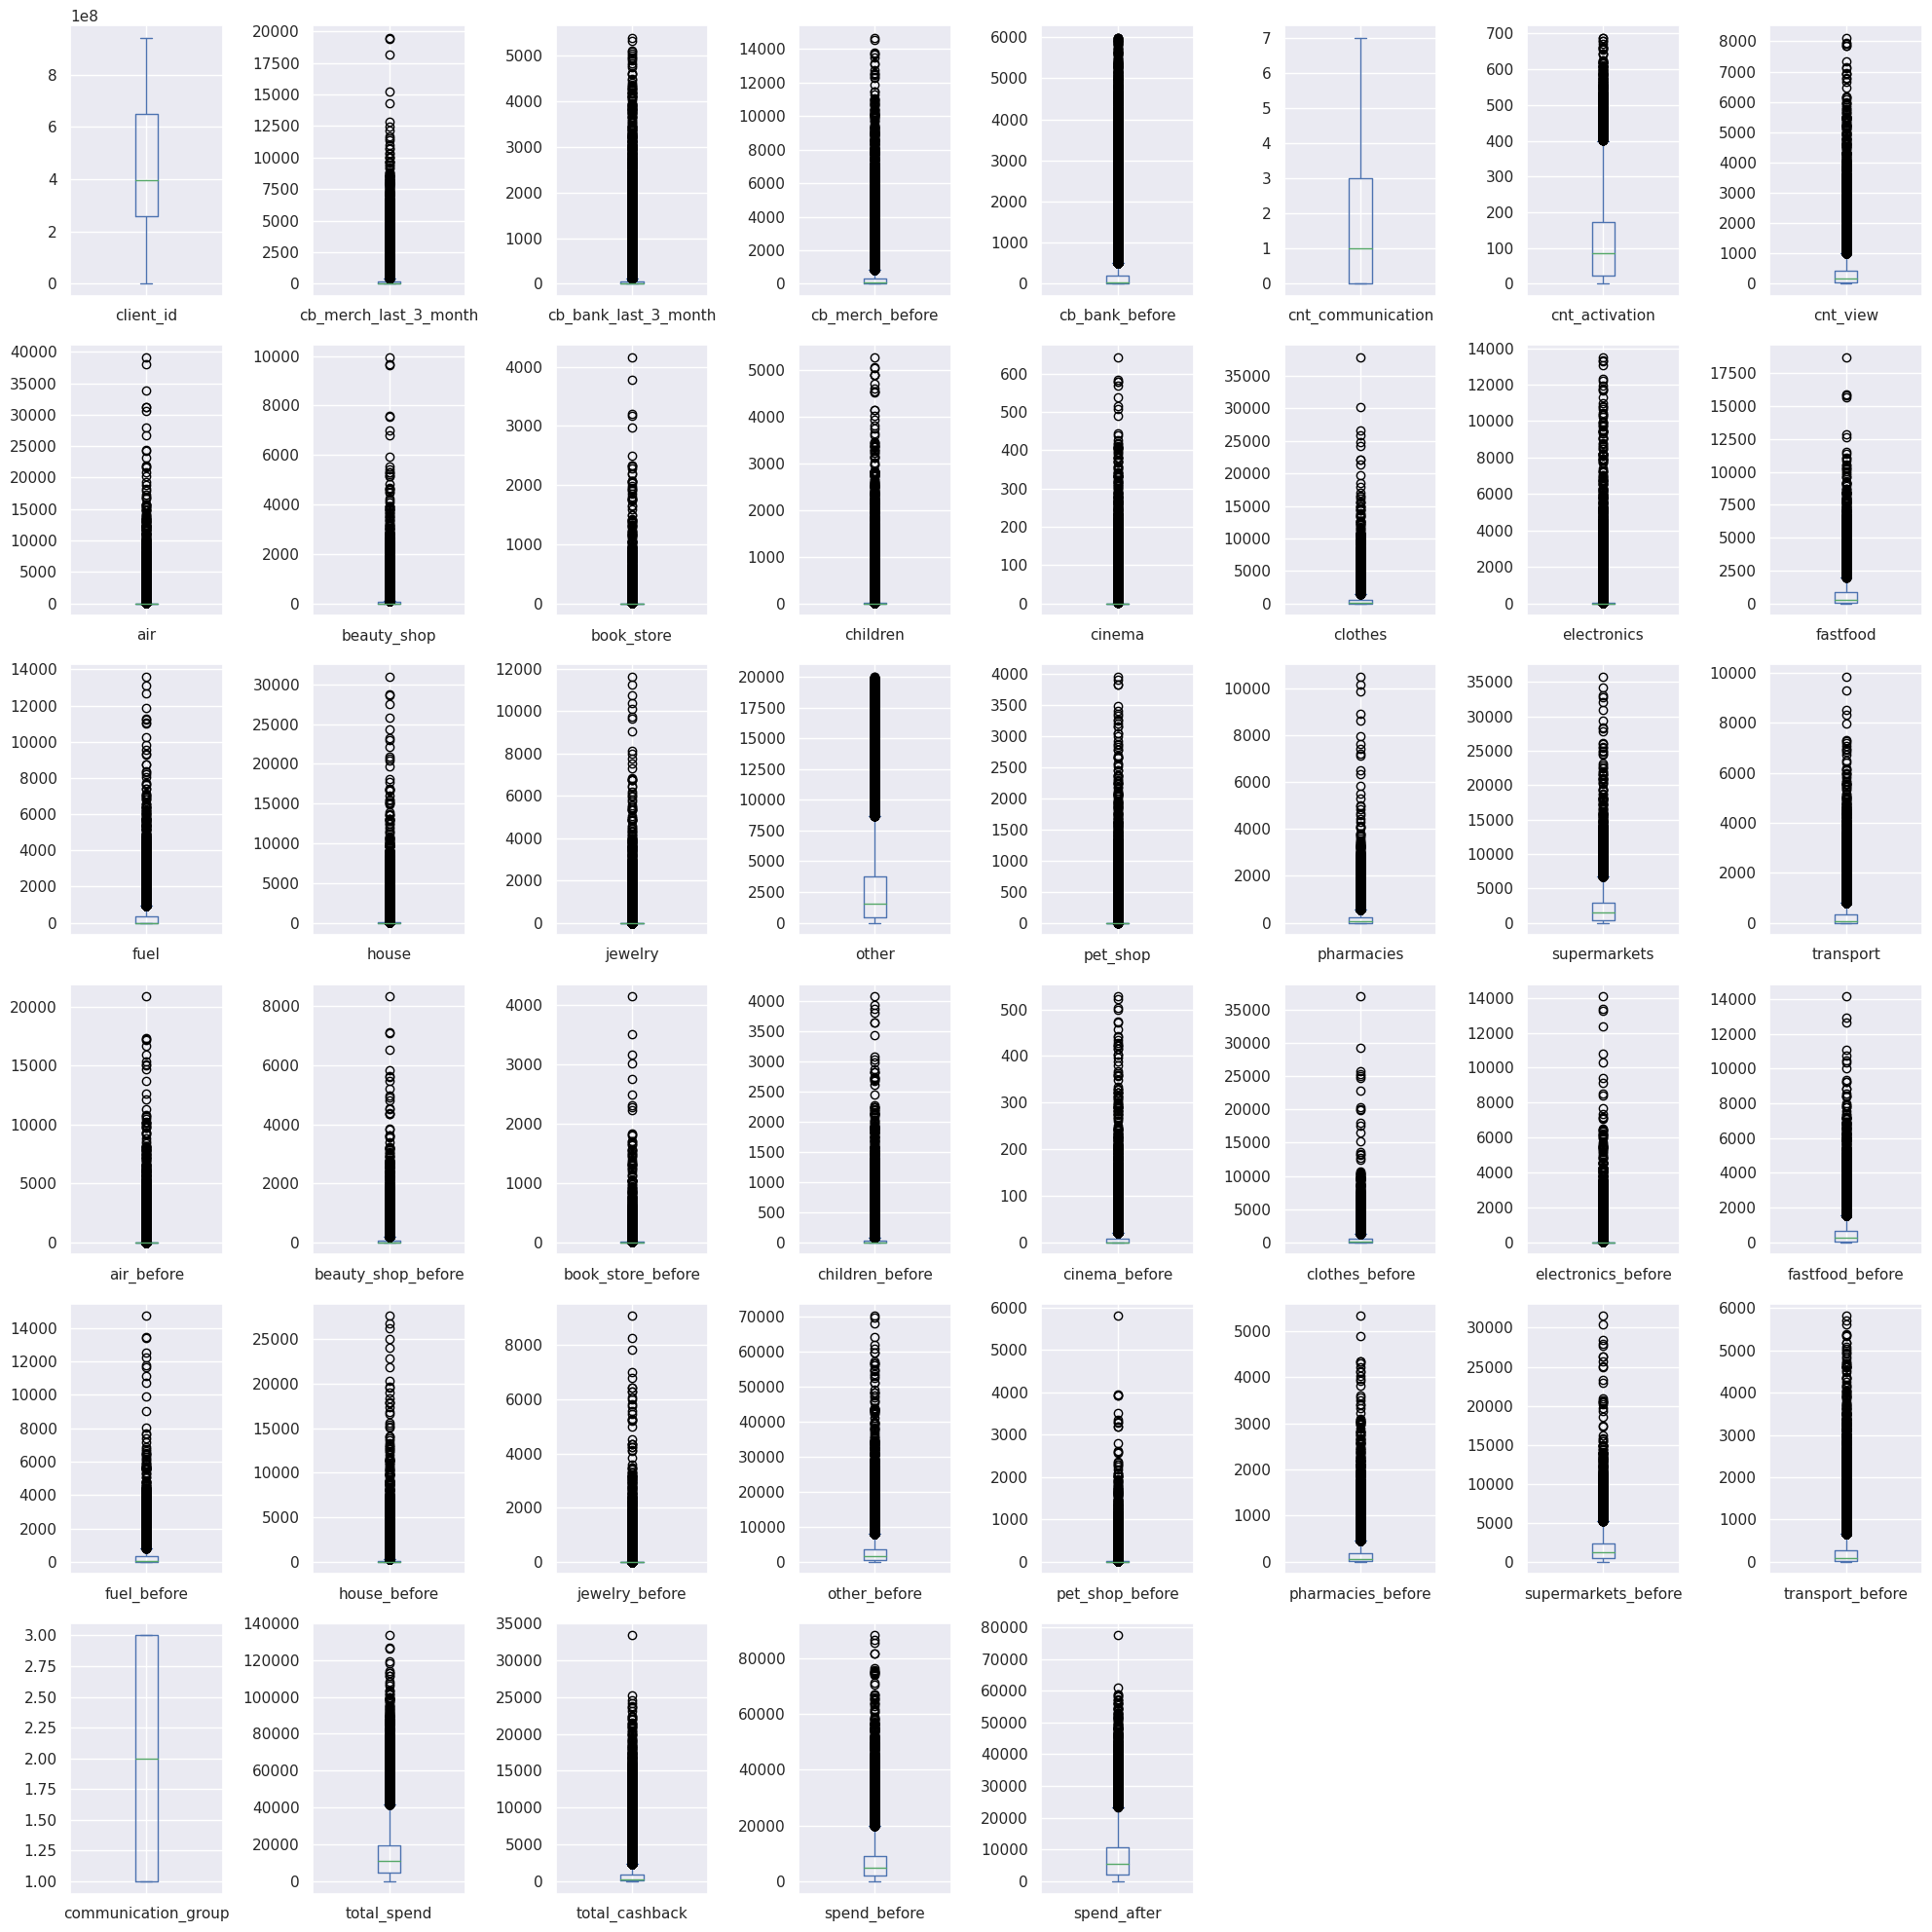

In [93]:
df_4.plot(kind='box', subplots=True, layout=(6, 8), figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">

#### Гипотеза: Те, кто пользуется кэшбеком в среднем получали его больше от банка, чем от партнеров за последние три месяца

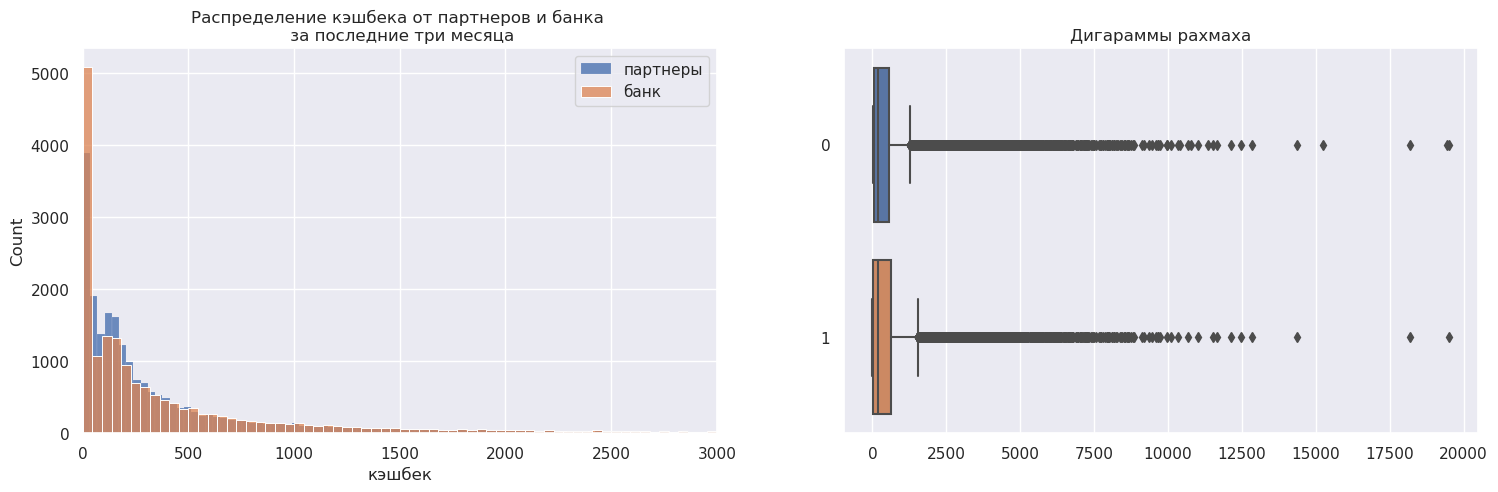

In [94]:
#нам нужны только те, кто пользуется кэшбеком. Нулевые значения не подходят
fig, axs = plt.subplots(1, 2, figsize = (18, 5))
merch = df_4.query('cb_merch_last_3_month != 0')['cb_merch_last_3_month'] 
bank = df_4.query('cb_bank_last_3_month != 0')['cb_merch_last_3_month'] 
sns.histplot(merch, label = 'партнеры', alpha = 0.8, ax = axs[0])
axs[0].set_xlim(0, 3000)
sns.histplot(bank, label = 'банк', ax = axs[0])
axs[0].legend()
axs[0].set_xlabel('кэшбек')
axs[0].set_title('Распределение кэшбека от партнеров и банка \n за последние три месяца')

sns.boxplot(data=[merch, bank], orient = 'h' , ax = axs[1])
axs[1].set_title('Дигараммы рахмаха')
plt.show()

Взяли  диапазон кэшбека от 0 до 3000 тыс, чтобы было хоть что-нибудь видно на гистограммах,  потому что далее идут совсем уж редкие выбросы. Сравним средние кэшбеки обеих выборок

In [95]:
merch.mean()

575.0517233847363

In [96]:
bank.mean()

612.9302541678054

<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
Средний размер кэшбека от банка на нашиз данных действительно выше, чем от партнеров. Теперь сделаем 10тыс повторых выборок из merch и bank. Повторность нужна, чтобы не менять распределение и вероятности. Внутри каждой выборки вычислим среднее значение, а затем найдем их разность и добавим ее в список. Я буду вычитать из среднего кэшбек банка средний кэшбек партнеров. Если распределение будет смещено правее нуля, значит средний кэшбек банка чаще оказывался больше, чем средний кэшбек партнеров

In [97]:
def bootstrap_mean_difference(data1, data2, num_samples=10000):
    boot_means_diff = []
    n1, n2 = len(data1), len(data2)
    
    for _ in range(num_samples):
        sample1 = np.random.choice(data1, size=n1, replace=True)
        sample2 = np.random.choice(data2, size=n2, replace=True)
        boot_means_diff.append(np.mean(sample1) - np.mean(sample2))
    
    return boot_means_diff

differs = bootstrap_mean_difference(bank, merch)

Числовые характеристики полученного массива разниц средних:
count    10000.000000
mean        37.976603
std         10.969013
min         -3.507325
25%         30.591611
50%         37.884112
75%         45.234155
max         77.703911
dtype: float64


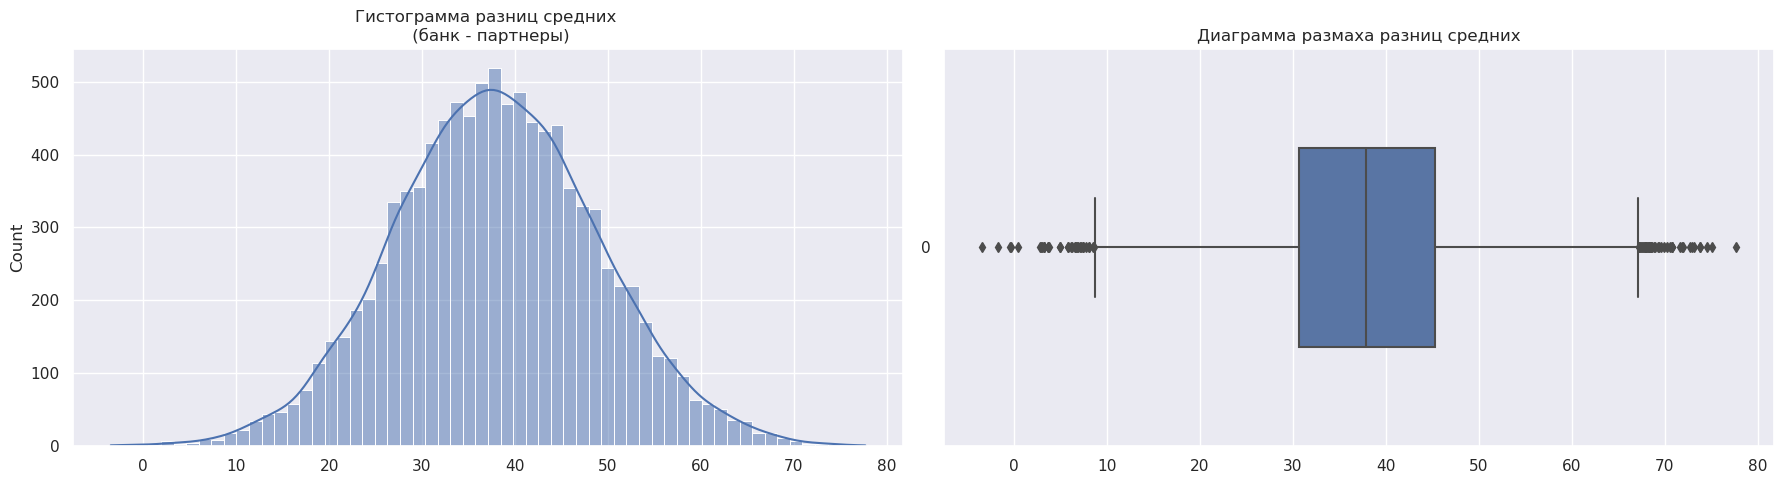

In [98]:
print('Числовые характеристики полученного массива разниц средних:')
print(pd.Series(differs).describe())


fig, axs = plt.subplots(1 , 2, figsize = (18, 5))
sns.histplot(differs, ax = axs[0], kde = True)
axs[0].set_title('Гистограмма разниц средних \n (банк - партнеры)')

sns.boxplot(differs, ax= axs[1], orient = 'h', width = 0.5)
axs[1].set_title('Диаграмма размаха разниц средних')

plt.tight_layout()
plt.show()

Распределение смещено правее нуля, большинство значений в списке разниц средних оказались положительными, что значит перевес среднего кэшбека от банка перед кэшбеком от партнеров. Проверим распределение разниц средних на нормальность

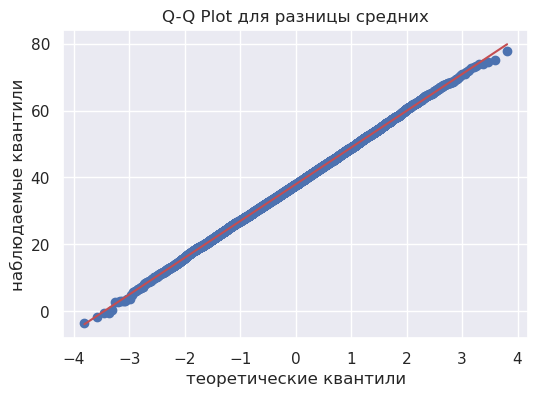

In [99]:
import scipy.stats as stats
plt.figure(figsize=(6, 4))
stats.probplot(differs, dist="norm", plot=plt)
plt.title("Q-Q Plot для разницы средних")
plt.ylabel("наблюдаемые квантили")
plt.xlabel("теоретические квантили")
plt.show()

Судя по ку-ку плоту распределение разницы выборочных средний действительно нормально, что и ожидалось получить при 10тыс повторениях. Проведем тест на нормальность 

In [100]:
tests = {
    "Шапиро Уилка": stats.shapiro,
    "Колмогоров Смирнов": lambda data: stats.kstest(data, 'norm', args=(np.mean(data), np.std(data))),
    "Тест K-квадрат D'Агостино": stats.normaltest,
    "Андерсен Дарлинг": stats.anderson
}


for test_name, test_func in tests.items():
    print(f"--- {test_name} ---")
    if test_name == "Андерсен Дарлинг":
        result = test_func(differs)
        print(f"Статистика теста: {result.statistic:.4f}")
        for i, crit in enumerate(result.critical_values):
            sig_level = result.significance_level[i]
            if result.statistic < crit:
                print(f"На уровне значимости {sig_level}%: данные нормальны")
            else:
                print(f"На уровне значимости {sig_level}%: данные ненормальны")
    else:
        test_stat, p_value = test_func(differs)
        print(f"Статистика теста: {test_stat:.4f}, p-значение: {p_value:.4f}")
        if p_value < 0.05:
            print("Распределение значительно отклоняется от нормального (отклоняем нулевую гипотезу)")
        else:
            print("Нет значительных отклонений от нормального распределения (не отклоняем нулевую гипотезу)")
    print()

--- Шапиро Уилка ---
Статистика теста: 0.9998, p-значение: 0.5975
Нет значительных отклонений от нормального распределения (не отклоняем нулевую гипотезу)

--- Колмогоров Смирнов ---
Статистика теста: 0.0060, p-значение: 0.8613
Нет значительных отклонений от нормального распределения (не отклоняем нулевую гипотезу)

--- Тест K-квадрат D'Агостино ---
Статистика теста: 1.1527, p-значение: 0.5619
Нет значительных отклонений от нормального распределения (не отклоняем нулевую гипотезу)

--- Андерсен Дарлинг ---
Статистика теста: 0.4014
На уровне значимости 15.0%: данные нормальны
На уровне значимости 10.0%: данные нормальны
На уровне значимости 5.0%: данные нормальны
На уровне значимости 2.5%: данные нормальны
На уровне значимости 1.0%: данные нормальны



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Наши данные о разницах средних очень близки к нормальному распределению и согласно всем проведенным тестам являются нормальными. Красной линией построим график идельного нормального распределения с теми же параметрами как в differs. Само распределение differs изобразим ввиде нормированной гистограммы, площадь под которой равна 1

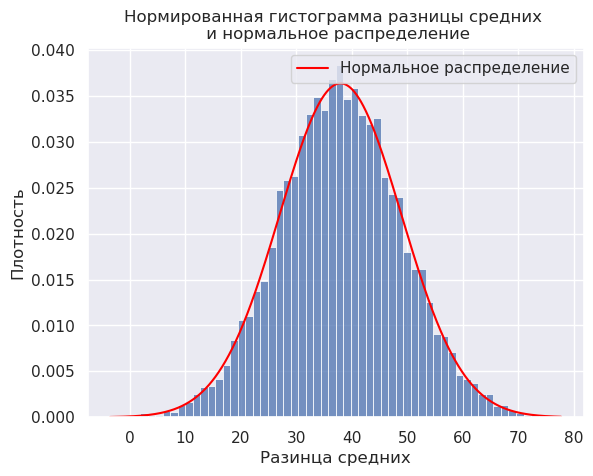

In [101]:
from scipy.stats import norm

mean = np.mean(differs)
std = np.std(differs)

x = np.linspace(min(differs), max(differs), 10000) 
y = norm.pdf(x, mean, std) 


sns.histplot(differs, kde=False, stat='density', bins=60)
plt.plot(x, y, color='red', label='Нормальное распределение')
plt.legend(loc = 'upper right')
plt.ylabel('Плотность')
plt.xlabel('Разинца средних')
plt.title('Нормированная гистограмма разницы средних \n и нормальное распределение')

plt.show()

Окончательно убедившись, что распределение разниц средних является нормальным, мы можем оценить вероятность получить разницу банк - партнеры = 0 и меньше 0

In [102]:
prob= norm.cdf(0, mean, std)

print(f"Вероятность того, что значение будет меньше или равно 0: {round(prob, 5)}")

Вероятность того, что значение будет меньше или равно 0: 0.00027


<div style="background-color: aliceBlue; padding: 15px; border-radius: 5px;">
    
Таким образом, мы взяли кэшбеки от партнеров и банка за последние три месяца, из обеих выборок повторным отбором 10 тыс раз сформировали подвыборки такого же размера как исходные. И 10 тыс раз вычислили разницу средних кэшбеков. Затем полученое распределение разниц средних было проверено на нормальность. Разница средних считалась как средний кэшбек банка - средний кэшбек партнеров. Рассчитанная на основе нормального распределения вероятность того, что эта разница окажется равной нулю или отрицательной равна 0.00215. Значит вероятность того, что средний кэшбек от банка равен или меньше чем кэшбек от партнеров, очень мала и точно меньше принятых уровней статистической значимости 0.05 или 0.01. 

Значит можно сказать, что у нас нет оснований отвергнуть гипотезу о том, что те, кто пользуется кэшбеком в среднем получали его больше от банка, чем от партнеров за последние три месяца. А вот в пользу гипотезы говорит буквально все